## Link for processed dataset on OneDrive
https://heriotwatt-my.sharepoint.com/:u:/g/personal/zrm2000_hw_ac_uk/Ebz1MFB3xwlArhAspZG-kXoBWp1vmAIZNTBKK4TkkJpFIA?e=gWTc9C


In [13]:
import tensorflow as tf
import keras  
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import os
import glob 
import seaborn as sns
from skimage import io 
import skimage
import random 
import numpy as np
import gc
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt  
import pandas as pd
%matplotlib inline

In [9]:
dataset_path = os.getcwd() + '/dataset'
# cats = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
cats = ['hail', 'lightning', 'rain', 'sandstorm']


In [ ]:
# cropping all images by remove 50 pixsels from top and bottom
def crop_all_images(input_folder, output_folder, crop=(0, 25, 0, 25)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        for filename in os.listdir(input_folder):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                img = Image.open(os.path.join(input_folder, filename))
                img_cropped = img.crop((crop[0], crop[1], img.width - crop[2], img.height - crop[3])).convert('RGB')
                img_cropped.save(os.path.join(output_folder, filename))

for cat in cats:
    crop_all_images(dataset_path + '/' + cat, dataset_path + '/cropped/' + cat)

In [ ]:
# converting all images to 128 x 128
def resize_images(input_folder, output_folder, size=(256, 256)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(input_folder, filename))
            img_resized = img.resize(size).convert('RGB')
            img_resized.save(os.path.join(output_folder, filename))
            
for cat in cats:
    resize_images(dataset_path + '/cropped/' + cat, dataset_path + '/cropped_resized/' + cat)

In [ ]:
# convert all images to grayscale
def convert_to_grayscale(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(input_folder, filename))
            img = img.convert('L')    
            img.save(os.path.join(output_folder, filename))

for cat in cats:
    convert_to_grayscale(dataset_path + '/cropped_resized/' + cat, dataset_path + '/cropped_resized_grayscale/' + cat)

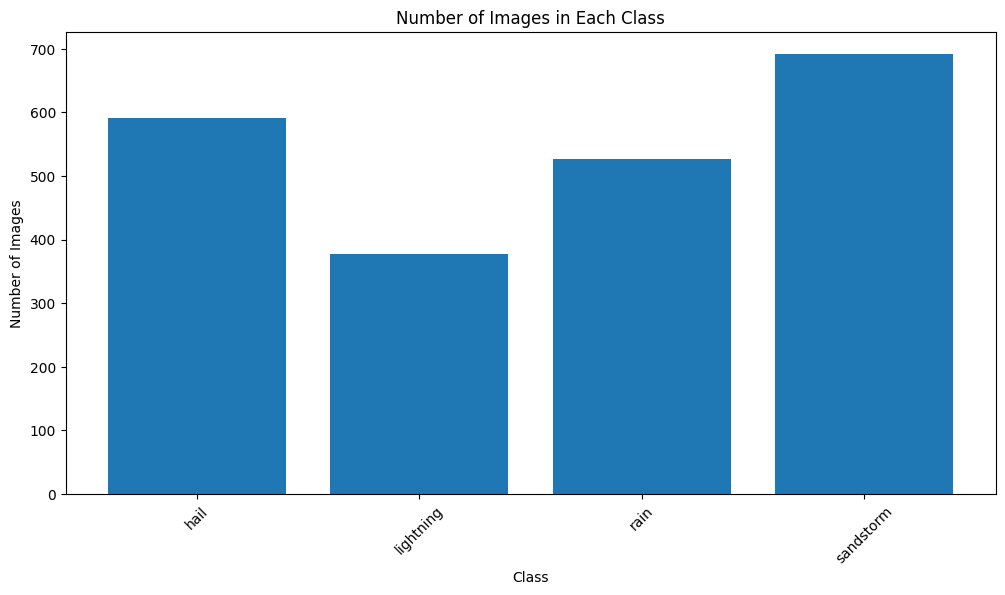

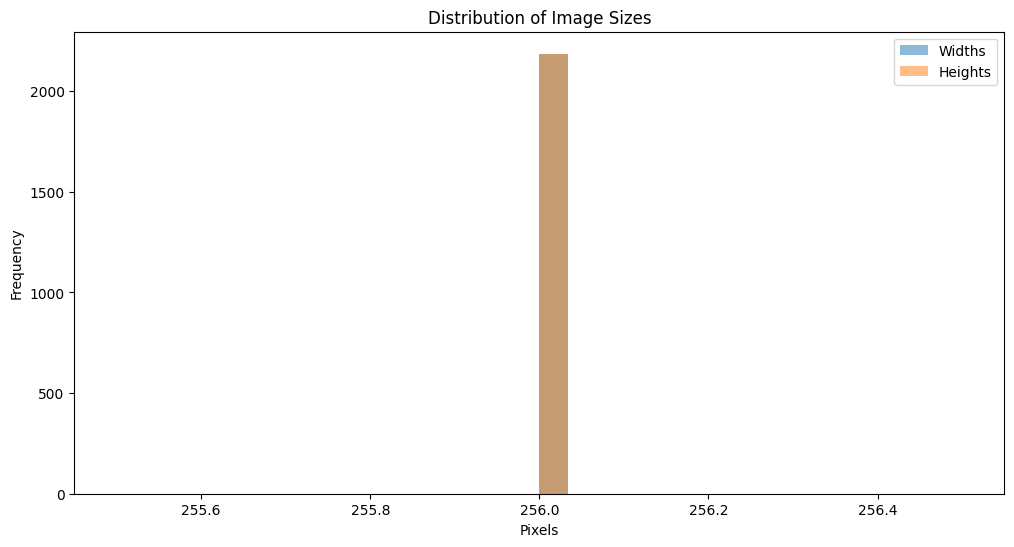

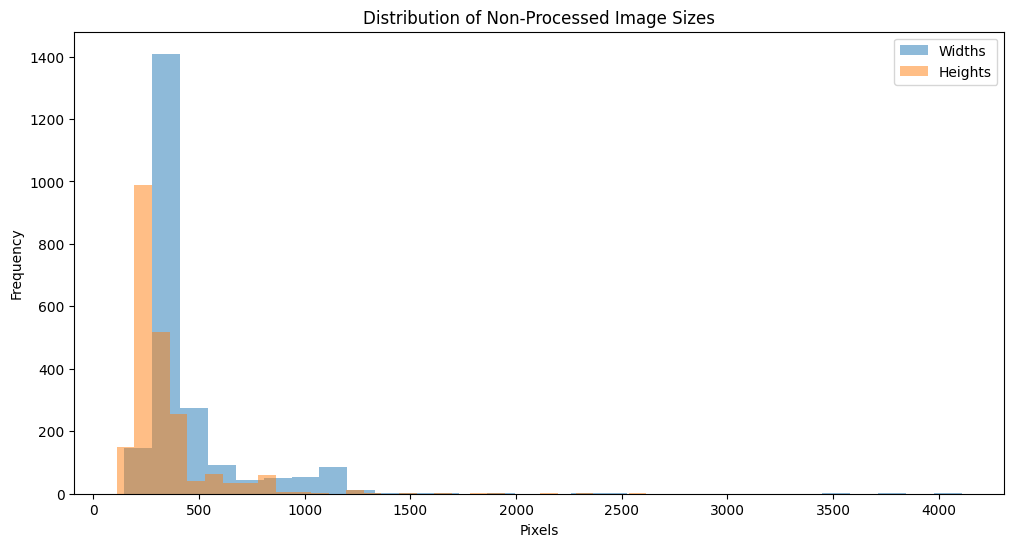

In [6]:
# Count the number of images in each class
image_counts = {cat: len(os.listdir(os.path.join(dataset_path, 'cropped_resized_grayscale', cat))) for cat in cats}

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(image_counts.keys(), image_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of image sizes
image_sizes = []
for cat in cats:
    for filename in os.listdir(os.path.join(dataset_path, 'cropped_resized_grayscale', cat)):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(dataset_path, 'cropped_resized_grayscale', cat, filename))
            image_sizes.append(img.size)

# Plot the distribution of image sizes
widths, heights = zip(*image_sizes)
plt.figure(figsize=(12, 6))
plt.hist(widths, bins=30, alpha=0.5, label='Widths')
plt.hist(heights, bins=30, alpha=0.5, label='Heights')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Distribution of Image Sizes')
plt.legend()
plt.show()


# Visualize the distribution of image sizes for non-processed images
non_processed_image_sizes = []
for cat in cats:
    for filename in os.listdir(os.path.join(dataset_path, cat)):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(dataset_path, cat, filename))
            non_processed_image_sizes.append(img.size)

# Plot the distribution of image sizes for non-processed images
non_processed_widths, non_processed_heights = zip(*non_processed_image_sizes)
plt.figure(figsize=(12, 6))
plt.hist(non_processed_widths, bins=30, alpha=0.5, label='Widths')
plt.hist(non_processed_heights, bins=30, alpha=0.5, label='Heights')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.title('Distribution of Non-Processed Image Sizes')
plt.legend()
plt.show()


# Normalizing images and converting to numpy array

In [10]:
# Count the number of images in each class
image_counts = {cat: len(os.listdir(os.path.join(dataset_path, 'cropped_resized', cat))) for cat in cats}

# Find the minimum number of images among the classes
min_images = min(image_counts.values())

# Function to normalize and take only the minimum number of images for each class
def normalize_and_sample_images(input_folder, num_samples):
    images = []
    for filename in os.listdir(input_folder)[:num_samples]:
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(input_folder, filename))
            img_array = img_to_array(img) / 255.0  # Normalizing between 0 and 1
            images.append(img_array)
    return np.array(images)

# Normalize and sample images
all_images = []
for cat in cats:
    cat_images = normalize_and_sample_images(dataset_path + '/cropped_resized/' + cat, min_images)
    all_images.append(cat_images)

# Convert list to numpy array
all_images = np.concatenate(all_images, axis=0)
print(all_images.shape)


(1508, 256, 256, 3)


# Five Layer CNN 1

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_five_layer_cnn_model_1():
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fourth convolutional layer
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fifth convolutional layer
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Update the output layer to match the number of categories
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

five_layer_cnn_model_1 = build_five_layer_cnn_model_1()
# Print the model summary
five_layer_cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 256)      0

(1508, 256, 256, 3)
[0. 0. 0. ... 3. 3. 3.]
Epoch 1/100
31/31 [==============================] - 33s 440ms/step - loss: 1.2652 - accuracy: 0.3797 - val_loss: 1.0479 - val_accuracy: 0.4132
Epoch 2/100
31/31 [==============================] - 10s 298ms/step - loss: 1.0221 - accuracy: 0.5187 - val_loss: 1.0046 - val_accuracy: 0.5289
Epoch 3/100
31/31 [==============================] - 17s 545ms/step - loss: 0.9317 - accuracy: 0.5892 - val_loss: 0.8849 - val_accuracy: 0.6488
Epoch 4/100
31/31 [==============================] - 15s 479ms/step - loss: 0.9029 - accuracy: 0.5757 - val_loss: 0.8343 - val_accuracy: 0.6612
Epoch 5/100
31/31 [==============================] - 13s 412ms/step - loss: 0.8103 - accuracy: 0.6266 - val_loss: 0.6867 - val_accuracy: 0.6901
Epoch 6/100
31/31 [==============================] - 13s 422ms/step - loss: 0.8283 - accuracy: 0.6079 - val_loss: 0.7876 - val_accuracy: 0.5950
Epoch 7/100
31/31 [==============================] - 13s 422ms/step - loss: 0.7074 - accurac

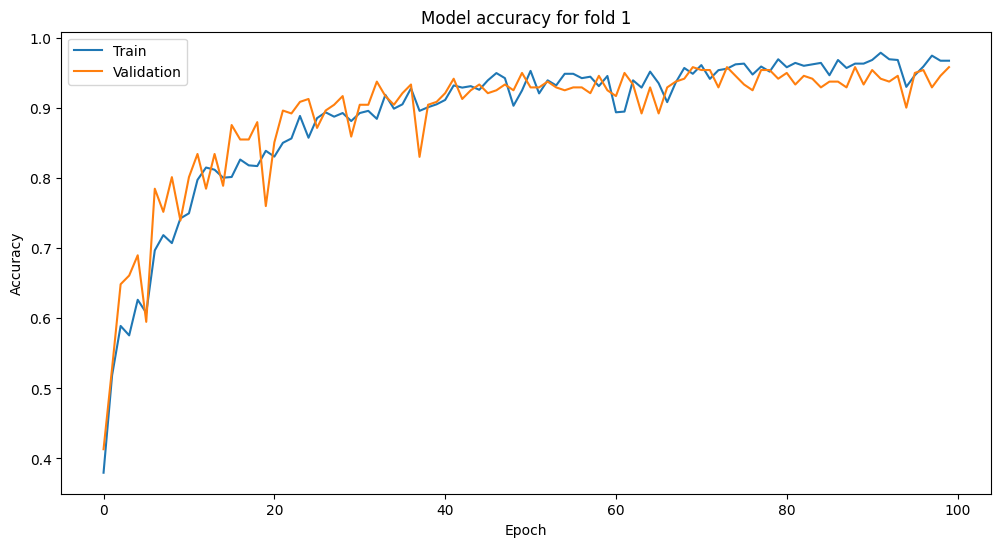

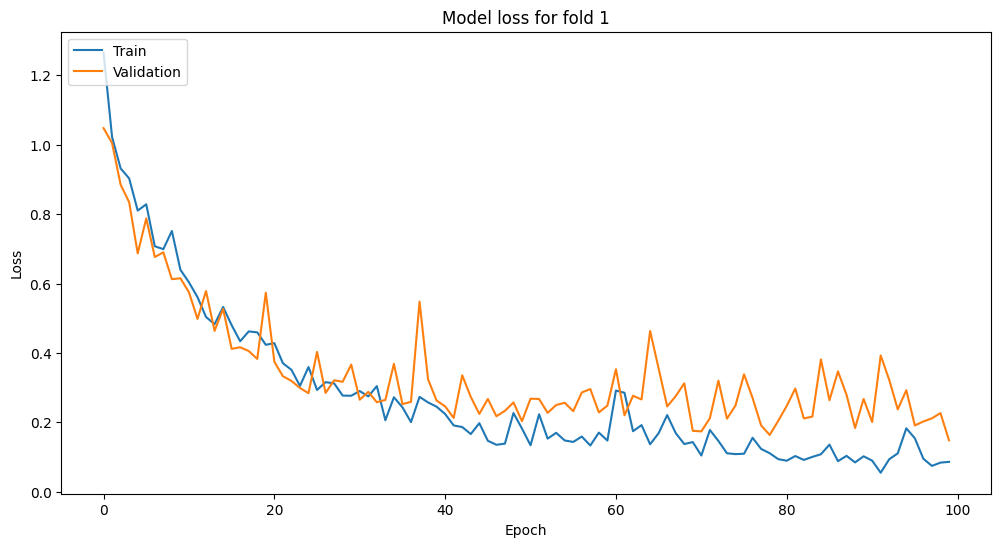

10/10 [==============================] - 2s 191ms/step - loss: 0.1693 - accuracy: 0.9536
Test accuracy for fold 1: 0.9536423683166504
Test loss for fold 1: 0.16925613582134247
10/10 [==============================] - 1s 50ms/step
Classification Report for fold 1:
              precision    recall  f1-score   support

        hail       0.96      0.92      0.94        75
   lightning       0.99      1.00      0.99        73
        rain       0.91      0.95      0.93        79
   sandstorm       0.96      0.95      0.95        75

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



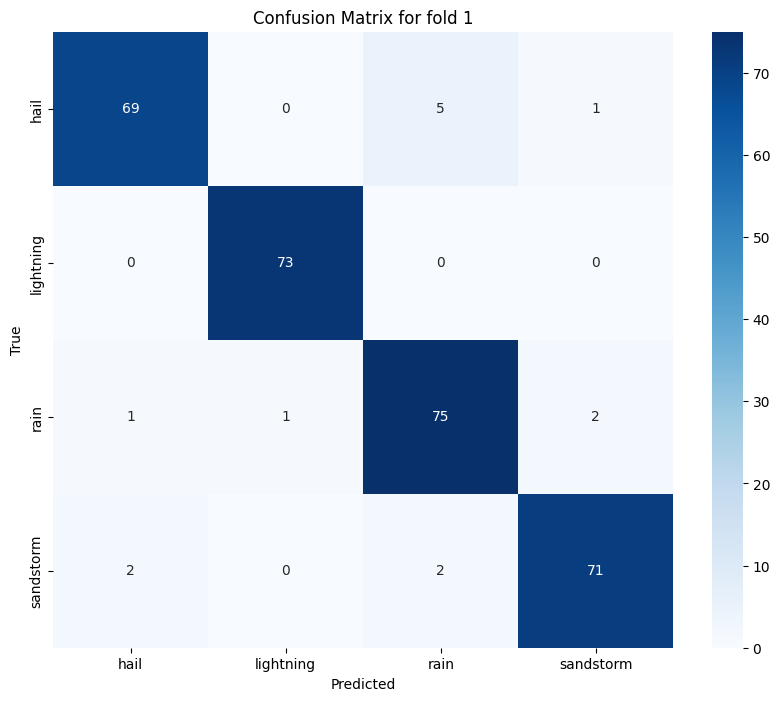

Epoch 1/100
31/31 [==============================] - 15s 443ms/step - loss: 1.8734 - accuracy: 0.3060 - val_loss: 1.1814 - val_accuracy: 0.4091
Epoch 2/100
31/31 [==============================] - 14s 441ms/step - loss: 1.0933 - accuracy: 0.4699 - val_loss: 0.9654 - val_accuracy: 0.5165
Epoch 3/100
31/31 [==============================] - 14s 443ms/step - loss: 0.9613 - accuracy: 0.5716 - val_loss: 0.9209 - val_accuracy: 0.6157
Epoch 4/100
31/31 [==============================] - 14s 432ms/step - loss: 0.7776 - accuracy: 0.6525 - val_loss: 0.9422 - val_accuracy: 0.5496
Epoch 5/100
31/31 [==============================] - 14s 431ms/step - loss: 0.7709 - accuracy: 0.7054 - val_loss: 0.7104 - val_accuracy: 0.6983
Epoch 6/100
31/31 [==============================] - 14s 435ms/step - loss: 0.6240 - accuracy: 0.7593 - val_loss: 0.5743 - val_accuracy: 0.7438
Epoch 7/100
31/31 [==============================] - 14s 428ms/step - loss: 0.8037 - accuracy: 0.6919 - val_loss: 0.9111 - val_accuracy:

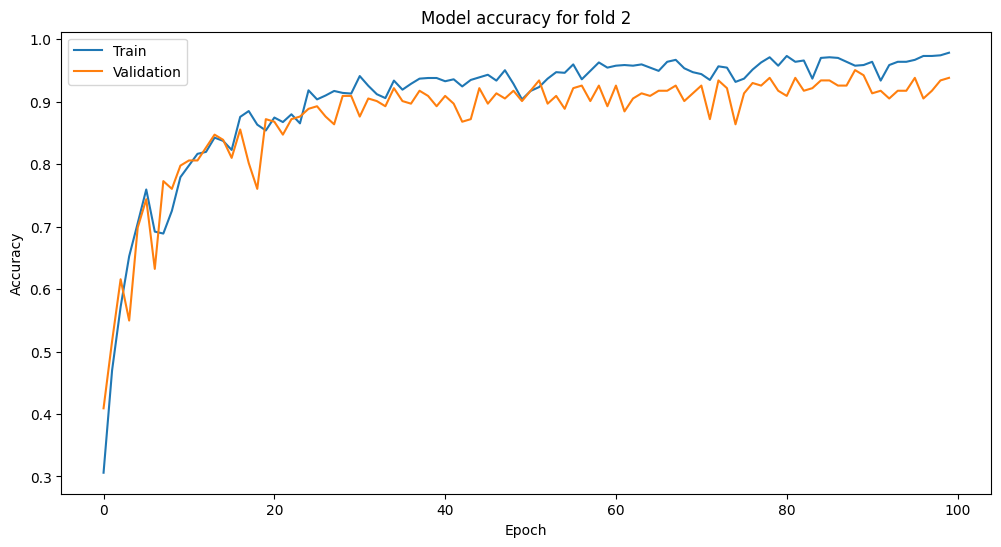

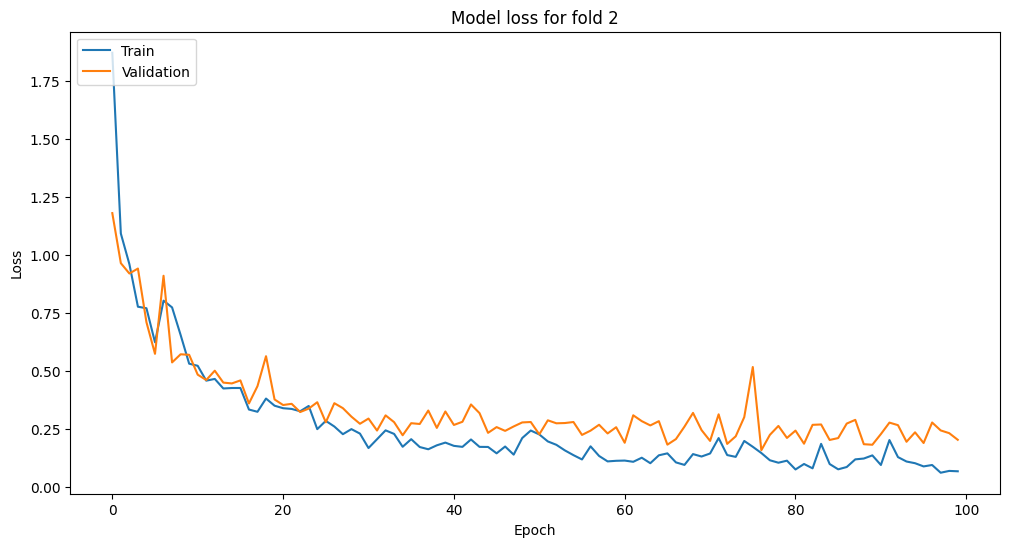

10/10 [==============================] - 1s 52ms/step - loss: 0.1638 - accuracy: 0.9371
Test accuracy for fold 2: 0.9370861053466797
Test loss for fold 2: 0.16381844878196716
10/10 [==============================] - 1s 51ms/step
Classification Report for fold 2:
              precision    recall  f1-score   support

        hail       0.95      0.96      0.95        73
   lightning       0.97      1.00      0.99        77
        rain       0.84      0.94      0.89        71
   sandstorm       1.00      0.85      0.92        81

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



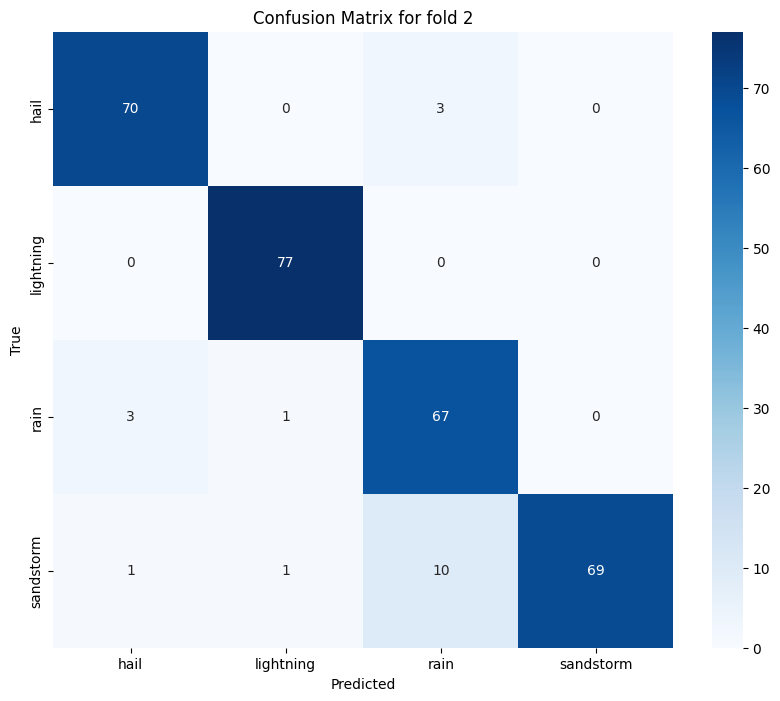

Epoch 1/100
31/31 [==============================] - 16s 468ms/step - loss: 1.2394 - accuracy: 0.4201 - val_loss: 0.8832 - val_accuracy: 0.6446
Epoch 2/100
31/31 [==============================] - 14s 446ms/step - loss: 0.9130 - accuracy: 0.6463 - val_loss: 0.7249 - val_accuracy: 0.6901
Epoch 3/100
31/31 [==============================] - 14s 441ms/step - loss: 0.7251 - accuracy: 0.6898 - val_loss: 0.6122 - val_accuracy: 0.7603
Epoch 4/100
31/31 [==============================] - 13s 430ms/step - loss: 0.6601 - accuracy: 0.7220 - val_loss: 0.7517 - val_accuracy: 0.6612
Epoch 5/100
31/31 [==============================] - 13s 426ms/step - loss: 0.6660 - accuracy: 0.7189 - val_loss: 0.5894 - val_accuracy: 0.7107
Epoch 6/100
31/31 [==============================] - 13s 428ms/step - loss: 0.7054 - accuracy: 0.7282 - val_loss: 0.5699 - val_accuracy: 0.8306
Epoch 7/100
31/31 [==============================] - 15s 483ms/step - loss: 0.6099 - accuracy: 0.7438 - val_loss: 0.4651 - val_accuracy:

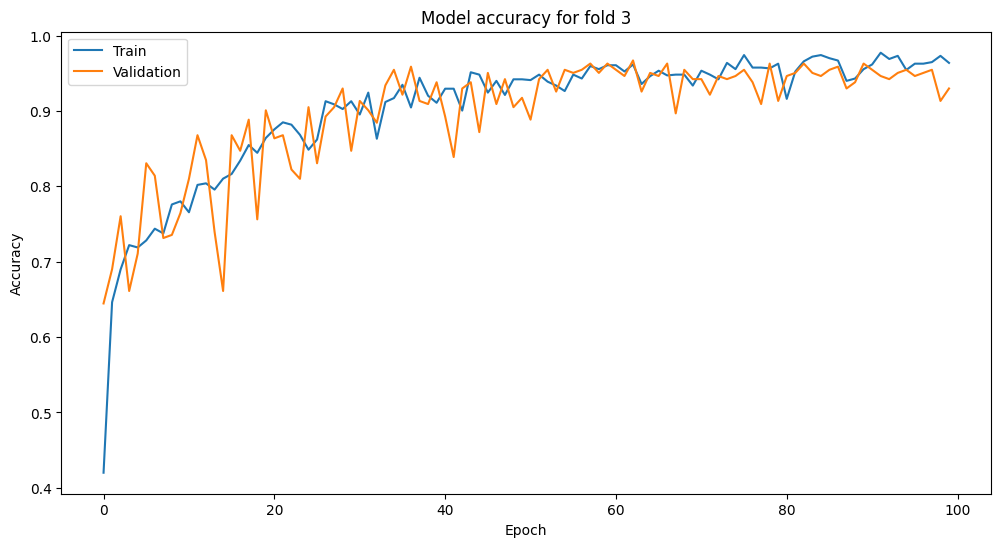

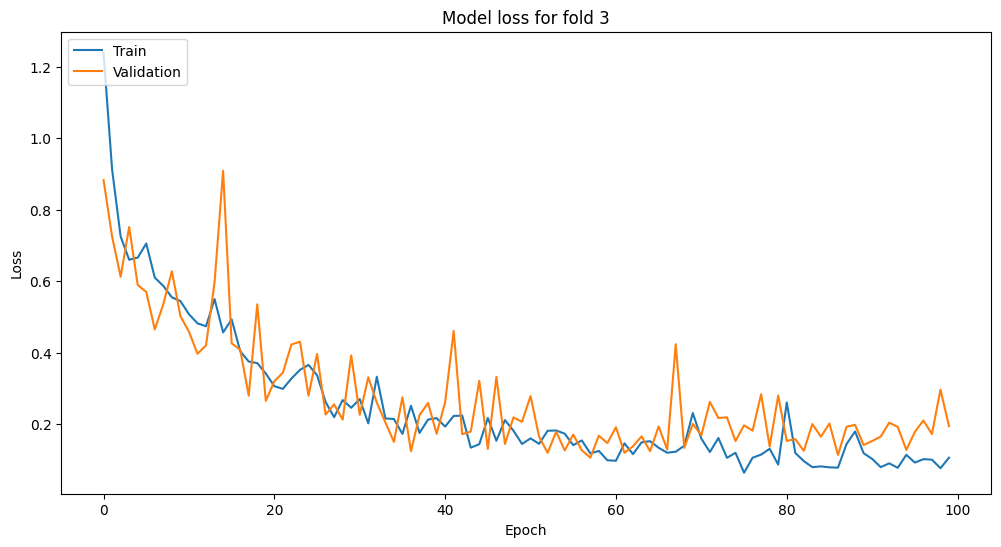

10/10 [==============================] - 1s 52ms/step - loss: 0.2612 - accuracy: 0.9238
Test accuracy for fold 3: 0.9238410592079163
Test loss for fold 3: 0.2612466514110565
10/10 [==============================] - 1s 52ms/step
Classification Report for fold 3:
              precision    recall  f1-score   support

        hail       0.92      0.90      0.91        86
   lightning       0.96      0.97      0.97        72
        rain       0.86      0.88      0.87        74
   sandstorm       0.97      0.96      0.96        70

    accuracy                           0.92       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.92      0.92      0.92       302



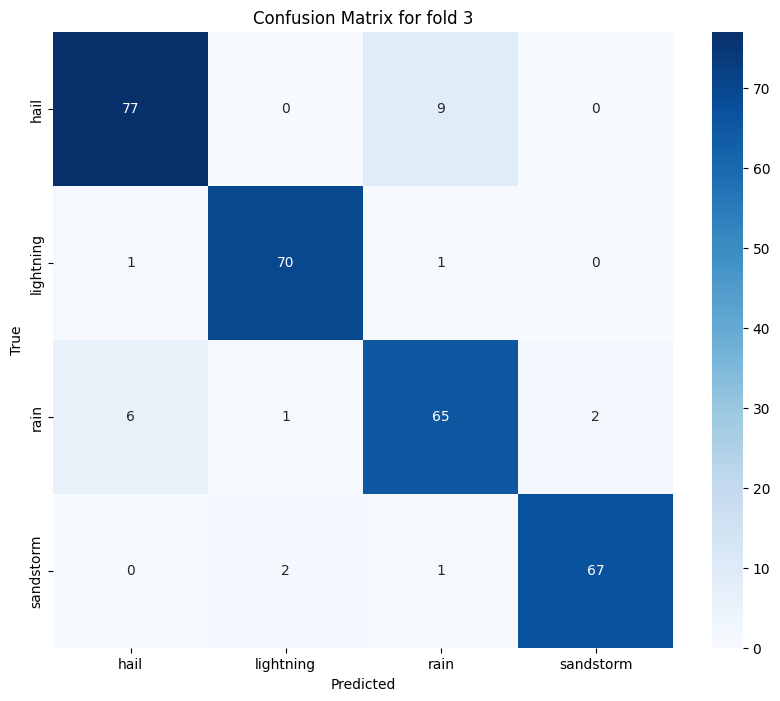

Epoch 1/100
31/31 [==============================] - 13s 365ms/step - loss: 1.3085 - accuracy: 0.3772 - val_loss: 1.0883 - val_accuracy: 0.4835
Epoch 2/100
31/31 [==============================] - 13s 410ms/step - loss: 1.0096 - accuracy: 0.5057 - val_loss: 0.8964 - val_accuracy: 0.5744
Epoch 3/100
31/31 [==============================] - 13s 423ms/step - loss: 0.8649 - accuracy: 0.6166 - val_loss: 0.7585 - val_accuracy: 0.6983
Epoch 4/100
31/31 [==============================] - 10s 305ms/step - loss: 0.7680 - accuracy: 0.6446 - val_loss: 0.7786 - val_accuracy: 0.6818
Epoch 5/100
31/31 [==============================] - 10s 315ms/step - loss: 0.7121 - accuracy: 0.7264 - val_loss: 0.6078 - val_accuracy: 0.7479
Epoch 6/100
31/31 [==============================] - 10s 326ms/step - loss: 0.6493 - accuracy: 0.7523 - val_loss: 0.6071 - val_accuracy: 0.7645
Epoch 7/100
31/31 [==============================] - 10s 304ms/step - loss: 0.6487 - accuracy: 0.7679 - val_loss: 0.7194 - val_accuracy:

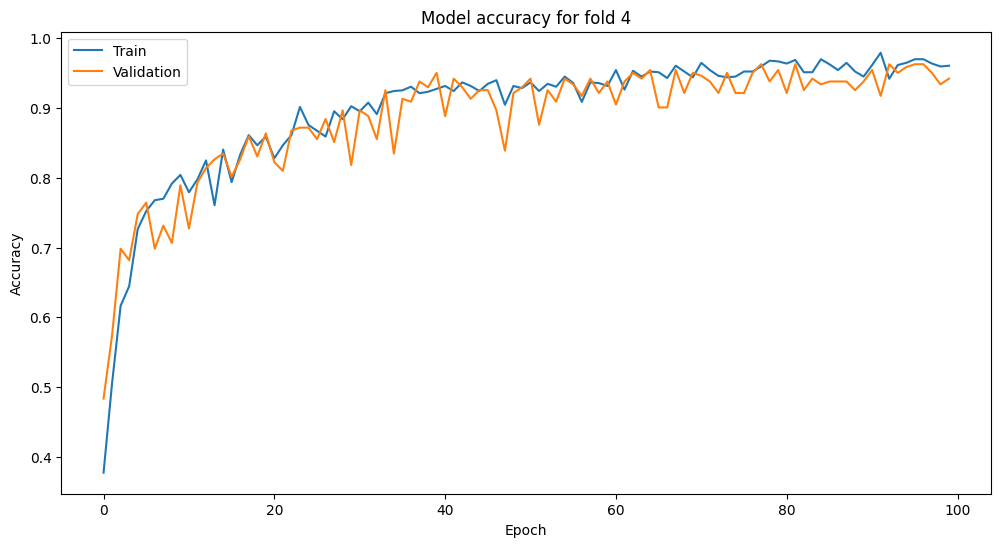

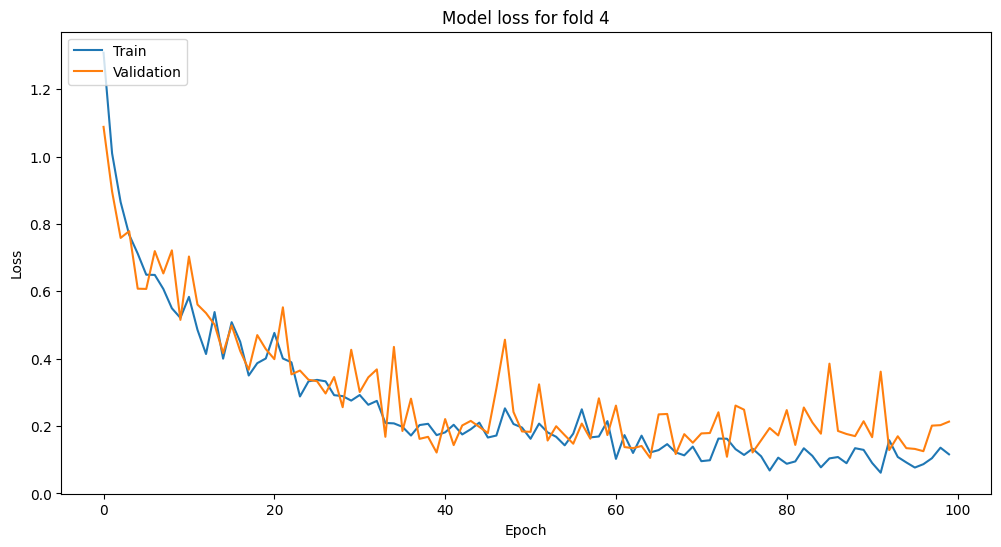

10/10 [==============================] - 2s 171ms/step - loss: 0.1909 - accuracy: 0.9468
Test accuracy for fold 4: 0.9468438625335693
Test loss for fold 4: 0.19093461334705353
10/10 [==============================] - 1s 50ms/step
Classification Report for fold 4:
              precision    recall  f1-score   support

        hail       0.96      0.94      0.95        80
   lightning       0.97      0.95      0.96        78
        rain       0.89      0.95      0.92        79
   sandstorm       0.97      0.95      0.96        64

    accuracy                           0.95       301
   macro avg       0.95      0.95      0.95       301
weighted avg       0.95      0.95      0.95       301



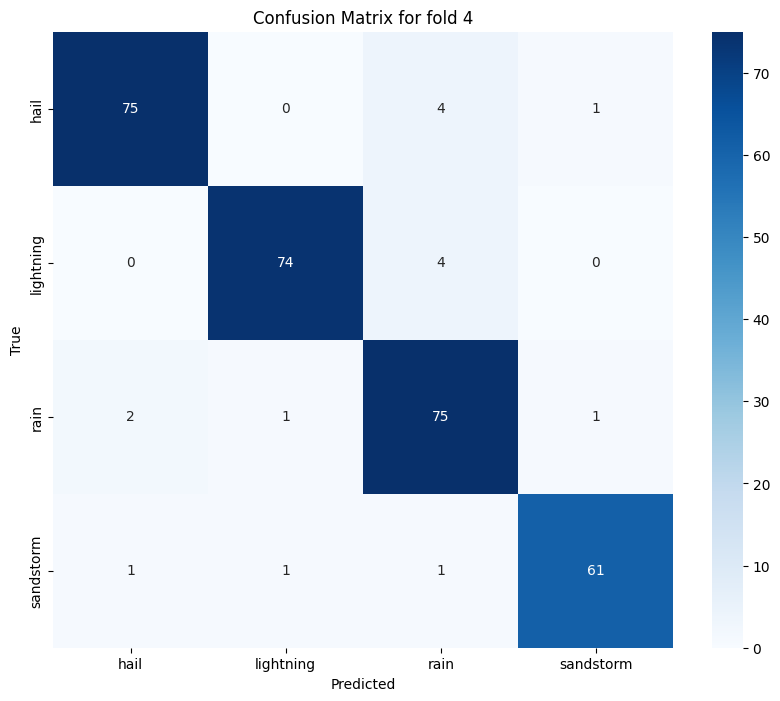

Epoch 1/100
31/31 [==============================] - 16s 468ms/step - loss: 1.3143 - accuracy: 0.3731 - val_loss: 1.0965 - val_accuracy: 0.4876
Epoch 2/100
31/31 [==============================] - 14s 432ms/step - loss: 0.9413 - accuracy: 0.5979 - val_loss: 0.7387 - val_accuracy: 0.6777
Epoch 3/100
31/31 [==============================] - 14s 433ms/step - loss: 0.7672 - accuracy: 0.6487 - val_loss: 0.5451 - val_accuracy: 0.7479
Epoch 4/100
31/31 [==============================] - 14s 431ms/step - loss: 0.7858 - accuracy: 0.6694 - val_loss: 0.6063 - val_accuracy: 0.7562
Epoch 5/100
31/31 [==============================] - 14s 430ms/step - loss: 0.6218 - accuracy: 0.7275 - val_loss: 0.4699 - val_accuracy: 0.8347
Epoch 6/100
31/31 [==============================] - 14s 445ms/step - loss: 0.6787 - accuracy: 0.7233 - val_loss: 0.5148 - val_accuracy: 0.8306
Epoch 7/100
31/31 [==============================] - 13s 423ms/step - loss: 0.5684 - accuracy: 0.7513 - val_loss: 0.3900 - val_accuracy:

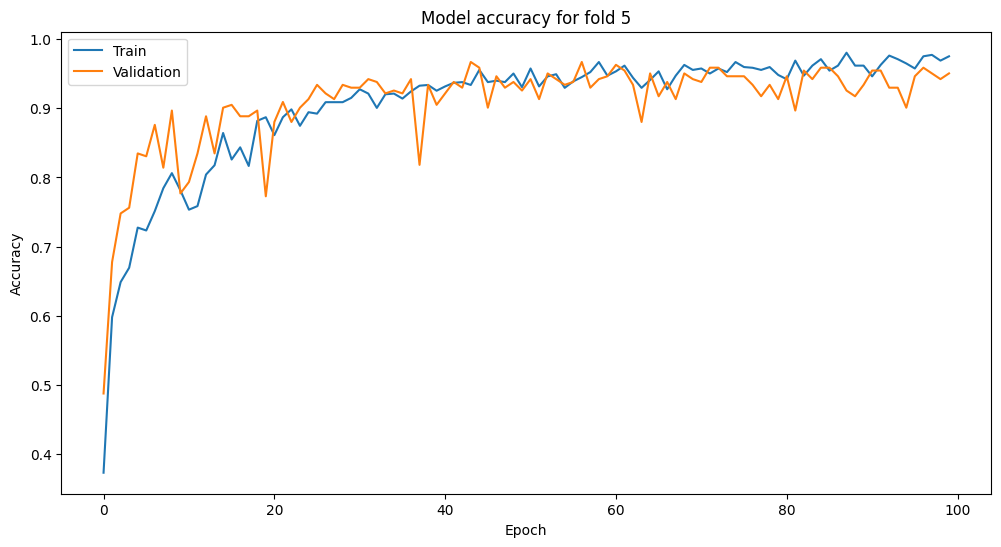

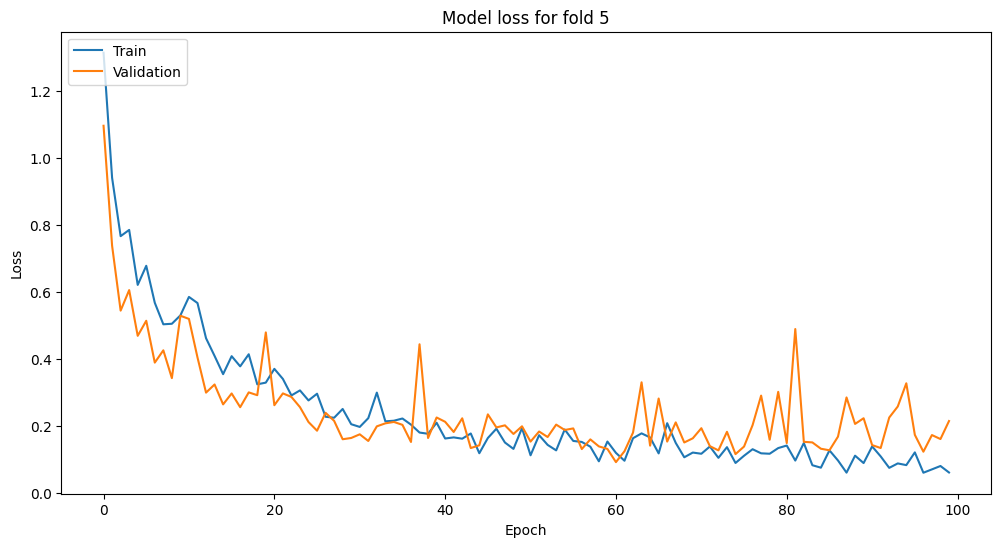

10/10 [==============================] - 1s 52ms/step - loss: 0.2981 - accuracy: 0.9435
Test accuracy for fold 5: 0.9435216188430786
Test loss for fold 5: 0.29807400703430176
10/10 [==============================] - 1s 50ms/step
Classification Report for fold 5:
              precision    recall  f1-score   support

        hail       0.91      0.98      0.95        63
   lightning       1.00      0.94      0.97        77
        rain       0.88      0.93      0.91        74
   sandstorm       0.98      0.93      0.95        87

    accuracy                           0.94       301
   macro avg       0.94      0.95      0.94       301
weighted avg       0.95      0.94      0.94       301



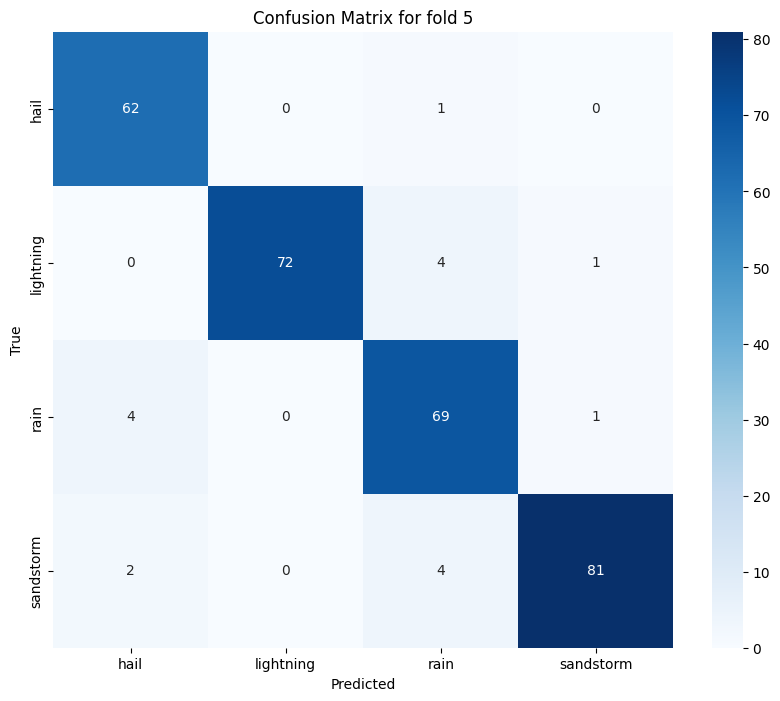

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure X and y have the same number of samples
X = all_images.reshape(-1, 256, 256, 3)
print(X.shape)
y = np.array([])


for i in range(len(cats)):
    list_of_labels = [i] * 377
    y = np.concatenate([y, list_of_labels])
print(y)
y = to_categorical(y, num_classes=len(cats))  # Convert labels to categorical format


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
fold_no = 1
for train_index, test_index in kf.split(X):
    # Re-initialize the model at the start of each fold
    model = build_five_layer_cnn_model_1()  # Define this function to build and compile your model
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Create an instance of the ImageDataGenerator with data augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Fit the data generator on the training data
    datagen.fit(X_train)
    
    # Create an augmented data generator
    augmented_data_gen = datagen.flow(X_train, y_train, batch_size=32)
    
    # Train the model
    history = model.fit(augmented_data_gen, epochs=100, validation_data=(X_val, y_val))
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy for fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss for fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test accuracy for fold {fold_no}: {test_accuracy}')
    print(f'Test loss for fold {fold_no}: {test_loss}')
    # Measure other evaluation metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Print classification report
    print(f'Classification Report for fold {fold_no}:')
    print(classification_report(y_true_classes, y_pred_classes, target_names=cats))
    
    # Print confusion matrix
    # print(f'Confusion Matrix for fold {fold_no}:')
    # print(confusion_matrix(y_true_classes, y_pred_classes))
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cats, yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for fold {fold_no}')
    plt.show()
    
        
    
    fold_no += 1
    # Clear the TensorFlow session and reset the default graph to empty VRAM
    del history
    K.clear_session()
    tf.compat.v1.reset_default_graph()
    gc.collect()
    


# Five Layer CNN 2

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_five_layer_cnn_model_2():
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fourth convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fifth convolutional layer
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(4, activation='softmax'))  # Update the output layer to match the number of categories
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

five_layer_cnn_model_2 = build_five_layer_cnn_model_2()
# Print the model summary
five_layer_cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 256)      0

(1508, 256, 256, 3)
[0. 0. 0. ... 3. 3. 3.]
Epoch 1/100
31/31 [==============================] - 14s 339ms/step - loss: 1.3756 - accuracy: 0.3351 - val_loss: 1.2630 - val_accuracy: 0.4628
Epoch 2/100
31/31 [==============================] - 10s 302ms/step - loss: 1.0386 - accuracy: 0.5353 - val_loss: 0.8478 - val_accuracy: 0.6653
Epoch 3/100
31/31 [==============================] - 9s 293ms/step - loss: 0.8559 - accuracy: 0.6317 - val_loss: 0.7363 - val_accuracy: 0.6198
Epoch 4/100
31/31 [==============================] - 9s 277ms/step - loss: 0.7590 - accuracy: 0.6763 - val_loss: 0.7076 - val_accuracy: 0.7107
Epoch 5/100
31/31 [==============================] - 8s 261ms/step - loss: 0.7477 - accuracy: 0.6867 - val_loss: 0.6906 - val_accuracy: 0.7314
Epoch 6/100
31/31 [==============================] - 8s 257ms/step - loss: 0.8368 - accuracy: 0.6722 - val_loss: 0.8474 - val_accuracy: 0.6694
Epoch 7/100
31/31 [==============================] - 9s 274ms/step - loss: 0.7263 - accuracy: 0.

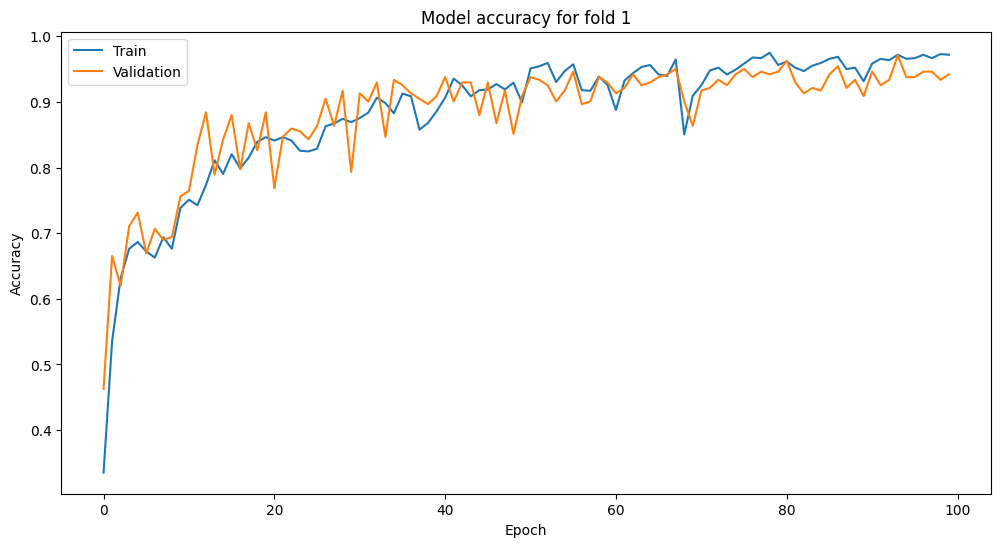

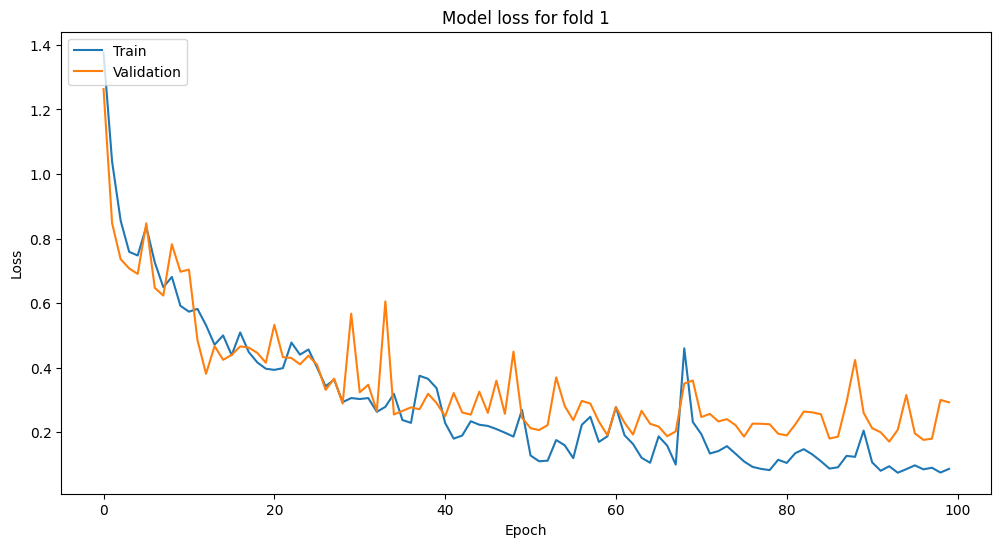

10/10 [==============================] - 1s 69ms/step - loss: 0.1372 - accuracy: 0.9536
Test accuracy for fold 1: 0.9536423683166504
Test loss for fold 1: 0.13721688091754913
10/10 [==============================] - 1s 49ms/step
Classification Report for fold 1:
              precision    recall  f1-score   support

        hail       0.91      0.97      0.94        75
   lightning       0.99      0.99      0.99        73
        rain       0.95      0.92      0.94        79
   sandstorm       0.97      0.93      0.95        75

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



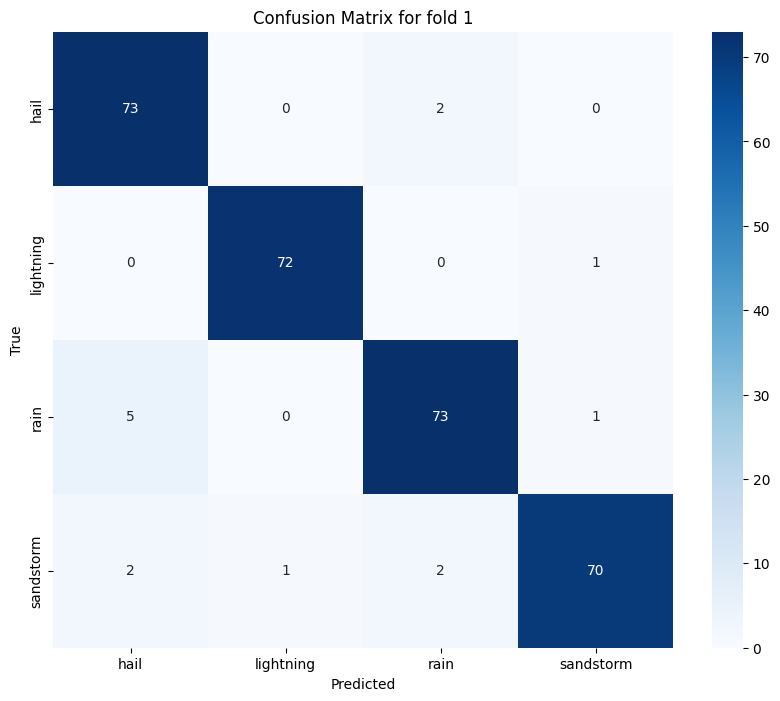

Epoch 1/100
31/31 [==============================] - 11s 326ms/step - loss: 1.2645 - accuracy: 0.3932 - val_loss: 1.2077 - val_accuracy: 0.3636
Epoch 2/100
31/31 [==============================] - 9s 297ms/step - loss: 0.8884 - accuracy: 0.6120 - val_loss: 0.7526 - val_accuracy: 0.6240
Epoch 3/100
31/31 [==============================] - 9s 276ms/step - loss: 0.7256 - accuracy: 0.7085 - val_loss: 0.5925 - val_accuracy: 0.7562
Epoch 4/100
31/31 [==============================] - 10s 318ms/step - loss: 0.6749 - accuracy: 0.7178 - val_loss: 0.7228 - val_accuracy: 0.6612
Epoch 5/100
31/31 [==============================] - 10s 331ms/step - loss: 0.6795 - accuracy: 0.7230 - val_loss: 0.5760 - val_accuracy: 0.7851
Epoch 6/100
31/31 [==============================] - 10s 325ms/step - loss: 0.5762 - accuracy: 0.7573 - val_loss: 0.6129 - val_accuracy: 0.7314
Epoch 7/100
31/31 [==============================] - 10s 324ms/step - loss: 0.5677 - accuracy: 0.7728 - val_loss: 0.6008 - val_accuracy: 0

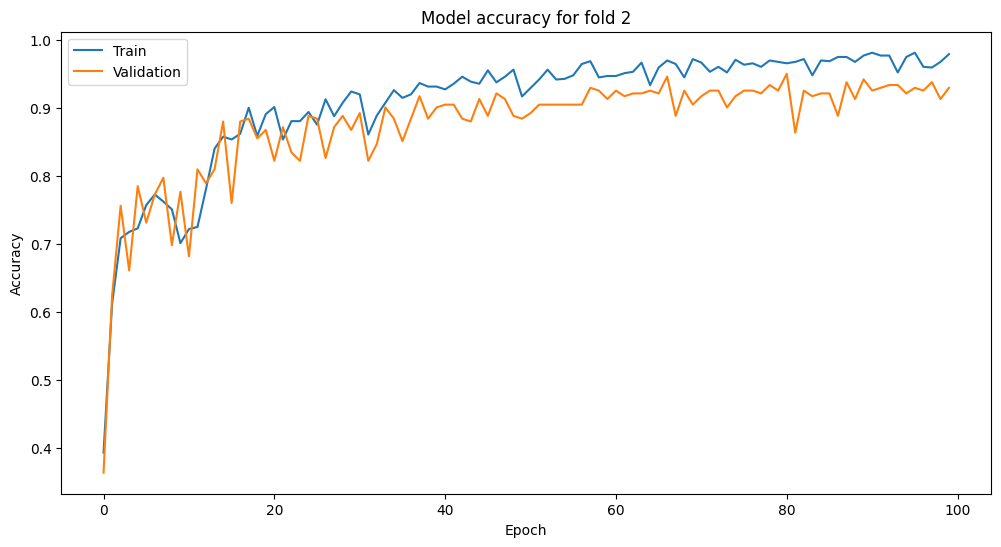

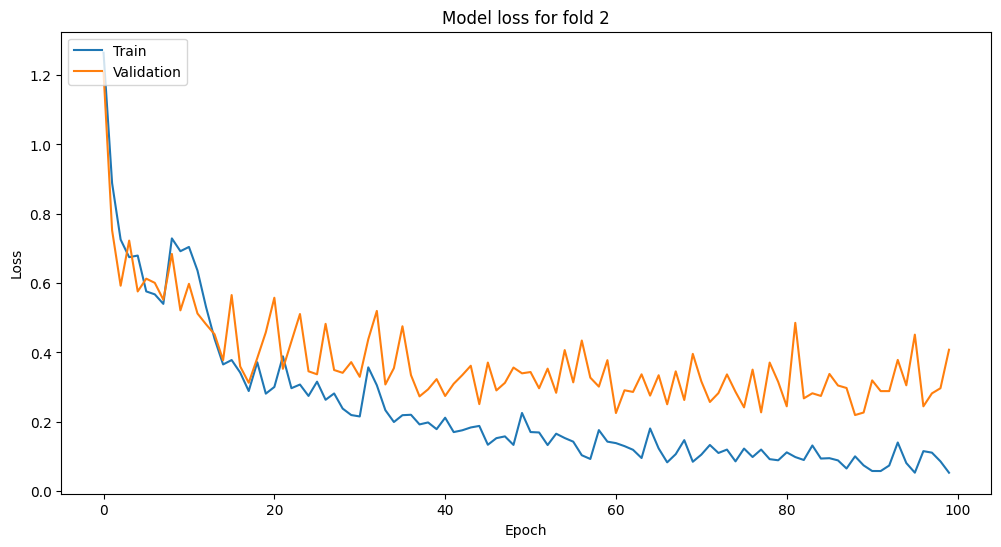

10/10 [==============================] - 1s 46ms/step - loss: 0.2807 - accuracy: 0.9437
Test accuracy for fold 2: 0.943708598613739
Test loss for fold 2: 0.2806658148765564
10/10 [==============================] - 1s 46ms/step
Classification Report for fold 2:
              precision    recall  f1-score   support

        hail       0.96      0.89      0.92        73
   lightning       1.00      0.99      0.99        77
        rain       0.83      0.96      0.89        71
   sandstorm       1.00      0.94      0.97        81

    accuracy                           0.94       302
   macro avg       0.95      0.94      0.94       302
weighted avg       0.95      0.94      0.94       302



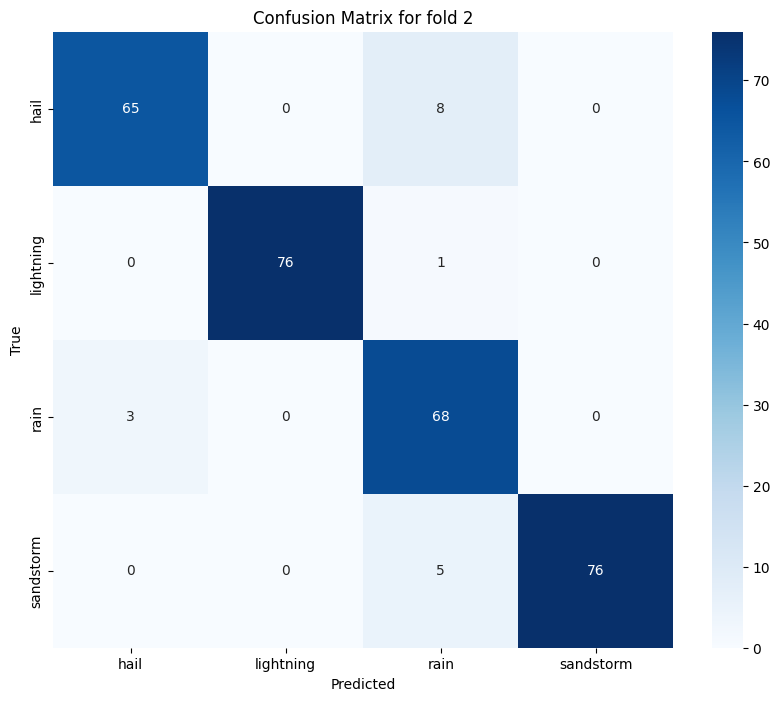

Epoch 1/100
31/31 [==============================] - 12s 345ms/step - loss: 1.3033 - accuracy: 0.4263 - val_loss: 0.9054 - val_accuracy: 0.6694
Epoch 2/100
31/31 [==============================] - 10s 303ms/step - loss: 0.9335 - accuracy: 0.5892 - val_loss: 0.6959 - val_accuracy: 0.6860
Epoch 3/100
31/31 [==============================] - 9s 294ms/step - loss: 0.7151 - accuracy: 0.6701 - val_loss: 0.5875 - val_accuracy: 0.7769
Epoch 4/100
31/31 [==============================] - 9s 286ms/step - loss: 0.6781 - accuracy: 0.6940 - val_loss: 0.7159 - val_accuracy: 0.6529
Epoch 5/100
31/31 [==============================] - 9s 289ms/step - loss: 0.7082 - accuracy: 0.7396 - val_loss: 0.9015 - val_accuracy: 0.6983
Epoch 6/100
31/31 [==============================] - 9s 286ms/step - loss: 0.5997 - accuracy: 0.7407 - val_loss: 0.4787 - val_accuracy: 0.7893
Epoch 7/100
31/31 [==============================] - 9s 286ms/step - loss: 0.5480 - accuracy: 0.7707 - val_loss: 0.4169 - val_accuracy: 0.83

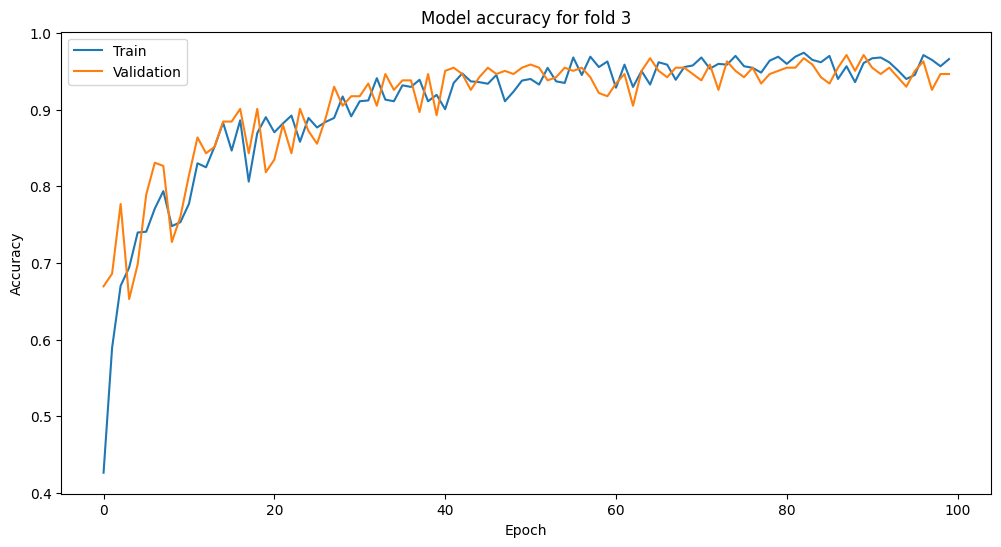

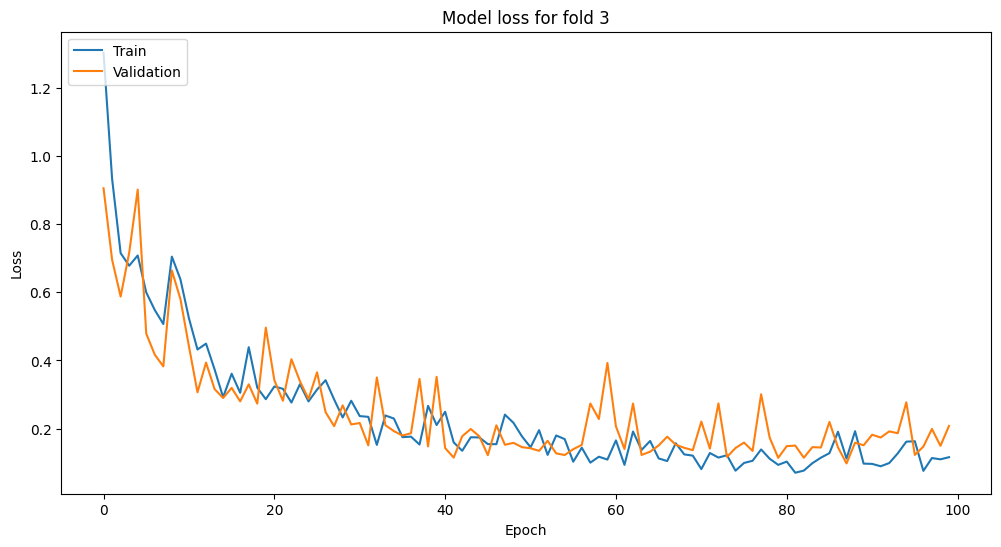

10/10 [==============================] - 1s 46ms/step - loss: 0.2424 - accuracy: 0.9205
Test accuracy for fold 3: 0.9205297827720642
Test loss for fold 3: 0.24239353835582733
10/10 [==============================] - 1s 46ms/step
Classification Report for fold 3:
              precision    recall  f1-score   support

        hail       1.00      0.85      0.92        86
   lightning       0.89      1.00      0.94        72
        rain       0.83      0.91      0.86        74
   sandstorm       0.99      0.94      0.96        70

    accuracy                           0.92       302
   macro avg       0.93      0.92      0.92       302
weighted avg       0.93      0.92      0.92       302



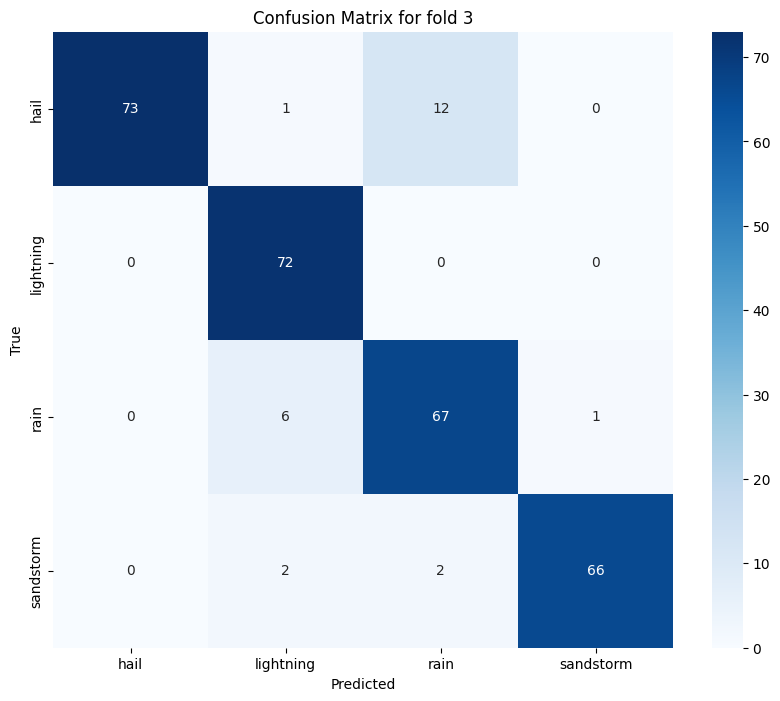

Epoch 1/100
31/31 [==============================] - 12s 349ms/step - loss: 1.3022 - accuracy: 0.3658 - val_loss: 1.4360 - val_accuracy: 0.3802
Epoch 2/100
31/31 [==============================] - 10s 321ms/step - loss: 1.2260 - accuracy: 0.3606 - val_loss: 1.0335 - val_accuracy: 0.5207
Epoch 3/100
31/31 [==============================] - 9s 292ms/step - loss: 0.9739 - accuracy: 0.5699 - val_loss: 0.8950 - val_accuracy: 0.6281
Epoch 4/100
31/31 [==============================] - 9s 304ms/step - loss: 0.7591 - accuracy: 0.6881 - val_loss: 0.8024 - val_accuracy: 0.6777
Epoch 5/100
31/31 [==============================] - 9s 291ms/step - loss: 0.7881 - accuracy: 0.7150 - val_loss: 0.7469 - val_accuracy: 0.7025
Epoch 6/100
31/31 [==============================] - 9s 298ms/step - loss: 0.6614 - accuracy: 0.7399 - val_loss: 0.6712 - val_accuracy: 0.7190
Epoch 7/100
31/31 [==============================] - 10s 313ms/step - loss: 0.5556 - accuracy: 0.7865 - val_loss: 0.5846 - val_accuracy: 0.7

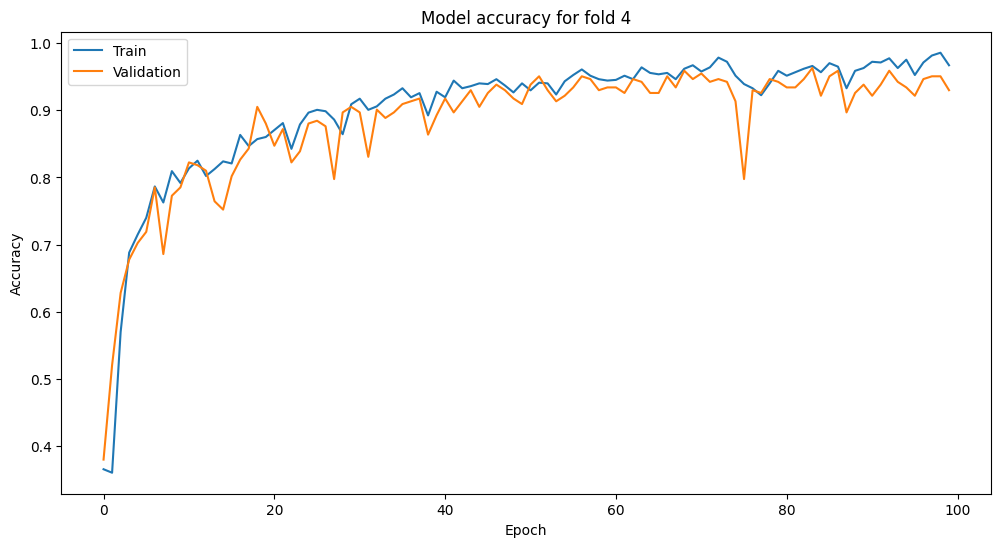

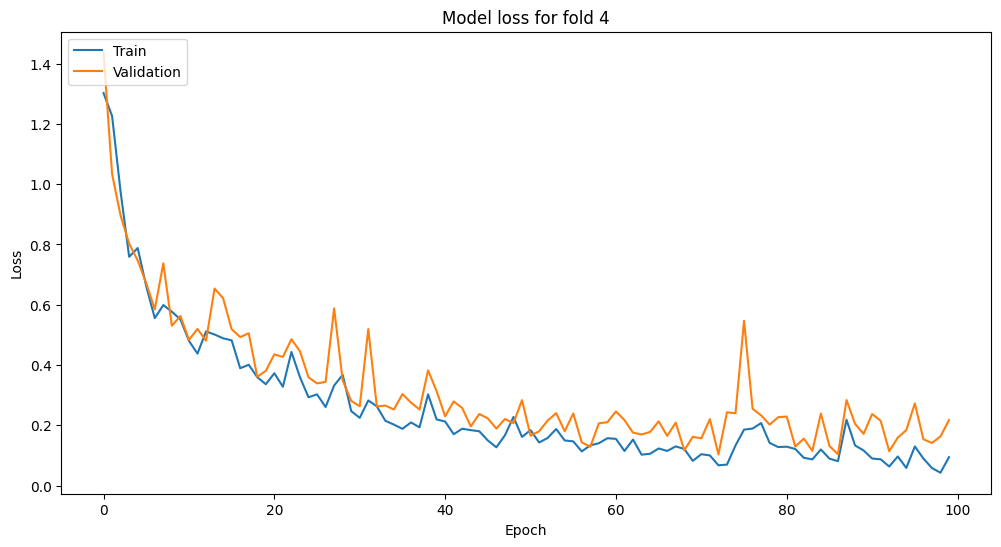

10/10 [==============================] - 1s 68ms/step - loss: 0.3683 - accuracy: 0.9203
Test accuracy for fold 4: 0.920265793800354
Test loss for fold 4: 0.36825841665267944
10/10 [==============================] - 1s 49ms/step
Classification Report for fold 4:
              precision    recall  f1-score   support

        hail       0.93      0.96      0.94        80
   lightning       0.88      0.96      0.92        78
        rain       0.93      0.85      0.89        79
   sandstorm       0.95      0.91      0.93        64

    accuracy                           0.92       301
   macro avg       0.92      0.92      0.92       301
weighted avg       0.92      0.92      0.92       301



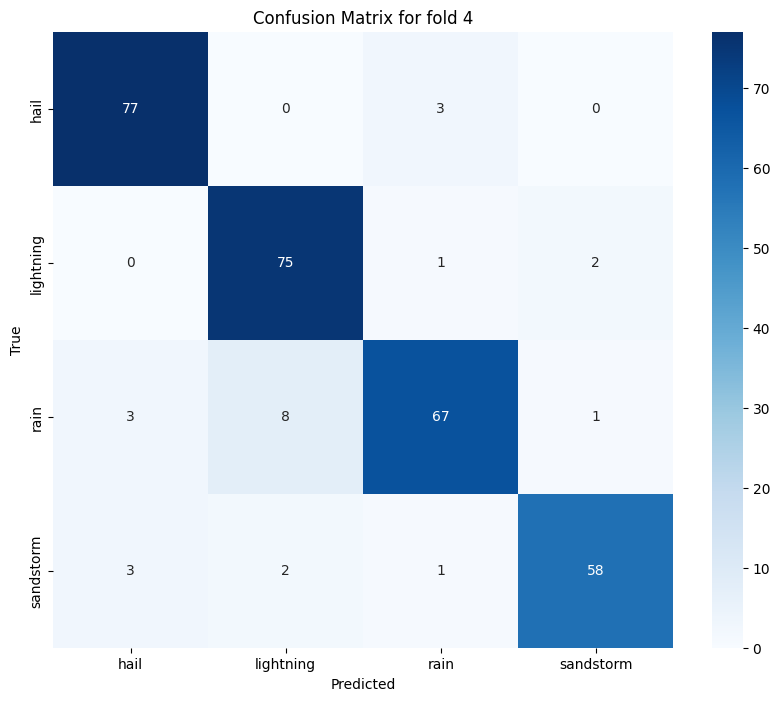

Epoch 1/100
31/31 [==============================] - 12s 327ms/step - loss: 1.4447 - accuracy: 0.3223 - val_loss: 1.2625 - val_accuracy: 0.2851
Epoch 2/100
31/31 [==============================] - 13s 418ms/step - loss: 1.0735 - accuracy: 0.5347 - val_loss: 1.2436 - val_accuracy: 0.4463
Epoch 3/100
31/31 [==============================] - 13s 423ms/step - loss: 0.7702 - accuracy: 0.6528 - val_loss: 0.6760 - val_accuracy: 0.7190
Epoch 4/100
31/31 [==============================] - 13s 424ms/step - loss: 0.6460 - accuracy: 0.7409 - val_loss: 0.7254 - val_accuracy: 0.7107
Epoch 5/100
31/31 [==============================] - 12s 392ms/step - loss: 0.6305 - accuracy: 0.7389 - val_loss: 0.4726 - val_accuracy: 0.8347
Epoch 6/100
31/31 [==============================] - 12s 377ms/step - loss: 0.5493 - accuracy: 0.7762 - val_loss: 0.5342 - val_accuracy: 0.8017
Epoch 7/100
31/31 [==============================] - 13s 373ms/step - loss: 0.6517 - accuracy: 0.7316 - val_loss: 0.4494 - val_accuracy:

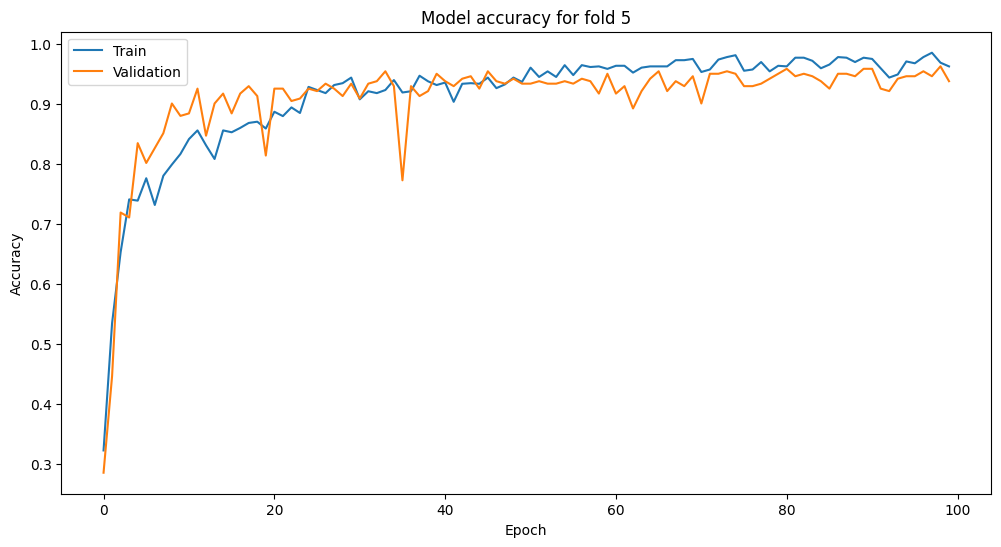

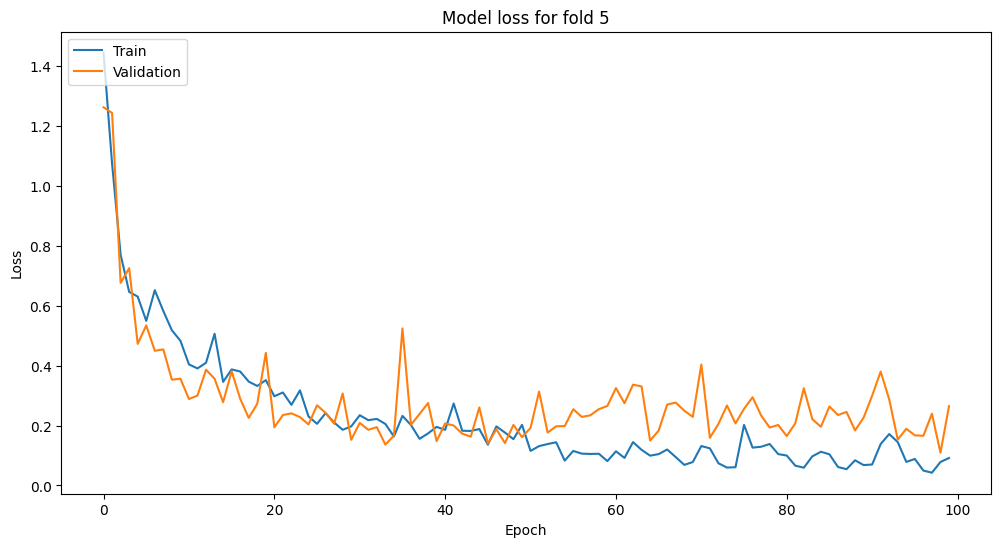

10/10 [==============================] - 1s 56ms/step - loss: 0.4030 - accuracy: 0.9003
Test accuracy for fold 5: 0.9003322124481201
Test loss for fold 5: 0.40298131108283997
10/10 [==============================] - 1s 56ms/step
Classification Report for fold 5:
              precision    recall  f1-score   support

        hail       0.81      0.98      0.89        63
   lightning       1.00      0.88      0.94        77
        rain       0.89      0.77      0.83        74
   sandstorm       0.91      0.97      0.94        87

    accuracy                           0.90       301
   macro avg       0.90      0.90      0.90       301
weighted avg       0.91      0.90      0.90       301



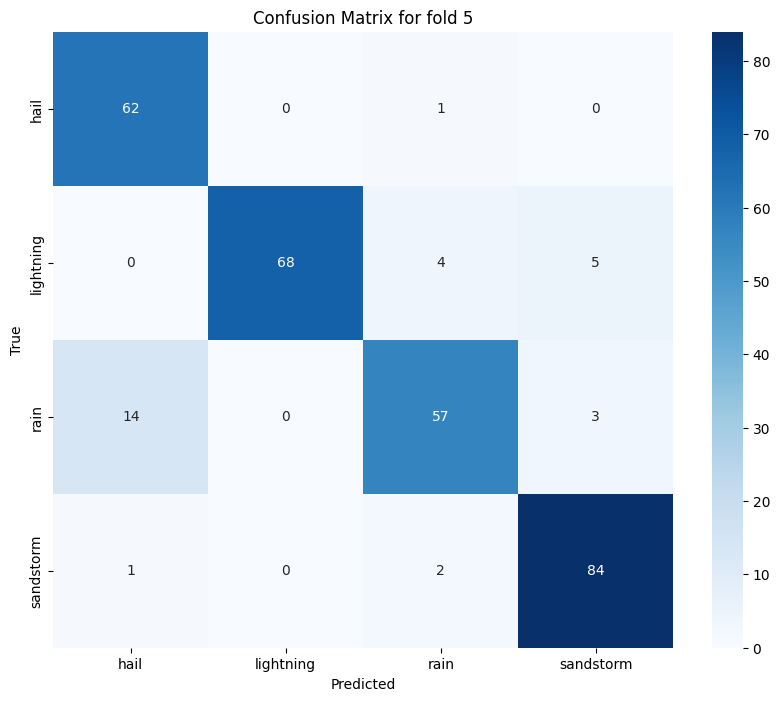

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure X and y have the same number of samples
X = all_images.reshape(-1, 256, 256, 3)
print(X.shape)
y = np.array([])


for i in range(len(cats)):
    list_of_labels = [i] * 377
    y = np.concatenate([y, list_of_labels])
print(y)
y = to_categorical(y, num_classes=len(cats))  # Convert labels to categorical format


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
fold_no = 1
for train_index, test_index in kf.split(X):
    # Re-initialize the model at the start of each fold
    model = build_five_layer_cnn_model_2()  # Define this function to build and compile your model
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Create an instance of the ImageDataGenerator with data augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Fit the data generator on the training data
    datagen.fit(X_train)
    
    # Create an augmented data generator
    augmented_data_gen = datagen.flow(X_train, y_train, batch_size=32)
    
    # Train the model
    history = model.fit(augmented_data_gen, epochs=100, validation_data=(X_val, y_val))
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy for fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss for fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test accuracy for fold {fold_no}: {test_accuracy}')
    print(f'Test loss for fold {fold_no}: {test_loss}')
    # Measure other evaluation metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Print classification report
    print(f'Classification Report for fold {fold_no}:')
    print(classification_report(y_true_classes, y_pred_classes, target_names=cats))
    
    # Print confusion matrix
    # print(f'Confusion Matrix for fold {fold_no}:')
    # print(confusion_matrix(y_true_classes, y_pred_classes))
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cats, yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for fold {fold_no}')
    plt.show()
    
        
    
    fold_no += 1
    # Clear the TensorFlow session and reset the default graph to empty VRAM
    del history
    K.clear_session()
    tf.compat.v1.reset_default_graph()
    gc.collect()
    


# Four Layer CNN 1

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_four_layer_cnn_model_1():
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fourth convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    
    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(len(cats), activation='softmax'))  # Update the output layer to match the number of categories
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

four_layer_cnn_model_1 = build_four_layer_cnn_model_1()
# Print the model summary
four_layer_cnn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 256)      0

(1508, 256, 256, 3)
[0. 0. 0. ... 3. 3. 3.]
Epoch 1/100
31/31 [==============================] - 20s 274ms/step - loss: 1.0635 - accuracy: 0.5124 - val_loss: 0.8579 - val_accuracy: 0.7107
Epoch 2/100
31/31 [==============================] - 7s 229ms/step - loss: 0.7402 - accuracy: 0.6649 - val_loss: 0.6225 - val_accuracy: 0.6942
Epoch 3/100
31/31 [==============================] - 8s 246ms/step - loss: 0.6746 - accuracy: 0.7116 - val_loss: 0.5860 - val_accuracy: 0.7810
Epoch 4/100
31/31 [==============================] - 7s 220ms/step - loss: 0.6928 - accuracy: 0.7210 - val_loss: 0.5050 - val_accuracy: 0.8554
Epoch 5/100
31/31 [==============================] - 7s 215ms/step - loss: 0.6455 - accuracy: 0.7241 - val_loss: 0.5902 - val_accuracy: 0.7686
Epoch 6/100
31/31 [==============================] - 7s 210ms/step - loss: 0.6177 - accuracy: 0.7510 - val_loss: 0.5616 - val_accuracy: 0.8182
Epoch 7/100
31/31 [==============================] - 7s 212ms/step - loss: 0.5767 - accuracy: 0.7

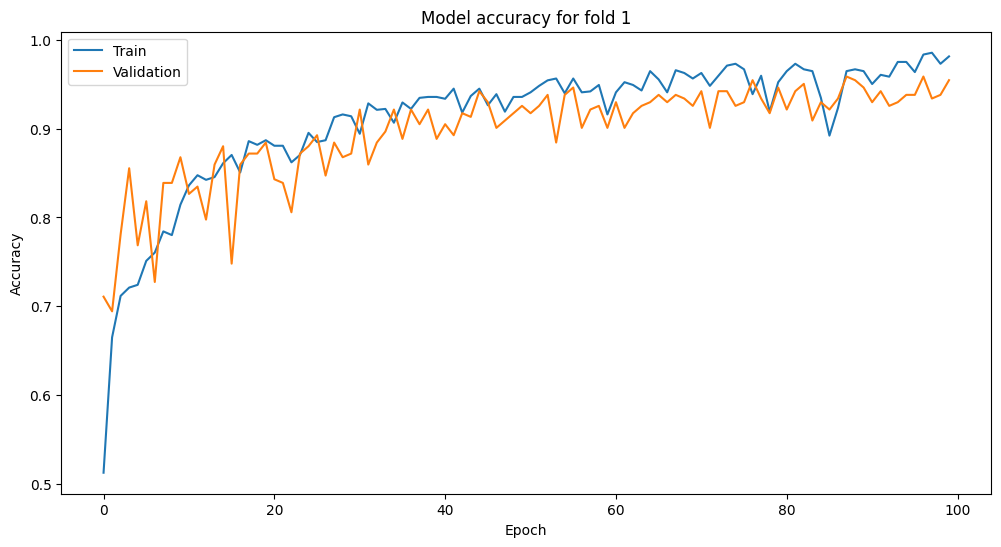

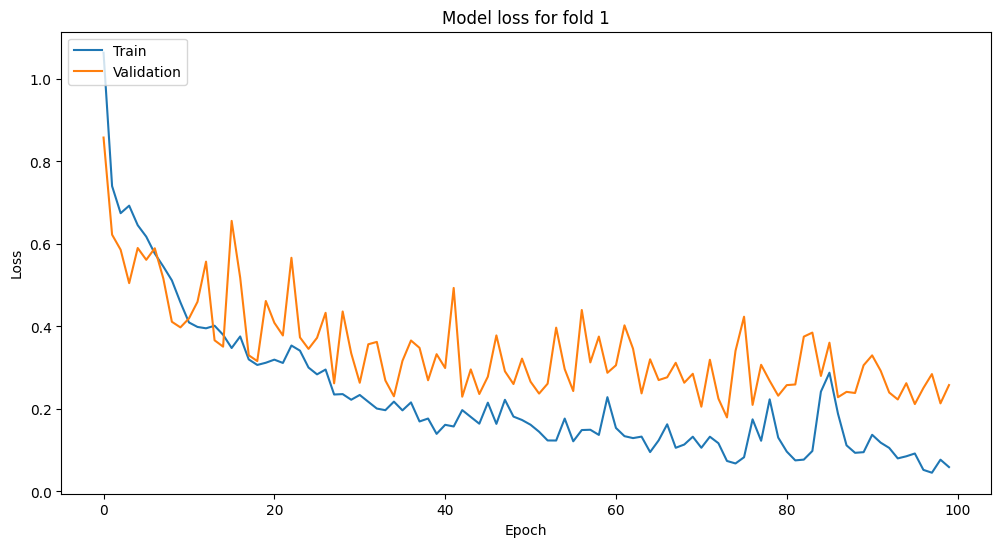

10/10 [==============================] - 1s 97ms/step - loss: 0.2184 - accuracy: 0.9570
Test accuracy for fold 1: 0.9569536447525024
Test loss for fold 1: 0.21843649446964264
10/10 [==============================] - 0s 31ms/step
Classification Report for fold 1:
              precision    recall  f1-score   support

        hail       0.97      0.89      0.93        75
   lightning       0.99      1.00      0.99        73
        rain       0.91      0.95      0.93        79
   sandstorm       0.96      0.99      0.97        75

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302



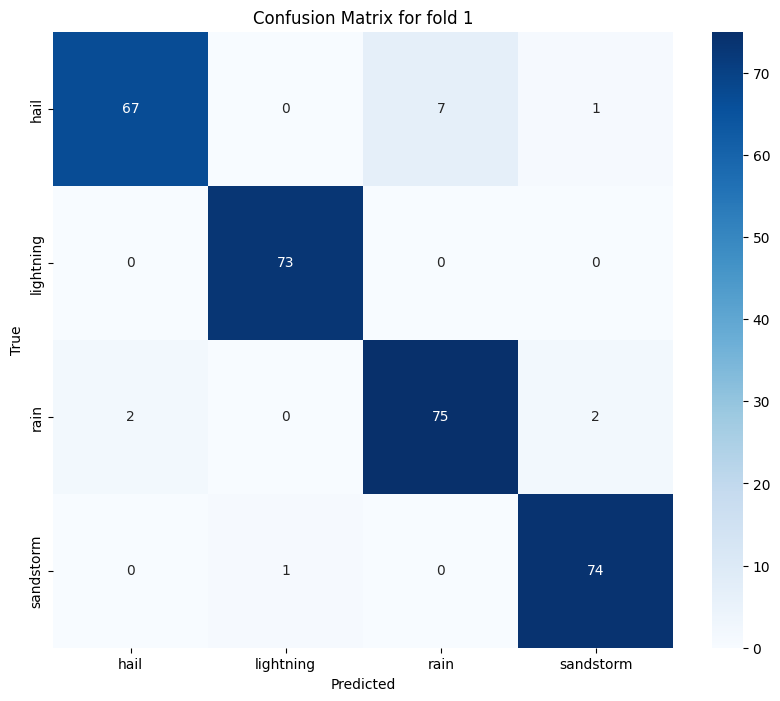

Epoch 1/100
31/31 [==============================] - 9s 247ms/step - loss: 1.4141 - accuracy: 0.3838 - val_loss: 0.9433 - val_accuracy: 0.5950
Epoch 2/100
31/31 [==============================] - 7s 223ms/step - loss: 0.8760 - accuracy: 0.6390 - val_loss: 0.8559 - val_accuracy: 0.5992
Epoch 3/100
31/31 [==============================] - 7s 233ms/step - loss: 1.0179 - accuracy: 0.5923 - val_loss: 0.9083 - val_accuracy: 0.6942
Epoch 4/100
31/31 [==============================] - 8s 242ms/step - loss: 0.6682 - accuracy: 0.7293 - val_loss: 0.5930 - val_accuracy: 0.7355
Epoch 5/100
31/31 [==============================] - 7s 221ms/step - loss: 0.6679 - accuracy: 0.7376 - val_loss: 0.5004 - val_accuracy: 0.8017
Epoch 6/100
31/31 [==============================] - 7s 224ms/step - loss: 0.5533 - accuracy: 0.7842 - val_loss: 0.5341 - val_accuracy: 0.7727
Epoch 7/100
31/31 [==============================] - 7s 226ms/step - loss: 0.4982 - accuracy: 0.7967 - val_loss: 0.6098 - val_accuracy: 0.7645

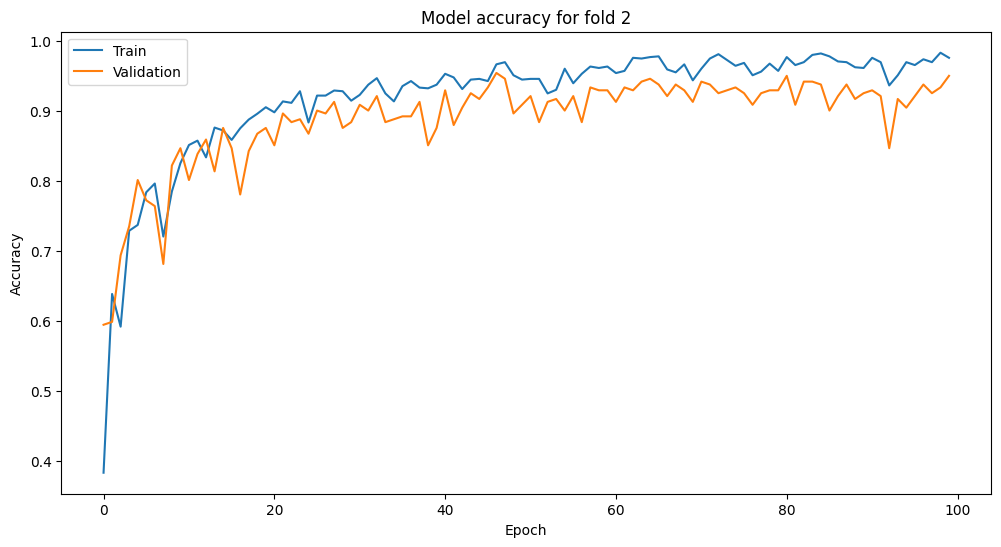

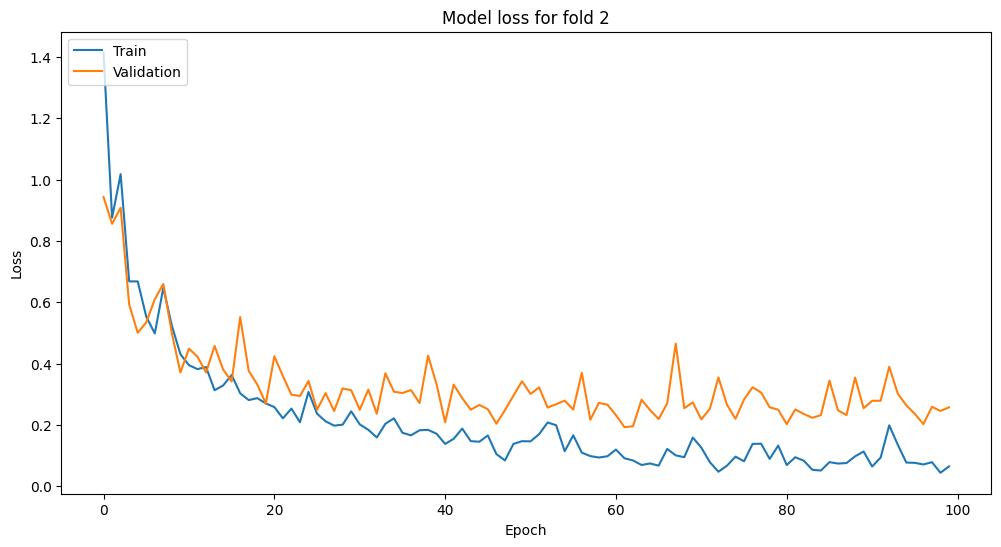

10/10 [==============================] - 0s 32ms/step - loss: 0.2220 - accuracy: 0.9338
Test accuracy for fold 2: 0.9337748289108276
Test loss for fold 2: 0.22203154861927032
10/10 [==============================] - 0s 31ms/step
Classification Report for fold 2:
              precision    recall  f1-score   support

        hail       0.94      0.88      0.91        73
   lightning       0.97      1.00      0.99        77
        rain       0.83      0.92      0.87        71
   sandstorm       0.99      0.94      0.96        81

    accuracy                           0.93       302
   macro avg       0.93      0.93      0.93       302
weighted avg       0.94      0.93      0.93       302



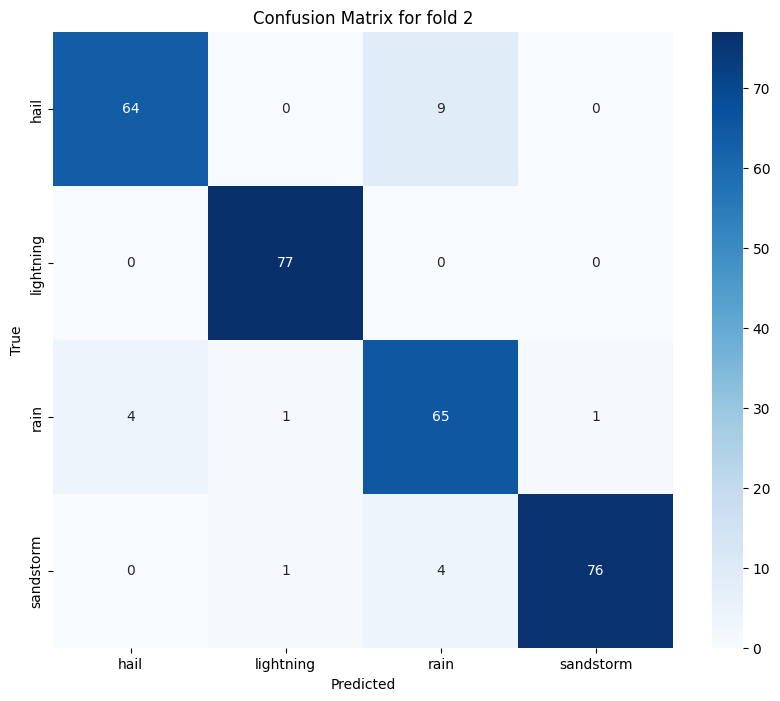

Epoch 1/100
31/31 [==============================] - 9s 258ms/step - loss: 1.1025 - accuracy: 0.5166 - val_loss: 0.7870 - val_accuracy: 0.6240
Epoch 2/100
31/31 [==============================] - 7s 232ms/step - loss: 0.7707 - accuracy: 0.6867 - val_loss: 0.5220 - val_accuracy: 0.7975
Epoch 3/100
31/31 [==============================] - 7s 233ms/step - loss: 0.6922 - accuracy: 0.7168 - val_loss: 0.5477 - val_accuracy: 0.7645
Epoch 4/100
31/31 [==============================] - 7s 230ms/step - loss: 0.6299 - accuracy: 0.7417 - val_loss: 0.5041 - val_accuracy: 0.7934
Epoch 5/100
31/31 [==============================] - 8s 254ms/step - loss: 0.5780 - accuracy: 0.7521 - val_loss: 0.4682 - val_accuracy: 0.8264
Epoch 6/100
31/31 [==============================] - 7s 234ms/step - loss: 0.5112 - accuracy: 0.8039 - val_loss: 0.5047 - val_accuracy: 0.8347
Epoch 7/100
31/31 [==============================] - 8s 241ms/step - loss: 0.4805 - accuracy: 0.8185 - val_loss: 0.4338 - val_accuracy: 0.8182

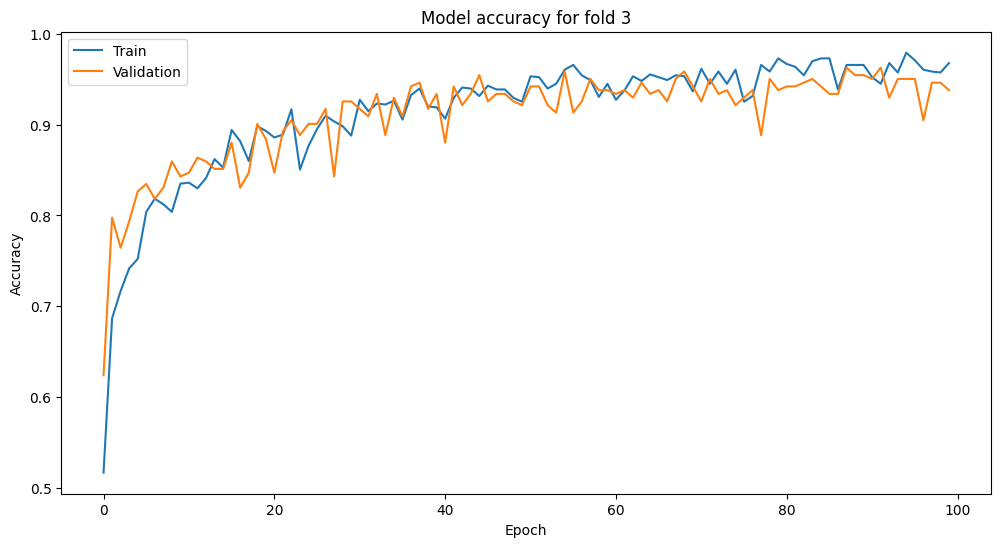

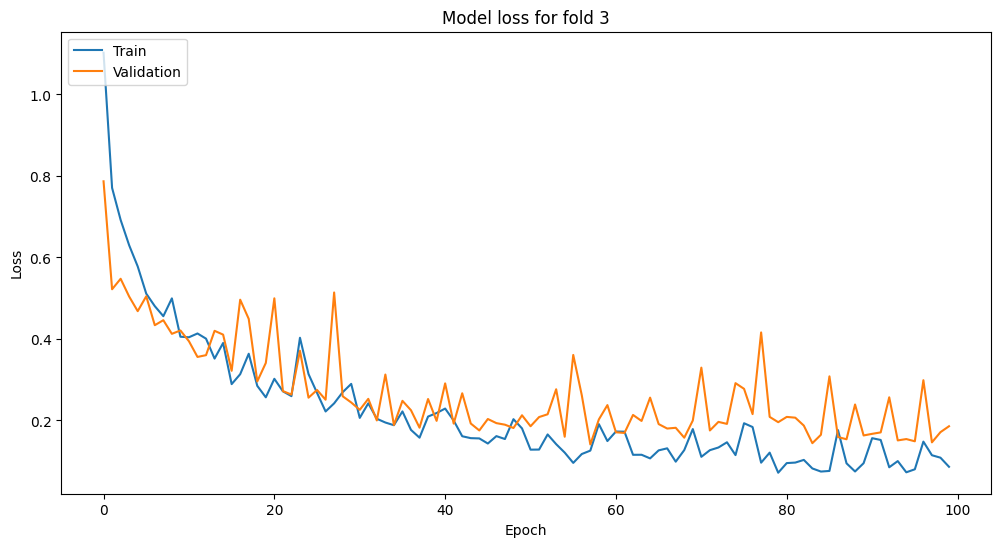

10/10 [==============================] - 0s 31ms/step - loss: 0.3786 - accuracy: 0.9305
Test accuracy for fold 3: 0.9304635524749756
Test loss for fold 3: 0.3785926401615143
10/10 [==============================] - 0s 30ms/step
Classification Report for fold 3:
              precision    recall  f1-score   support

        hail       0.87      0.97      0.92        86
   lightning       0.93      0.97      0.95        72
        rain       0.96      0.86      0.91        74
   sandstorm       0.98      0.91      0.95        70

    accuracy                           0.93       302
   macro avg       0.94      0.93      0.93       302
weighted avg       0.93      0.93      0.93       302



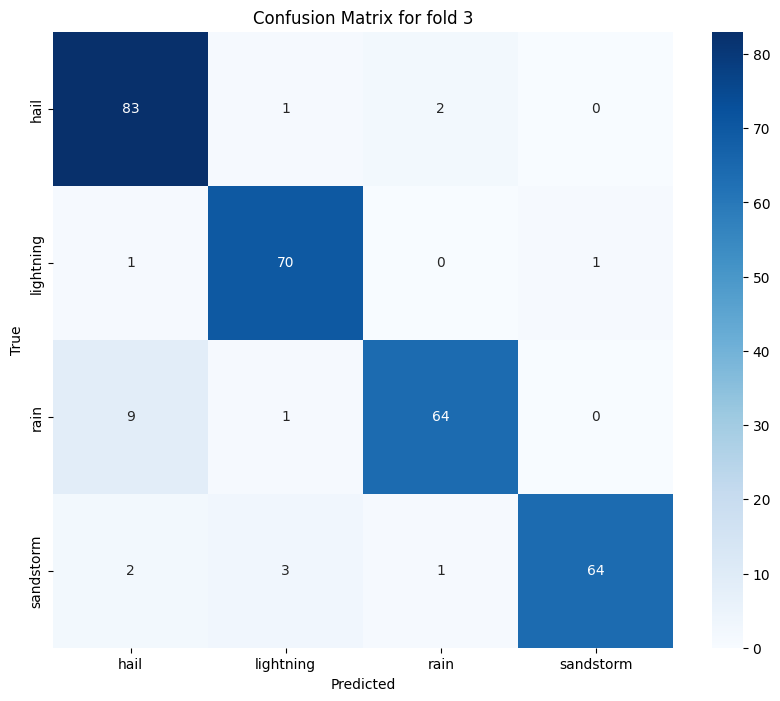

Epoch 1/100
31/31 [==============================] - 10s 284ms/step - loss: 1.3866 - accuracy: 0.4394 - val_loss: 1.1543 - val_accuracy: 0.4628
Epoch 2/100
31/31 [==============================] - 8s 241ms/step - loss: 0.8851 - accuracy: 0.5896 - val_loss: 0.7322 - val_accuracy: 0.6653
Epoch 3/100
31/31 [==============================] - 7s 235ms/step - loss: 0.7053 - accuracy: 0.7016 - val_loss: 0.6206 - val_accuracy: 0.7810
Epoch 4/100
31/31 [==============================] - 7s 232ms/step - loss: 0.6201 - accuracy: 0.7472 - val_loss: 0.7574 - val_accuracy: 0.7355
Epoch 5/100
31/31 [==============================] - 8s 248ms/step - loss: 0.6373 - accuracy: 0.7461 - val_loss: 0.5816 - val_accuracy: 0.7975
Epoch 6/100
31/31 [==============================] - 8s 241ms/step - loss: 0.4926 - accuracy: 0.8104 - val_loss: 0.4963 - val_accuracy: 0.7893
Epoch 7/100
31/31 [==============================] - 8s 246ms/step - loss: 0.5296 - accuracy: 0.7917 - val_loss: 0.5716 - val_accuracy: 0.785

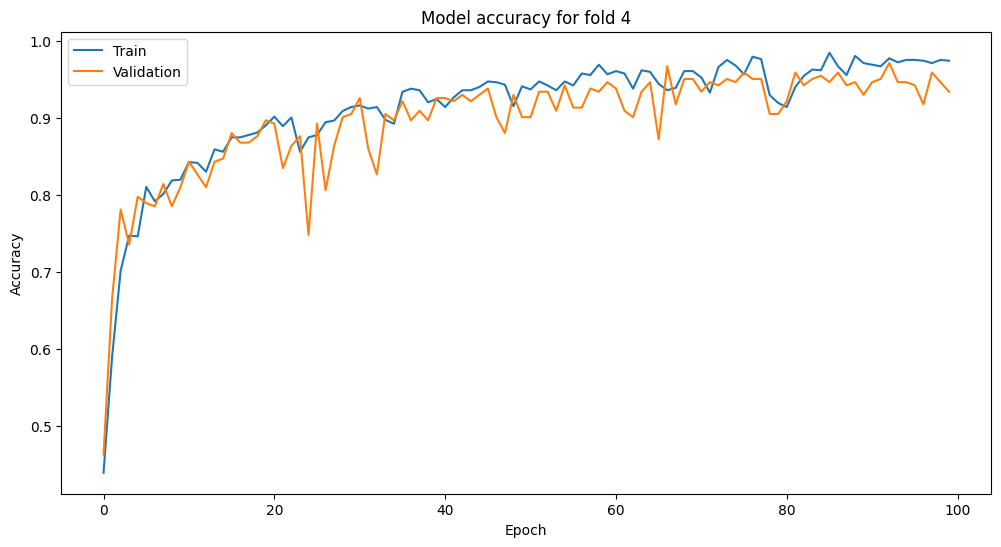

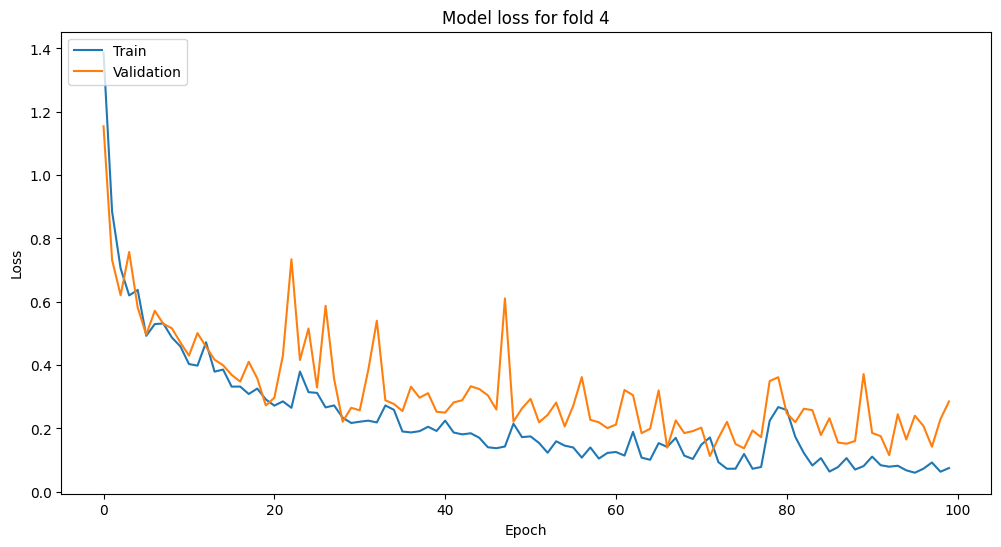

10/10 [==============================] - 1s 100ms/step - loss: 0.3704 - accuracy: 0.8771
Test accuracy for fold 4: 0.8770763874053955
Test loss for fold 4: 0.3703762888908386
10/10 [==============================] - 0s 32ms/step
Classification Report for fold 4:
              precision    recall  f1-score   support

        hail       0.88      0.90      0.89        80
   lightning       0.91      0.92      0.92        78
        rain       0.79      0.87      0.83        79
   sandstorm       0.96      0.80      0.87        64

    accuracy                           0.88       301
   macro avg       0.89      0.87      0.88       301
weighted avg       0.88      0.88      0.88       301



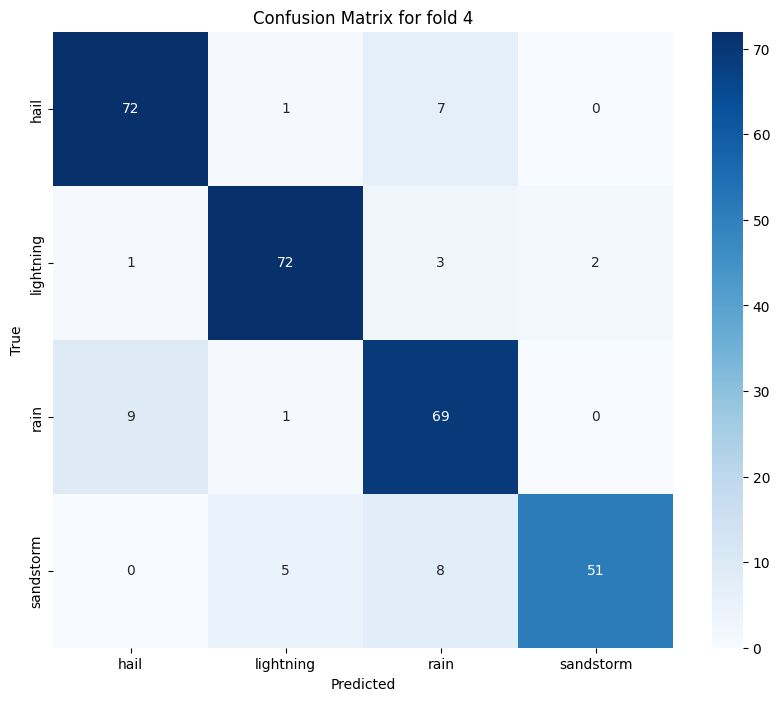

Epoch 1/100
31/31 [==============================] - 9s 256ms/step - loss: 1.1728 - accuracy: 0.4591 - val_loss: 0.8453 - val_accuracy: 0.7066
Epoch 2/100
31/31 [==============================] - 8s 243ms/step - loss: 0.8473 - accuracy: 0.6166 - val_loss: 0.6328 - val_accuracy: 0.6860
Epoch 3/100
31/31 [==============================] - 7s 237ms/step - loss: 0.7288 - accuracy: 0.6850 - val_loss: 0.6961 - val_accuracy: 0.6901
Epoch 4/100
31/31 [==============================] - 8s 249ms/step - loss: 0.6355 - accuracy: 0.7513 - val_loss: 0.6221 - val_accuracy: 0.7355
Epoch 5/100
31/31 [==============================] - 8s 251ms/step - loss: 0.5741 - accuracy: 0.7762 - val_loss: 0.5449 - val_accuracy: 0.7975
Epoch 6/100
31/31 [==============================] - 8s 245ms/step - loss: 0.5922 - accuracy: 0.7523 - val_loss: 0.5284 - val_accuracy: 0.8347
Epoch 7/100
31/31 [==============================] - 8s 253ms/step - loss: 0.6079 - accuracy: 0.7720 - val_loss: 0.4753 - val_accuracy: 0.8347

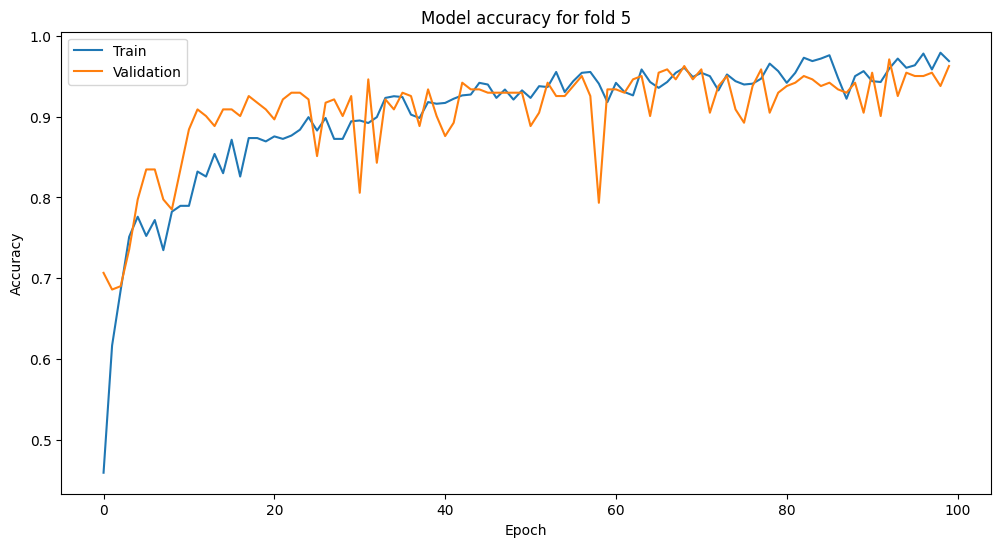

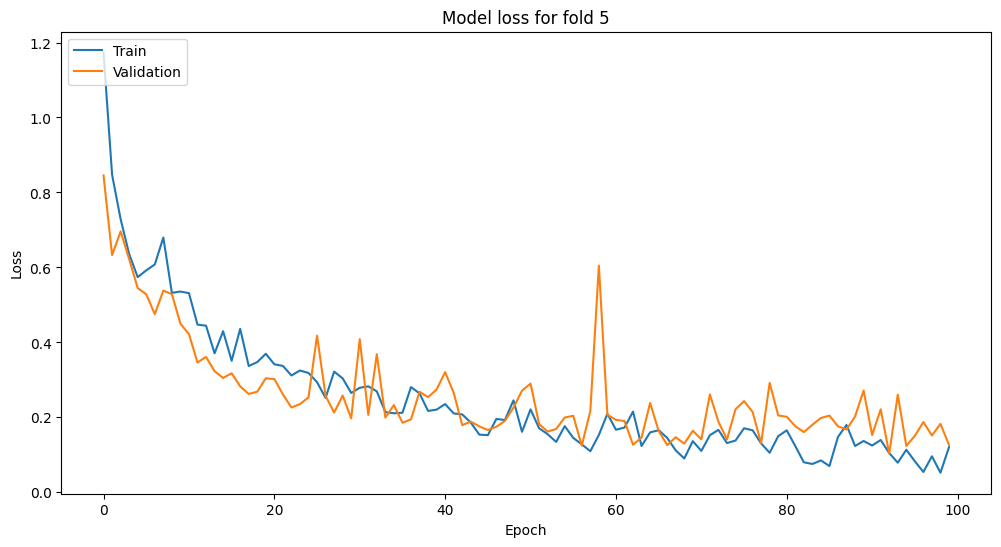

10/10 [==============================] - 0s 33ms/step - loss: 0.1914 - accuracy: 0.9302
Test accuracy for fold 5: 0.930232584476471
Test loss for fold 5: 0.19135276973247528
10/10 [==============================] - 0s 31ms/step
Classification Report for fold 5:
              precision    recall  f1-score   support

        hail       0.88      0.95      0.92        63
   lightning       0.97      0.95      0.96        77
        rain       0.93      0.85      0.89        74
   sandstorm       0.93      0.97      0.95        87

    accuracy                           0.93       301
   macro avg       0.93      0.93      0.93       301
weighted avg       0.93      0.93      0.93       301



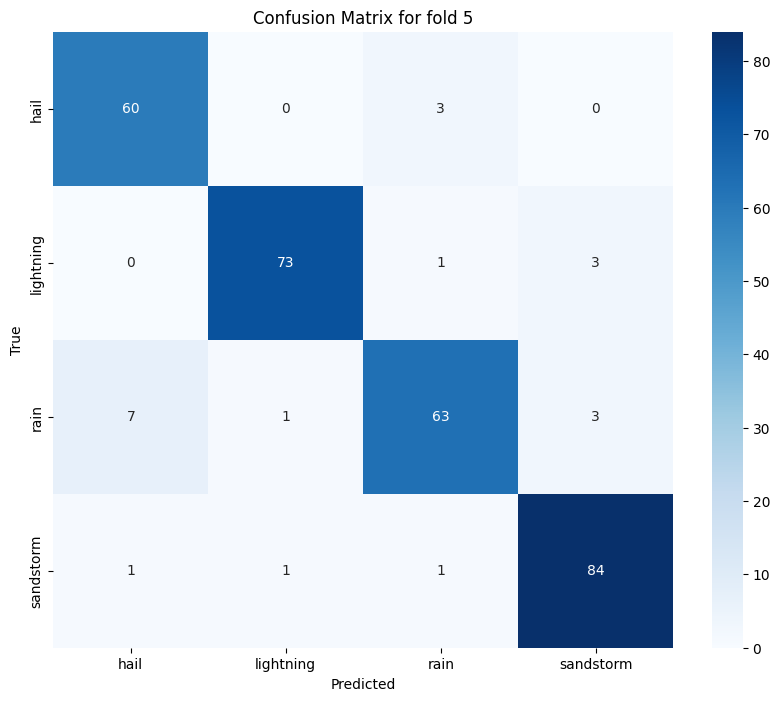

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure X and y have the same number of samples
X = all_images.reshape(-1, 256, 256, 3)
print(X.shape)
y = np.array([])


for i in range(len(cats)):
    list_of_labels = [i] * 377
    y = np.concatenate([y, list_of_labels])
print(y)
y = to_categorical(y, num_classes=len(cats))  # Convert labels to categorical format


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
fold_no = 1
for train_index, test_index in kf.split(X):
    # Re-initialize the model at the start of each fold
    model = build_four_layer_cnn_model_1()  # Define this function to build and compile your model
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Create an instance of the ImageDataGenerator with data augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Fit the data generator on the training data
    datagen.fit(X_train)
    
    # Create an augmented data generator
    augmented_data_gen = datagen.flow(X_train, y_train, batch_size=32)
    
    # Train the model
    history = model.fit(augmented_data_gen, epochs=100, validation_data=(X_val, y_val))
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy for fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss for fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test accuracy for fold {fold_no}: {test_accuracy}')
    print(f'Test loss for fold {fold_no}: {test_loss}')
    # Measure other evaluation metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Print classification report
    print(f'Classification Report for fold {fold_no}:')
    print(classification_report(y_true_classes, y_pred_classes, target_names=cats))
    
    # Print confusion matrix
    # print(f'Confusion Matrix for fold {fold_no}:')
    # print(confusion_matrix(y_true_classes, y_pred_classes))
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cats, yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for fold {fold_no}')
    plt.show()
    
        
    
    fold_no += 1
    # Clear the TensorFlow session and reset the default graph to empty VRAM
    del history
    K.clear_session()
    tf.compat.v1.reset_default_graph()
    gc.collect()
    


# Four Layer CNN 2

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_four_layer_cnn_model_2():
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Second convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Third convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Fourth convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(len(cats), activation='softmax'))  # Update the output layer to match the number of categories
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

four_layer_cnn_model_2 = build_four_layer_cnn_model_2()
# Print the model summary
four_layer_cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

(1508, 256, 256, 3)
[0. 0. 0. ... 3. 3. 3.]
Epoch 1/100
31/31 [==============================] - 15s 224ms/step - loss: 1.4220 - accuracy: 0.4575 - val_loss: 0.8149 - val_accuracy: 0.5744
Epoch 2/100
31/31 [==============================] - 6s 191ms/step - loss: 0.7830 - accuracy: 0.6577 - val_loss: 0.7416 - val_accuracy: 0.6446
Epoch 3/100
31/31 [==============================] - 6s 193ms/step - loss: 0.7186 - accuracy: 0.7168 - val_loss: 0.5943 - val_accuracy: 0.7851
Epoch 4/100
31/31 [==============================] - 6s 186ms/step - loss: 0.6318 - accuracy: 0.7676 - val_loss: 0.5514 - val_accuracy: 0.7645
Epoch 5/100
31/31 [==============================] - 6s 184ms/step - loss: 0.5852 - accuracy: 0.7552 - val_loss: 0.4417 - val_accuracy: 0.8471
Epoch 6/100
31/31 [==============================] - 6s 180ms/step - loss: 0.5395 - accuracy: 0.7853 - val_loss: 0.4633 - val_accuracy: 0.8306
Epoch 7/100
31/31 [==============================] - 6s 180ms/step - loss: 0.5267 - accuracy: 0.7

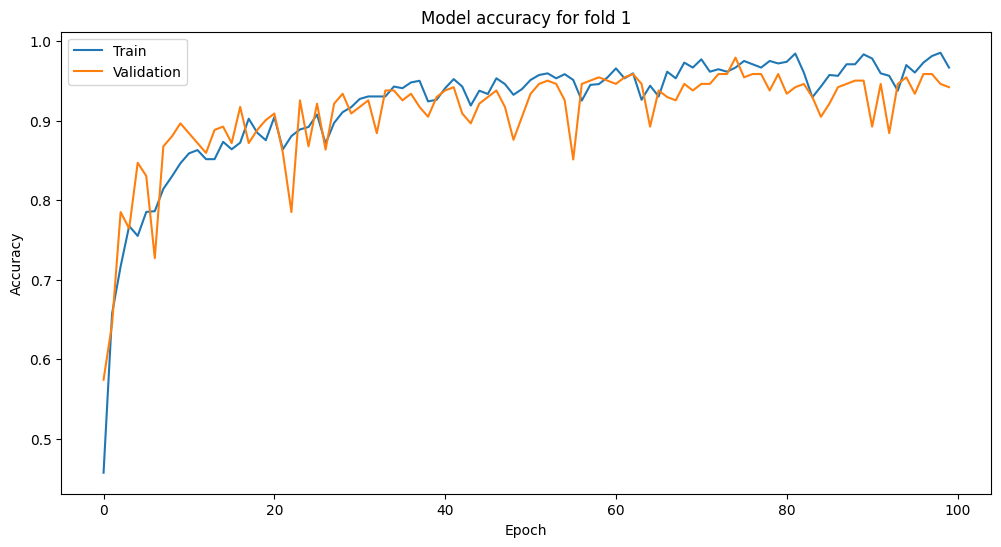

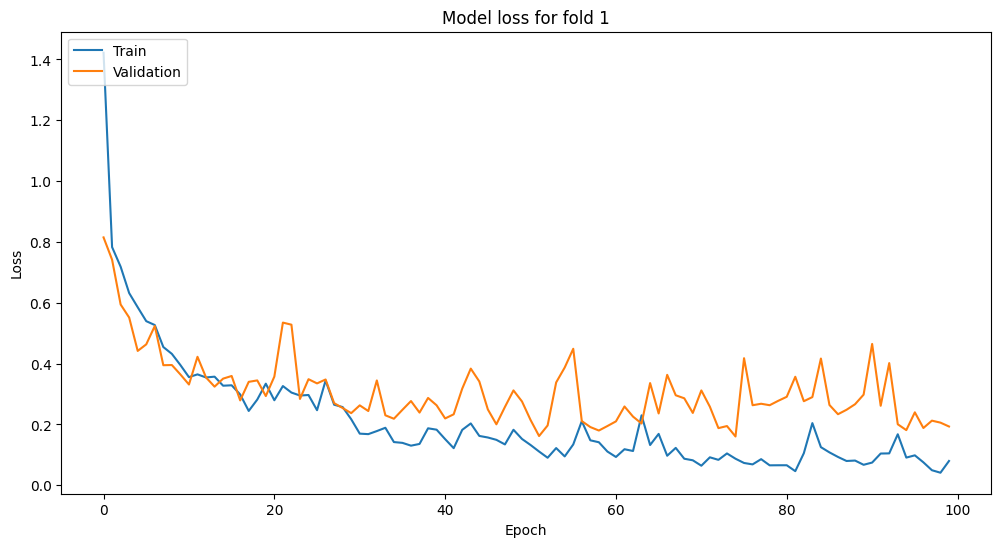

10/10 [==============================] - 1s 53ms/step - loss: 0.1821 - accuracy: 0.9437
Test accuracy for fold 1: 0.943708598613739
Test loss for fold 1: 0.18205268681049347
10/10 [==============================] - 0s 21ms/step
Classification Report for fold 1:
              precision    recall  f1-score   support

        hail       0.91      0.95      0.93        75
   lightning       0.97      1.00      0.99        73
        rain       0.92      0.90      0.91        79
   sandstorm       0.97      0.93      0.95        75

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



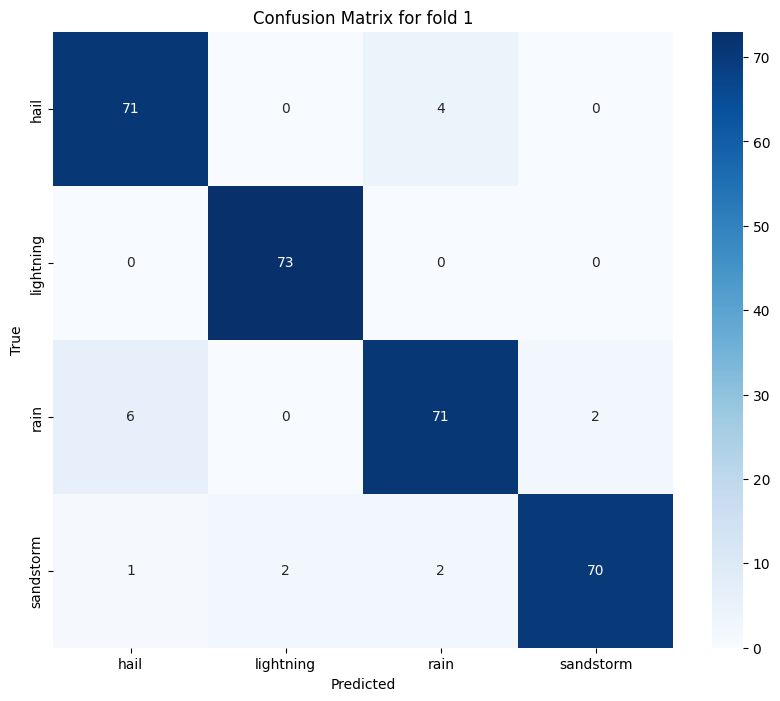

Epoch 1/100
31/31 [==============================] - 7s 192ms/step - loss: 1.4141 - accuracy: 0.4699 - val_loss: 0.7593 - val_accuracy: 0.6736
Epoch 2/100
31/31 [==============================] - 6s 191ms/step - loss: 0.6910 - accuracy: 0.7261 - val_loss: 0.6274 - val_accuracy: 0.7355
Epoch 3/100
31/31 [==============================] - 6s 190ms/step - loss: 0.6862 - accuracy: 0.6909 - val_loss: 0.6537 - val_accuracy: 0.7686
Epoch 4/100
31/31 [==============================] - 6s 194ms/step - loss: 0.6073 - accuracy: 0.7407 - val_loss: 0.5857 - val_accuracy: 0.7355
Epoch 5/100
31/31 [==============================] - 6s 187ms/step - loss: 0.4911 - accuracy: 0.8008 - val_loss: 0.5601 - val_accuracy: 0.7521
Epoch 6/100
31/31 [==============================] - 6s 190ms/step - loss: 0.5933 - accuracy: 0.7728 - val_loss: 0.6400 - val_accuracy: 0.7603
Epoch 7/100
31/31 [==============================] - 6s 190ms/step - loss: 0.4964 - accuracy: 0.8081 - val_loss: 0.5059 - val_accuracy: 0.7975

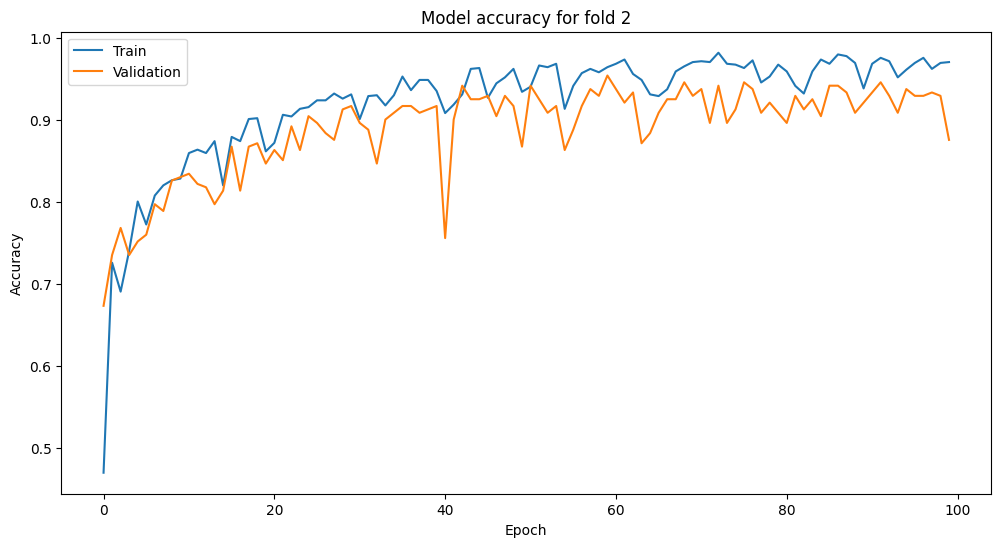

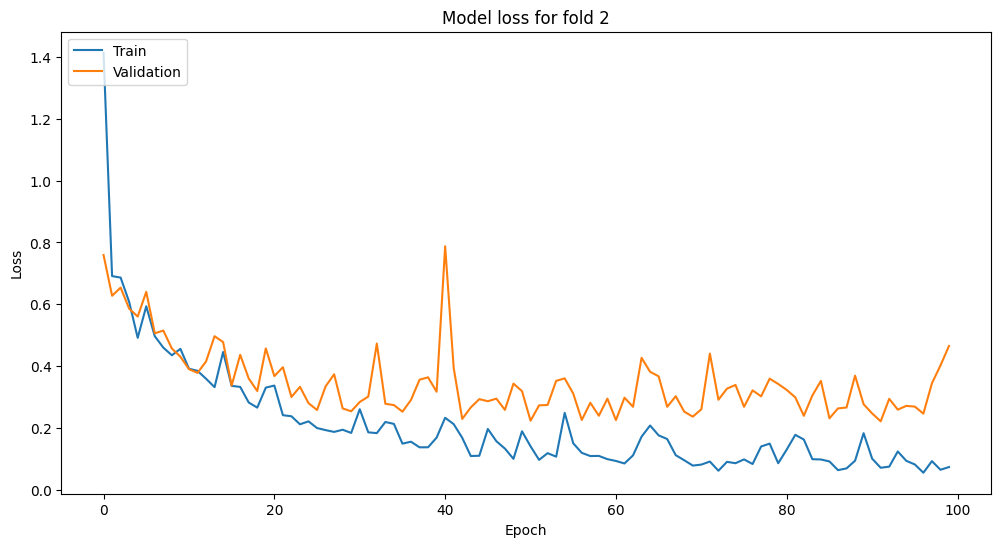

10/10 [==============================] - 0s 21ms/step - loss: 0.3537 - accuracy: 0.8808
Test accuracy for fold 2: 0.8807947039604187
Test loss for fold 2: 0.35366374254226685
10/10 [==============================] - 0s 21ms/step
Classification Report for fold 2:
              precision    recall  f1-score   support

        hail       0.88      0.96      0.92        73
   lightning       1.00      0.83      0.91        77
        rain       0.70      0.87      0.78        71
   sandstorm       1.00      0.86      0.93        81

    accuracy                           0.88       302
   macro avg       0.89      0.88      0.88       302
weighted avg       0.90      0.88      0.88       302



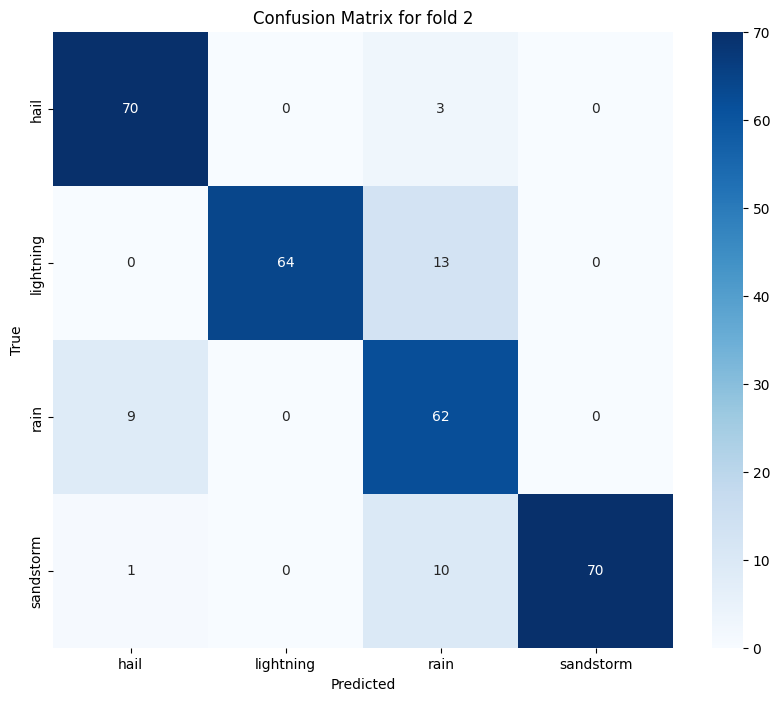

Epoch 1/100
31/31 [==============================] - 6s 191ms/step - loss: 1.3736 - accuracy: 0.4886 - val_loss: 0.6954 - val_accuracy: 0.6818
Epoch 2/100
31/31 [==============================] - 6s 189ms/step - loss: 0.7218 - accuracy: 0.6857 - val_loss: 0.5717 - val_accuracy: 0.7769
Epoch 3/100
31/31 [==============================] - 6s 188ms/step - loss: 0.6527 - accuracy: 0.7127 - val_loss: 0.5960 - val_accuracy: 0.7397
Epoch 4/100
31/31 [==============================] - 6s 189ms/step - loss: 0.6626 - accuracy: 0.7085 - val_loss: 0.4968 - val_accuracy: 0.8099
Epoch 5/100
31/31 [==============================] - 6s 195ms/step - loss: 0.5610 - accuracy: 0.7656 - val_loss: 0.5284 - val_accuracy: 0.7769
Epoch 6/100
31/31 [==============================] - 6s 189ms/step - loss: 0.5097 - accuracy: 0.7790 - val_loss: 0.7582 - val_accuracy: 0.6818
Epoch 7/100
31/31 [==============================] - 6s 188ms/step - loss: 0.5145 - accuracy: 0.7718 - val_loss: 0.3664 - val_accuracy: 0.8595

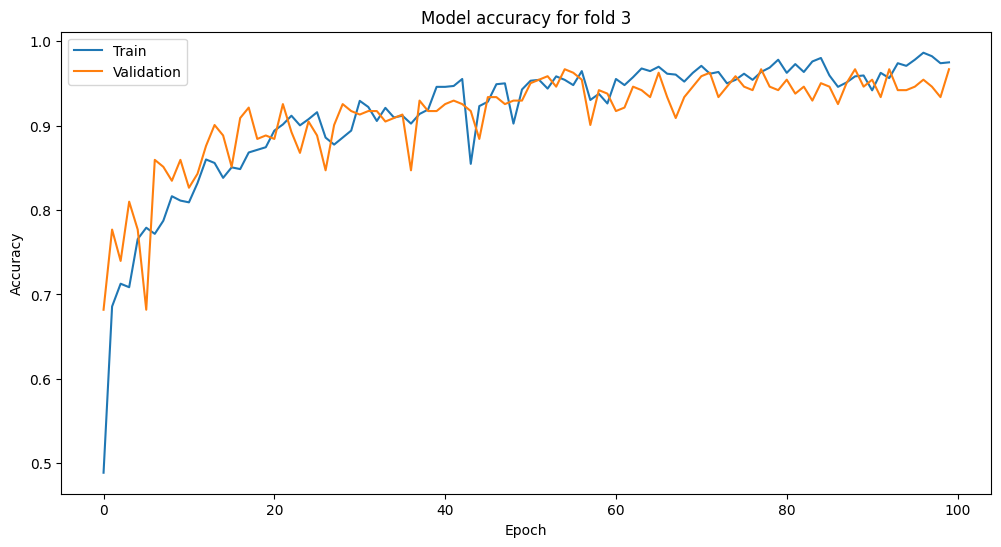

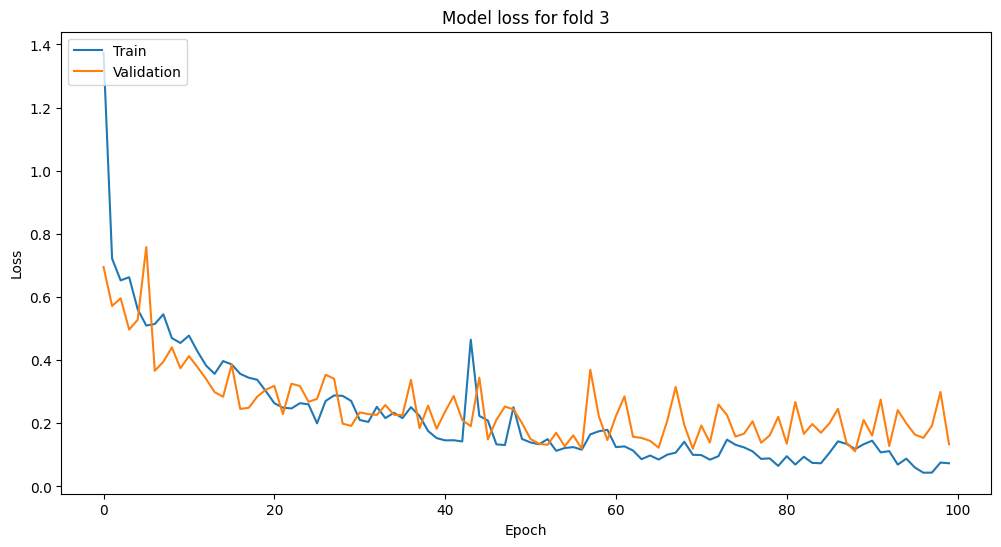

10/10 [==============================] - 0s 21ms/step - loss: 0.2956 - accuracy: 0.9238
Test accuracy for fold 3: 0.9238410592079163
Test loss for fold 3: 0.2955813407897949
10/10 [==============================] - 0s 21ms/step
Classification Report for fold 3:
              precision    recall  f1-score   support

        hail       0.93      0.95      0.94        86
   lightning       0.86      1.00      0.92        72
        rain       0.94      0.85      0.89        74
   sandstorm       0.98      0.89      0.93        70

    accuracy                           0.92       302
   macro avg       0.93      0.92      0.92       302
weighted avg       0.93      0.92      0.92       302



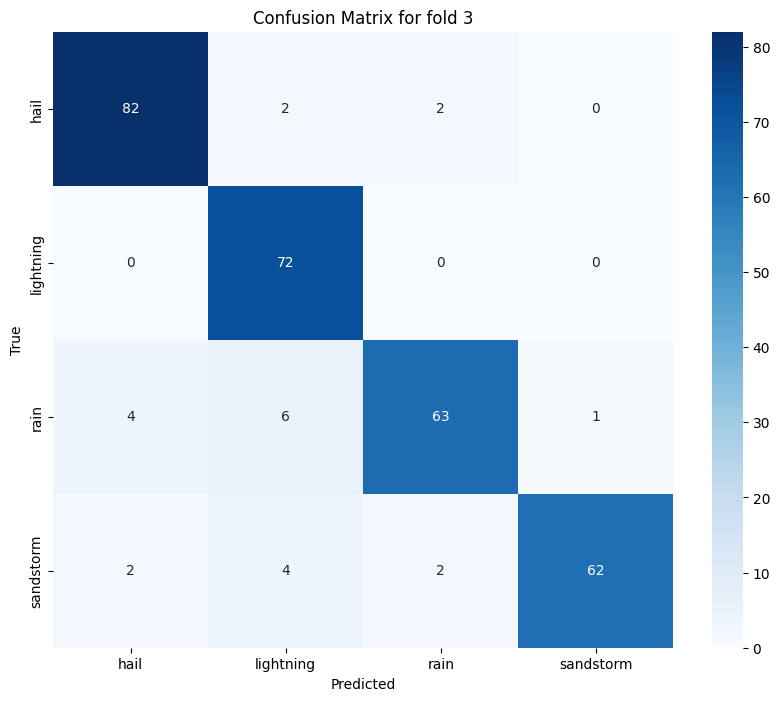

Epoch 1/100
31/31 [==============================] - 7s 199ms/step - loss: 1.2105 - accuracy: 0.5326 - val_loss: 0.6568 - val_accuracy: 0.7231
Epoch 2/100
31/31 [==============================] - 6s 191ms/step - loss: 0.7187 - accuracy: 0.6891 - val_loss: 0.8541 - val_accuracy: 0.6322
Epoch 3/100
31/31 [==============================] - 6s 190ms/step - loss: 0.6203 - accuracy: 0.7658 - val_loss: 0.6864 - val_accuracy: 0.7438
Epoch 4/100
31/31 [==============================] - 6s 190ms/step - loss: 0.5883 - accuracy: 0.7637 - val_loss: 0.5944 - val_accuracy: 0.8058
Epoch 5/100
31/31 [==============================] - 6s 189ms/step - loss: 0.4954 - accuracy: 0.7938 - val_loss: 0.4411 - val_accuracy: 0.7975
Epoch 6/100
31/31 [==============================] - 6s 190ms/step - loss: 0.4583 - accuracy: 0.8197 - val_loss: 0.5359 - val_accuracy: 0.7645
Epoch 7/100
31/31 [==============================] - 6s 190ms/step - loss: 0.4506 - accuracy: 0.8373 - val_loss: 0.5572 - val_accuracy: 0.7603

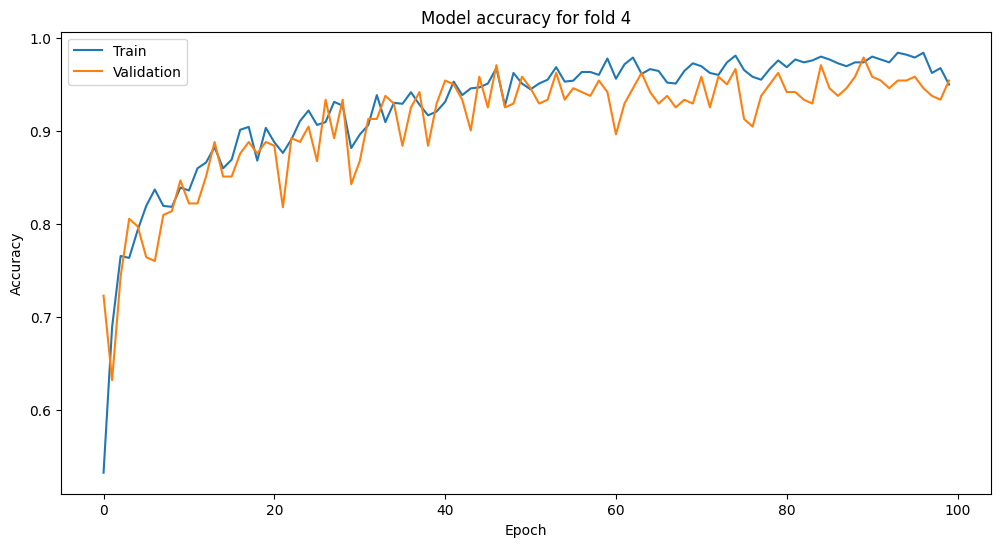

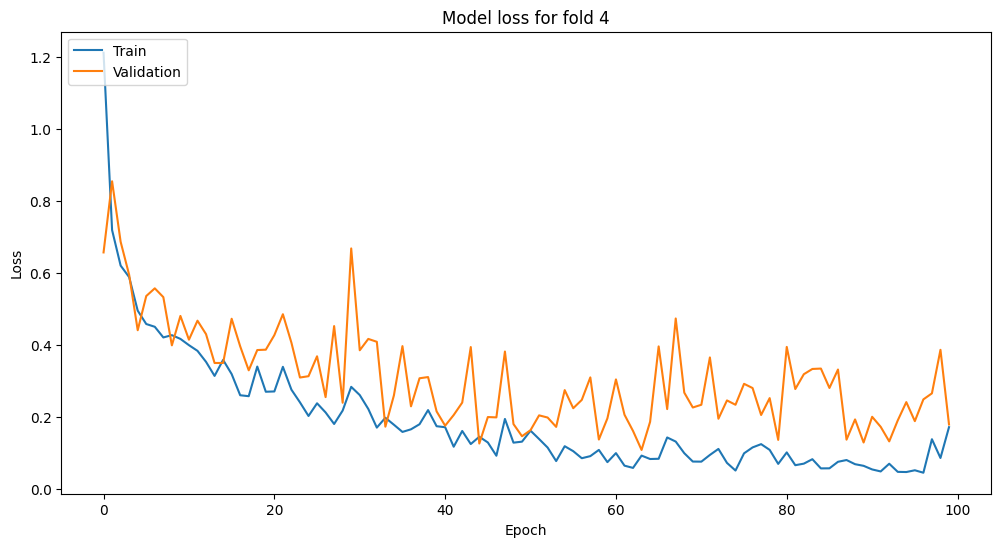

10/10 [==============================] - 1s 51ms/step - loss: 0.2742 - accuracy: 0.9336
Test accuracy for fold 4: 0.9335548281669617
Test loss for fold 4: 0.2742280066013336
10/10 [==============================] - 0s 21ms/step
Classification Report for fold 4:
              precision    recall  f1-score   support

        hail       0.90      0.90      0.90        80
   lightning       0.96      1.00      0.98        78
        rain       0.90      0.89      0.89        79
   sandstorm       0.98      0.95      0.97        64

    accuracy                           0.93       301
   macro avg       0.94      0.93      0.94       301
weighted avg       0.93      0.93      0.93       301



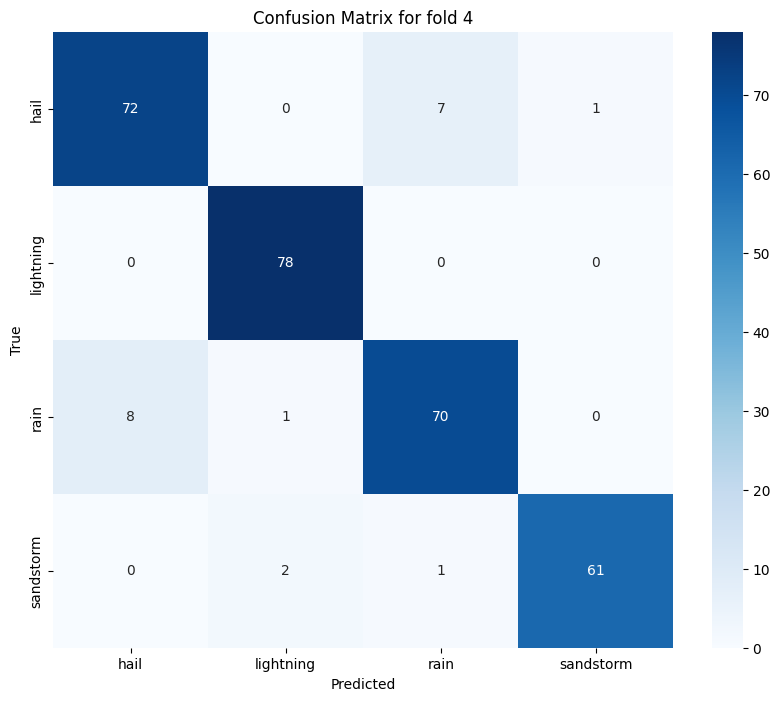

Epoch 1/100
31/31 [==============================] - 7s 195ms/step - loss: 1.3124 - accuracy: 0.4653 - val_loss: 0.8235 - val_accuracy: 0.6281
Epoch 2/100
31/31 [==============================] - 6s 192ms/step - loss: 0.8473 - accuracy: 0.6290 - val_loss: 0.6220 - val_accuracy: 0.7314
Epoch 3/100
31/31 [==============================] - 6s 191ms/step - loss: 0.6642 - accuracy: 0.7368 - val_loss: 0.4673 - val_accuracy: 0.8306
Epoch 4/100
31/31 [==============================] - 6s 189ms/step - loss: 0.6284 - accuracy: 0.7503 - val_loss: 0.5292 - val_accuracy: 0.8140
Epoch 5/100
31/31 [==============================] - 6s 192ms/step - loss: 0.5366 - accuracy: 0.7886 - val_loss: 0.4094 - val_accuracy: 0.8595
Epoch 6/100
31/31 [==============================] - 6s 191ms/step - loss: 0.4791 - accuracy: 0.8062 - val_loss: 0.4028 - val_accuracy: 0.8595
Epoch 7/100
31/31 [==============================] - 6s 191ms/step - loss: 0.4640 - accuracy: 0.8166 - val_loss: 0.3789 - val_accuracy: 0.8595

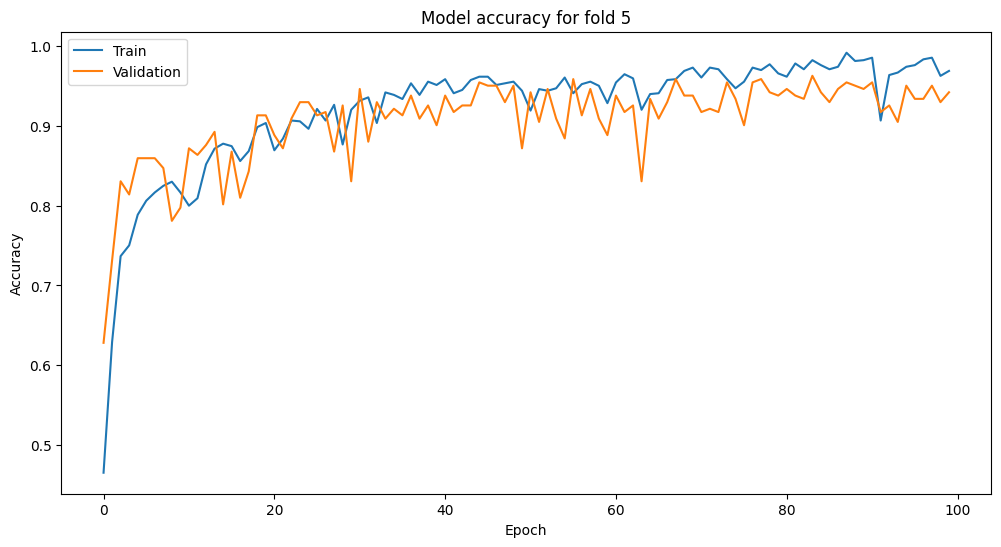

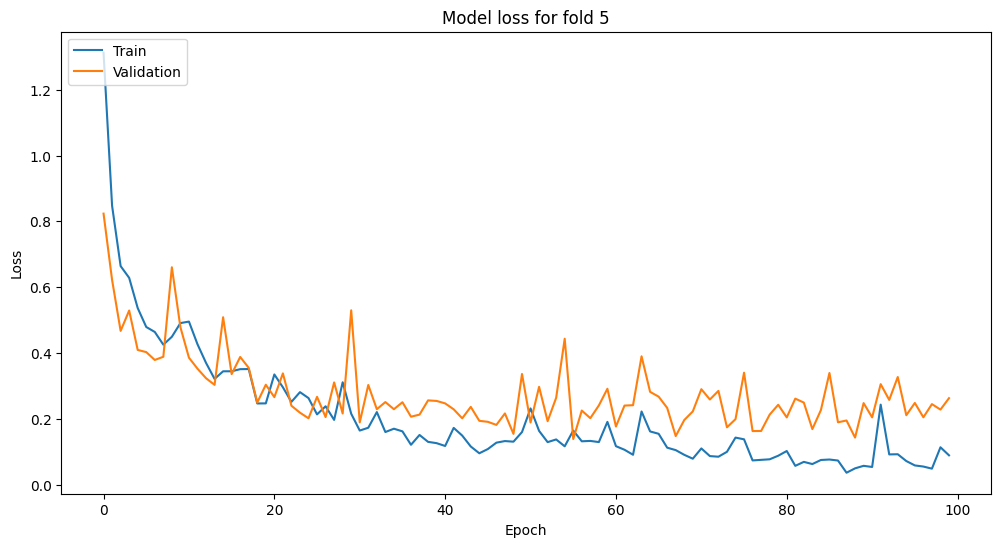

10/10 [==============================] - 0s 21ms/step - loss: 0.1599 - accuracy: 0.9236
Test accuracy for fold 5: 0.9235880374908447
Test loss for fold 5: 0.15989269316196442
10/10 [==============================] - 0s 21ms/step
Classification Report for fold 5:
              precision    recall  f1-score   support

        hail       0.90      0.95      0.92        63
   lightning       1.00      0.91      0.95        77
        rain       0.84      0.88      0.86        74
   sandstorm       0.95      0.95      0.95        87

    accuracy                           0.92       301
   macro avg       0.92      0.92      0.92       301
weighted avg       0.93      0.92      0.92       301



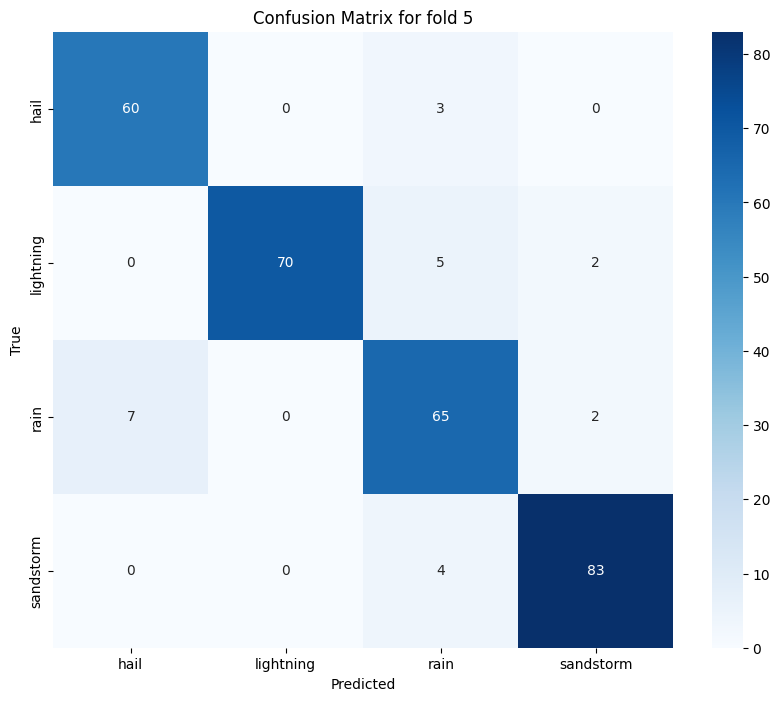

In [5]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure X and y have the same number of samples
X = all_images.reshape(-1, 256, 256, 3)
print(X.shape)
y = np.array([])


for i in range(len(cats)):
    list_of_labels = [i] * 377
    y = np.concatenate([y, list_of_labels])
print(y)
y = to_categorical(y, num_classes=len(cats))  # Convert labels to categorical format


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
fold_no = 1
for train_index, test_index in kf.split(X):
    # Re-initialize the model at the start of each fold
    model = build_four_layer_cnn_model_2()  # Define this function to build and compile your model
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Create an instance of the ImageDataGenerator with data augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Fit the data generator on the training data
    datagen.fit(X_train)
    
    # Create an augmented data generator
    augmented_data_gen = datagen.flow(X_train, y_train, batch_size=32)
    
    # Train the model
    history = model.fit(augmented_data_gen, epochs=100, validation_data=(X_val, y_val))
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy for fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss for fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test accuracy for fold {fold_no}: {test_accuracy}')
    print(f'Test loss for fold {fold_no}: {test_loss}')
    # Measure other evaluation metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Print classification report
    print(f'Classification Report for fold {fold_no}:')
    print(classification_report(y_true_classes, y_pred_classes, target_names=cats))
    
    # Print confusion matrix
    # print(f'Confusion Matrix for fold {fold_no}:')
    # print(confusion_matrix(y_true_classes, y_pred_classes))
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cats, yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for fold {fold_no}')
    plt.show()
    
        
    
    fold_no += 1
    # Clear the TensorFlow session and reset the default graph to empty VRAM
    del history
    K.clear_session()
    tf.compat.v1.reset_default_graph()
    gc.collect()
    


# Three Layer CNN 1

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_three_layer_cnn_model_1():
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(len(cats), activation='softmax'))  # Update the output layer to match the number of categories
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

three_layer_cnn_model_1 = build_three_layer_cnn_model_1()
# Print the model summary
three_layer_cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                      

(1508, 256, 256, 3)
[0. 0. 0. ... 3. 3. 3.]
Epoch 1/100
31/31 [==============================] - 11s 195ms/step - loss: 1.0837 - accuracy: 0.5104 - val_loss: 0.7639 - val_accuracy: 0.6736
Epoch 2/100
31/31 [==============================] - 6s 181ms/step - loss: 0.6799 - accuracy: 0.7075 - val_loss: 0.4970 - val_accuracy: 0.8347
Epoch 3/100
31/31 [==============================] - 6s 182ms/step - loss: 0.5984 - accuracy: 0.7624 - val_loss: 0.5318 - val_accuracy: 0.7893
Epoch 4/100
31/31 [==============================] - 6s 187ms/step - loss: 0.5706 - accuracy: 0.7562 - val_loss: 0.7886 - val_accuracy: 0.7397
Epoch 5/100
31/31 [==============================] - 6s 185ms/step - loss: 0.5349 - accuracy: 0.7915 - val_loss: 0.6190 - val_accuracy: 0.7645
Epoch 6/100
31/31 [==============================] - 6s 185ms/step - loss: 0.5339 - accuracy: 0.7842 - val_loss: 0.4169 - val_accuracy: 0.8678
Epoch 7/100
31/31 [==============================] - 6s 185ms/step - loss: 0.4345 - accuracy: 0.8

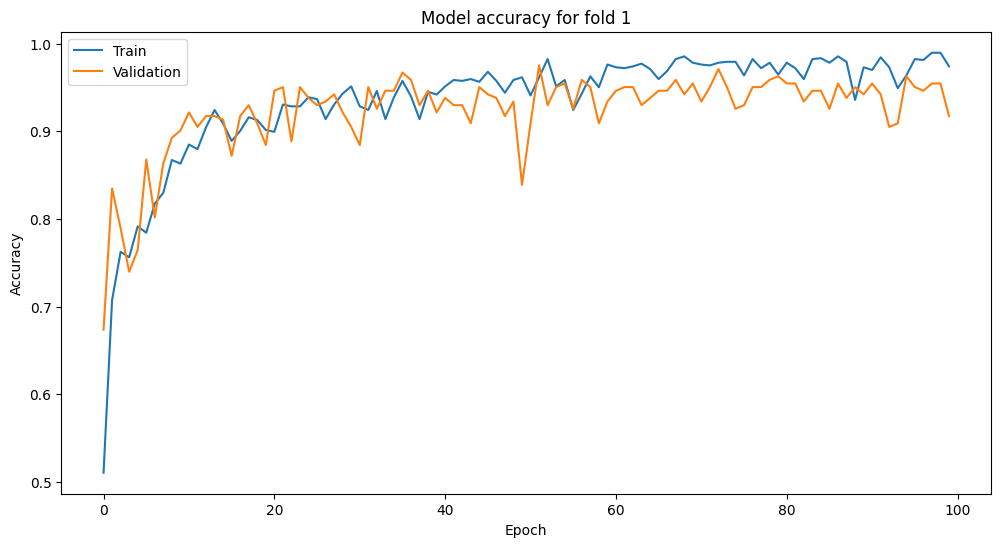

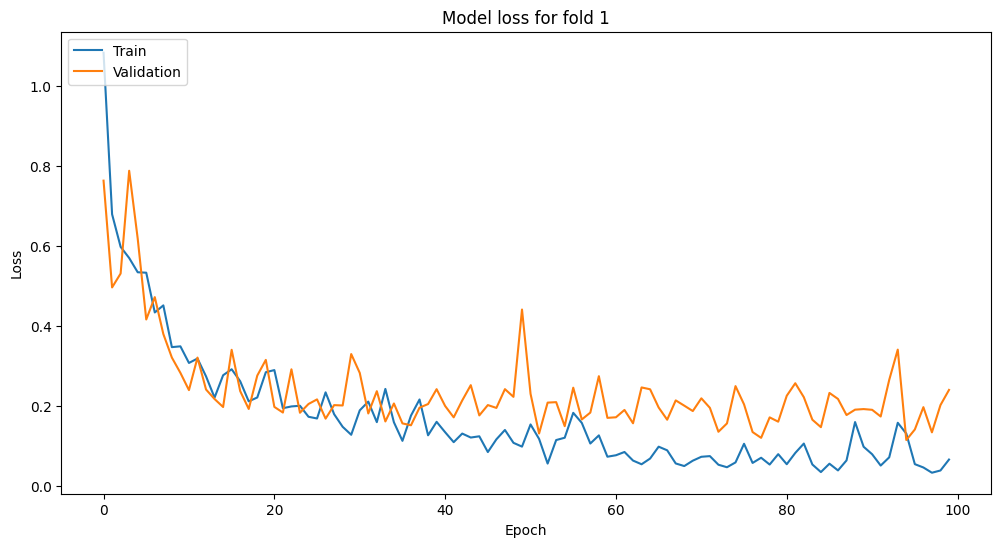

10/10 [==============================] - 0s 40ms/step - loss: 0.3150 - accuracy: 0.9338
Test accuracy for fold 1: 0.9337748289108276
Test loss for fold 1: 0.31496796011924744
10/10 [==============================] - 0s 20ms/step
Classification Report for fold 1:
              precision    recall  f1-score   support

        hail       0.97      0.84      0.90        75
   lightning       0.97      1.00      0.99        73
        rain       0.84      0.94      0.89        79
   sandstorm       0.97      0.96      0.97        75

    accuracy                           0.93       302
   macro avg       0.94      0.93      0.93       302
weighted avg       0.94      0.93      0.93       302



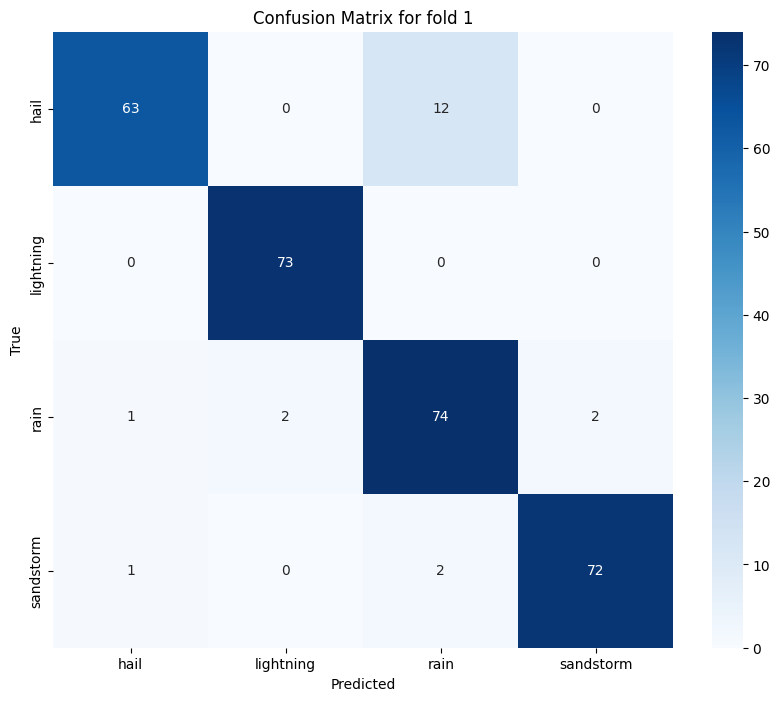

Epoch 1/100
31/31 [==============================] - 6s 184ms/step - loss: 0.9734 - accuracy: 0.5861 - val_loss: 0.8458 - val_accuracy: 0.5868
Epoch 2/100
31/31 [==============================] - 6s 180ms/step - loss: 0.7153 - accuracy: 0.7002 - val_loss: 0.6754 - val_accuracy: 0.6860
Epoch 3/100
31/31 [==============================] - 6s 180ms/step - loss: 0.5976 - accuracy: 0.7510 - val_loss: 0.6244 - val_accuracy: 0.7273
Epoch 4/100
31/31 [==============================] - 6s 179ms/step - loss: 0.5548 - accuracy: 0.7500 - val_loss: 0.4903 - val_accuracy: 0.8058
Epoch 5/100
31/31 [==============================] - 6s 180ms/step - loss: 0.4848 - accuracy: 0.8112 - val_loss: 0.3713 - val_accuracy: 0.8347
Epoch 6/100
31/31 [==============================] - 6s 179ms/step - loss: 0.4170 - accuracy: 0.8361 - val_loss: 0.4384 - val_accuracy: 0.8099
Epoch 7/100
31/31 [==============================] - 6s 181ms/step - loss: 0.4844 - accuracy: 0.8081 - val_loss: 0.4657 - val_accuracy: 0.7934

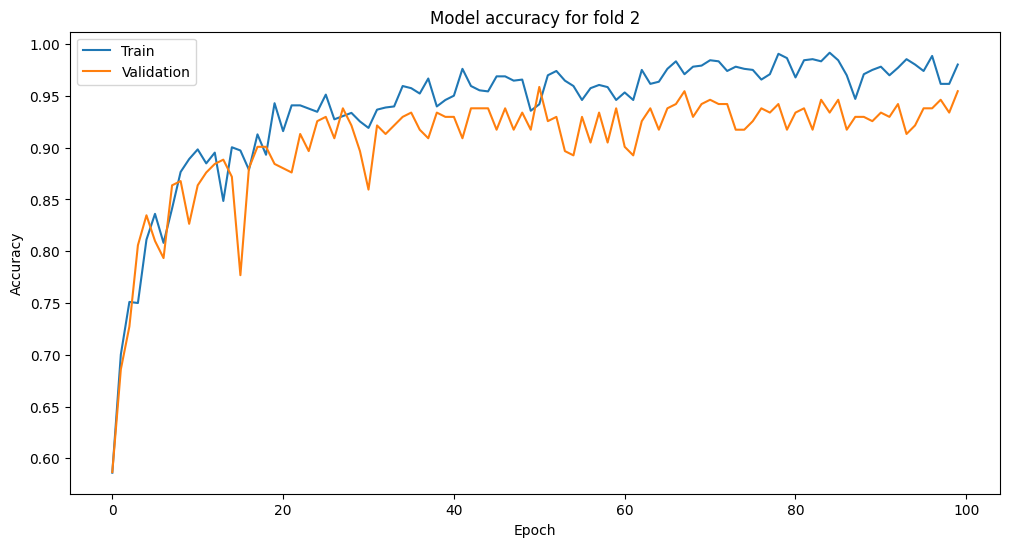

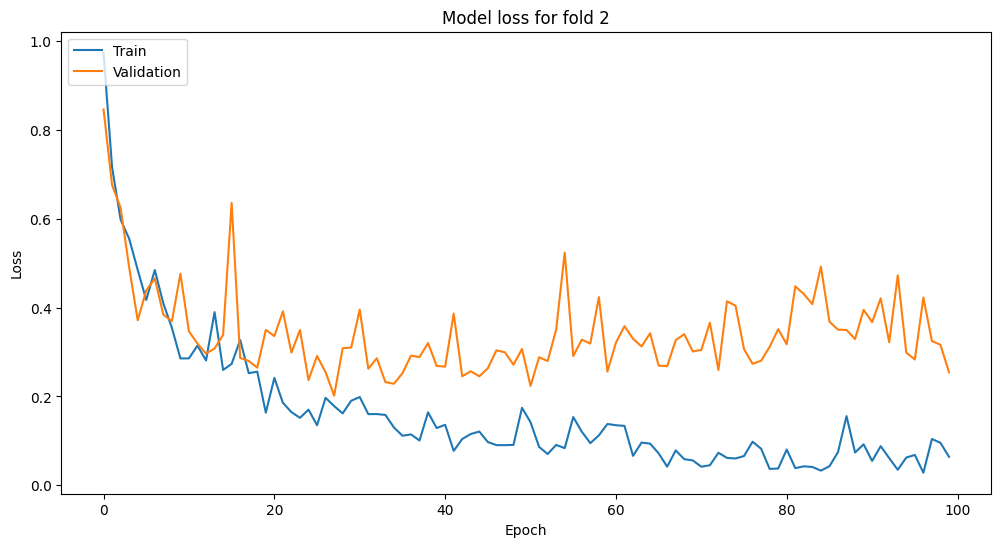

10/10 [==============================] - 0s 21ms/step - loss: 0.1348 - accuracy: 0.9470
Test accuracy for fold 2: 0.9470198750495911
Test loss for fold 2: 0.13484682142734528
10/10 [==============================] - 0s 20ms/step
Classification Report for fold 2:
              precision    recall  f1-score   support

        hail       0.92      0.92      0.92        73
   lightning       1.00      0.99      0.99        77
        rain       0.87      0.92      0.89        71
   sandstorm       1.00      0.96      0.98        81

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



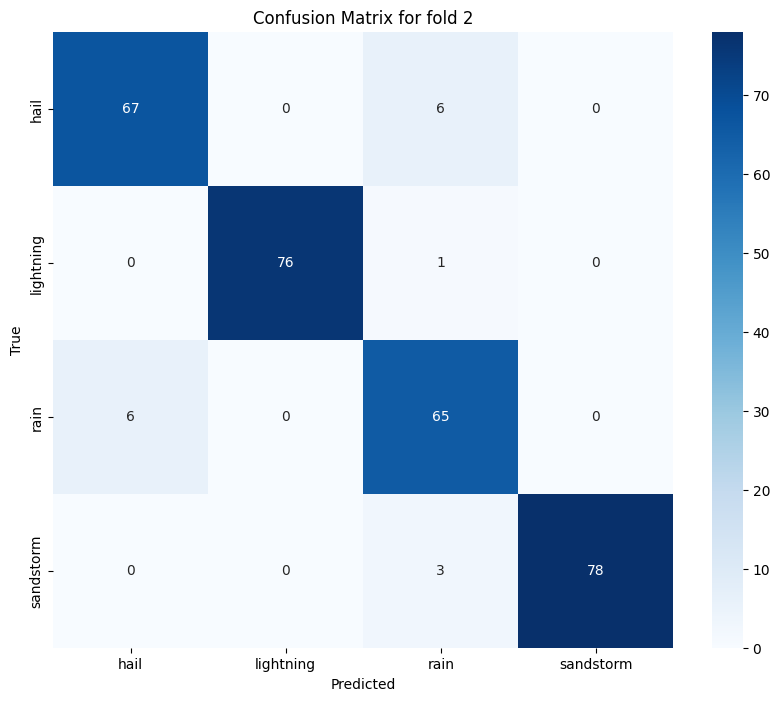

Epoch 1/100
31/31 [==============================] - 6s 186ms/step - loss: 1.0193 - accuracy: 0.5176 - val_loss: 0.6773 - val_accuracy: 0.7149
Epoch 2/100
31/31 [==============================] - 6s 183ms/step - loss: 0.6679 - accuracy: 0.7469 - val_loss: 0.4925 - val_accuracy: 0.7893
Epoch 3/100
31/31 [==============================] - 6s 183ms/step - loss: 0.6103 - accuracy: 0.7593 - val_loss: 0.4993 - val_accuracy: 0.7975
Epoch 4/100
31/31 [==============================] - 6s 182ms/step - loss: 0.5121 - accuracy: 0.7977 - val_loss: 0.3918 - val_accuracy: 0.8306
Epoch 5/100
31/31 [==============================] - 6s 183ms/step - loss: 0.5366 - accuracy: 0.7811 - val_loss: 0.5361 - val_accuracy: 0.7934
Epoch 6/100
31/31 [==============================] - 6s 183ms/step - loss: 0.4605 - accuracy: 0.8195 - val_loss: 0.3847 - val_accuracy: 0.8471
Epoch 7/100
31/31 [==============================] - 6s 184ms/step - loss: 0.3693 - accuracy: 0.8527 - val_loss: 0.3613 - val_accuracy: 0.8636

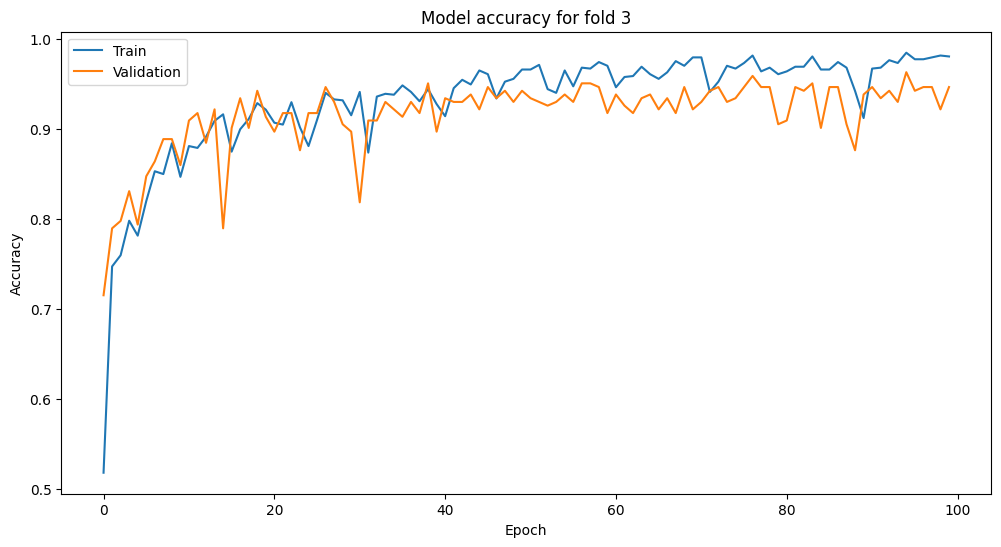

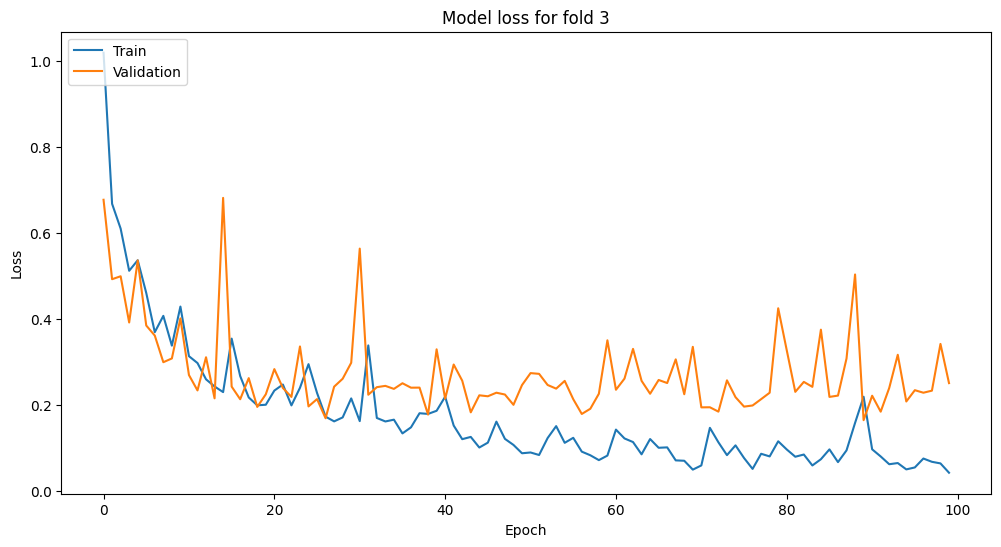

10/10 [==============================] - 0s 21ms/step - loss: 0.1950 - accuracy: 0.9404
Test accuracy for fold 3: 0.940397322177887
Test loss for fold 3: 0.19497403502464294
10/10 [==============================] - 0s 21ms/step
Classification Report for fold 3:
              precision    recall  f1-score   support

        hail       0.99      0.88      0.93        86
   lightning       0.95      0.99      0.97        72
        rain       0.86      0.92      0.89        74
   sandstorm       0.97      0.99      0.98        70

    accuracy                           0.94       302
   macro avg       0.94      0.94      0.94       302
weighted avg       0.94      0.94      0.94       302



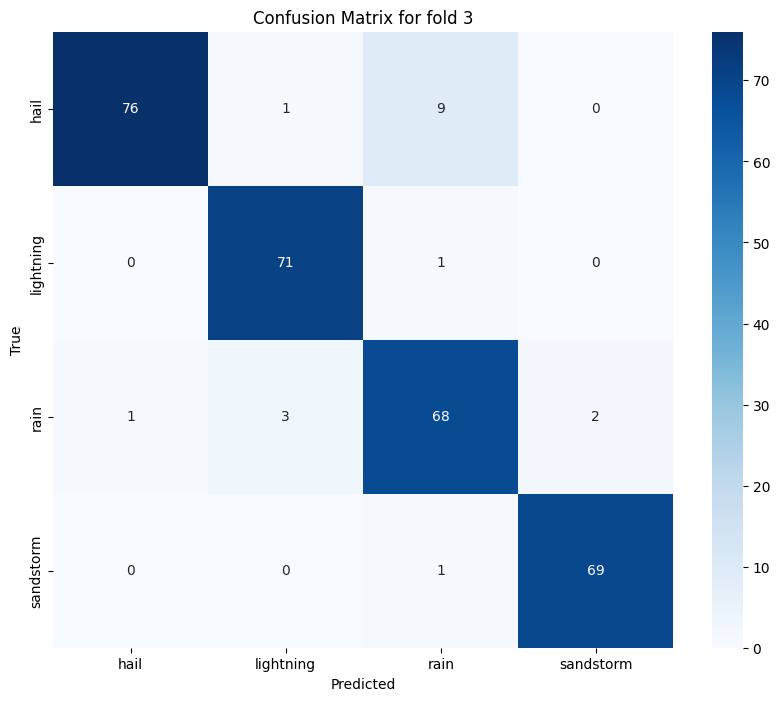

Epoch 1/100
31/31 [==============================] - 6s 191ms/step - loss: 1.0819 - accuracy: 0.5244 - val_loss: 0.8017 - val_accuracy: 0.6694
Epoch 2/100
31/31 [==============================] - 6s 181ms/step - loss: 0.7693 - accuracy: 0.6736 - val_loss: 0.7333 - val_accuracy: 0.6983
Epoch 3/100
31/31 [==============================] - 6s 182ms/step - loss: 0.6405 - accuracy: 0.7119 - val_loss: 0.5371 - val_accuracy: 0.8099
Epoch 4/100
31/31 [==============================] - 6s 183ms/step - loss: 0.5838 - accuracy: 0.7565 - val_loss: 0.5239 - val_accuracy: 0.7769
Epoch 5/100
31/31 [==============================] - 6s 182ms/step - loss: 0.4789 - accuracy: 0.8010 - val_loss: 0.5782 - val_accuracy: 0.7397
Epoch 6/100
31/31 [==============================] - 6s 182ms/step - loss: 0.4499 - accuracy: 0.8176 - val_loss: 0.4144 - val_accuracy: 0.8388
Epoch 7/100
31/31 [==============================] - 6s 184ms/step - loss: 0.4052 - accuracy: 0.8435 - val_loss: 0.3846 - val_accuracy: 0.8512

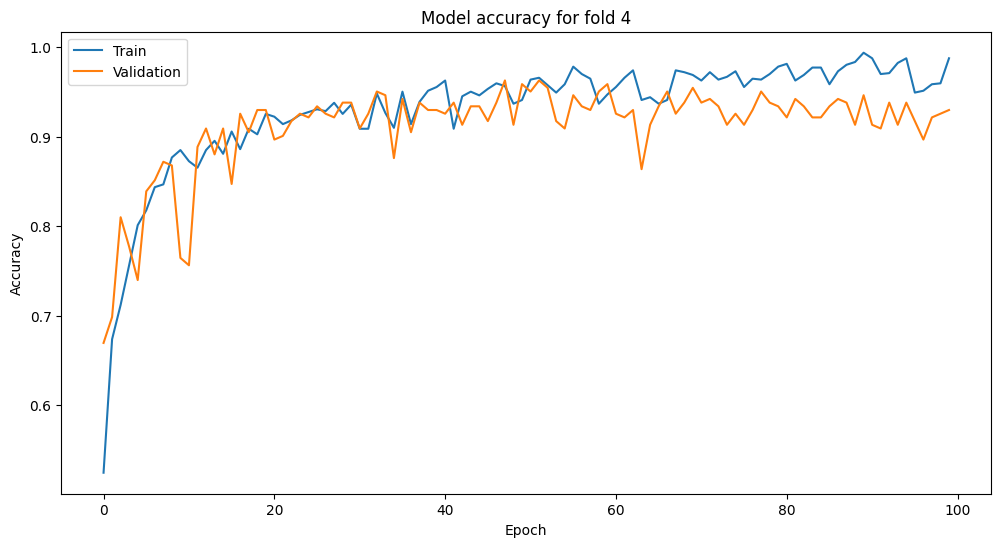

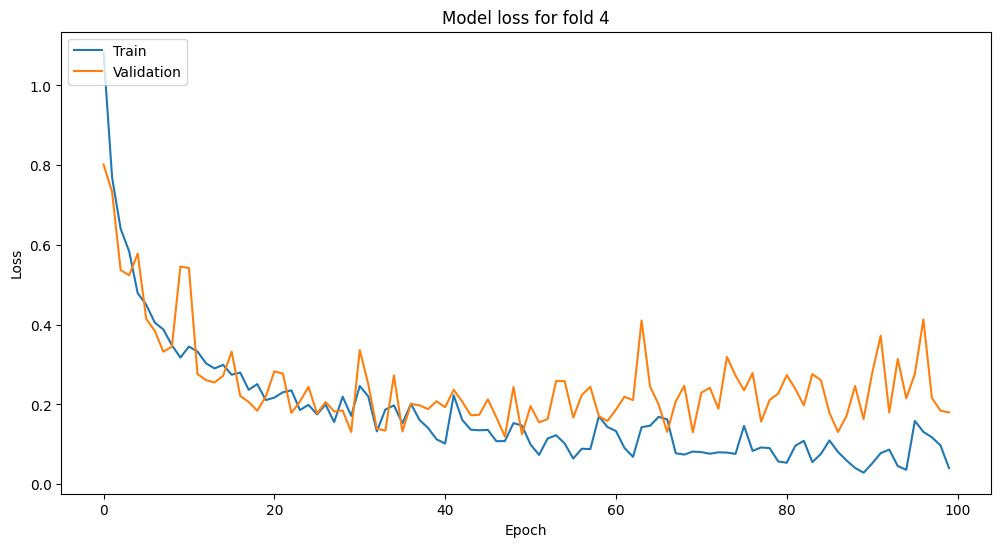

10/10 [==============================] - 0s 40ms/step - loss: 0.1728 - accuracy: 0.9435
Test accuracy for fold 4: 0.9435216188430786
Test loss for fold 4: 0.17284563183784485
10/10 [==============================] - 0s 21ms/step
Classification Report for fold 4:
              precision    recall  f1-score   support

        hail       0.94      0.95      0.94        80
   lightning       0.97      0.96      0.97        78
        rain       0.88      0.96      0.92        79
   sandstorm       1.00      0.89      0.94        64

    accuracy                           0.94       301
   macro avg       0.95      0.94      0.94       301
weighted avg       0.95      0.94      0.94       301



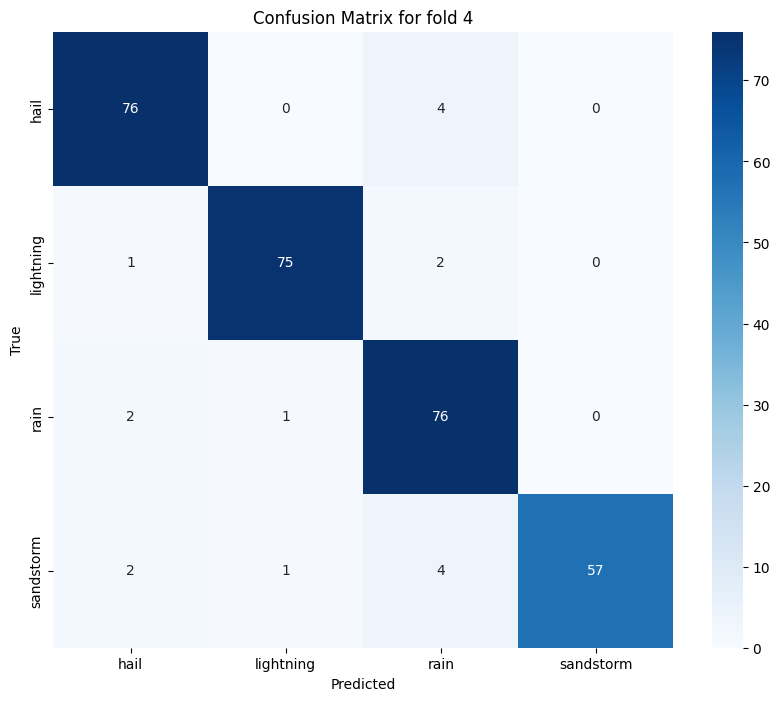

Epoch 1/100
31/31 [==============================] - 7s 203ms/step - loss: 1.1200 - accuracy: 0.4580 - val_loss: 0.7584 - val_accuracy: 0.6157
Epoch 2/100
31/31 [==============================] - 6s 199ms/step - loss: 0.6809 - accuracy: 0.7150 - val_loss: 0.4330 - val_accuracy: 0.8388
Epoch 3/100
31/31 [==============================] - 6s 200ms/step - loss: 0.5602 - accuracy: 0.7782 - val_loss: 0.4767 - val_accuracy: 0.7893
Epoch 4/100
31/31 [==============================] - 7s 211ms/step - loss: 0.5495 - accuracy: 0.7689 - val_loss: 0.4852 - val_accuracy: 0.7851
Epoch 5/100
31/31 [==============================] - 6s 202ms/step - loss: 0.4328 - accuracy: 0.8228 - val_loss: 0.3214 - val_accuracy: 0.8843
Epoch 6/100
31/31 [==============================] - 6s 205ms/step - loss: 0.4095 - accuracy: 0.8176 - val_loss: 0.3455 - val_accuracy: 0.8347
Epoch 7/100
31/31 [==============================] - 6s 199ms/step - loss: 0.4483 - accuracy: 0.8166 - val_loss: 0.4158 - val_accuracy: 0.8678

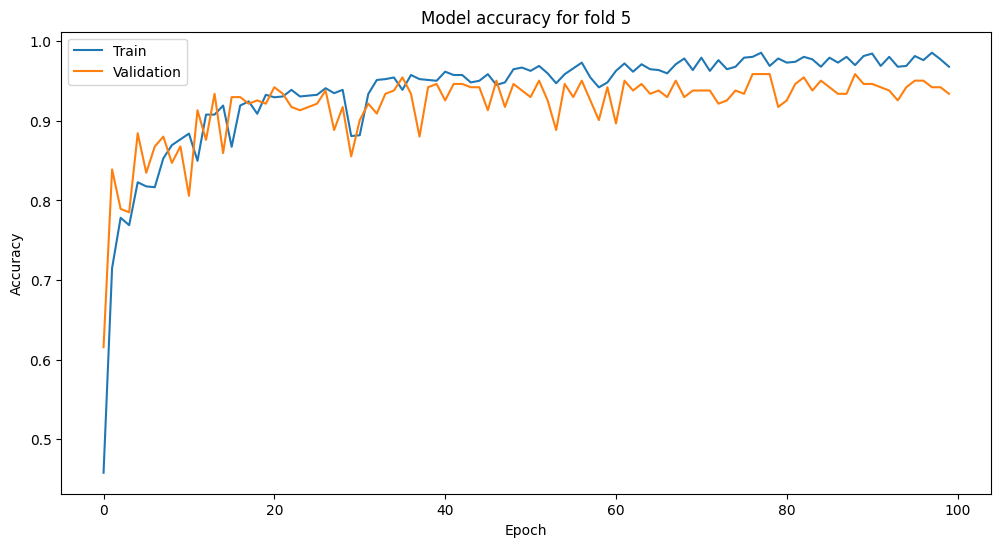

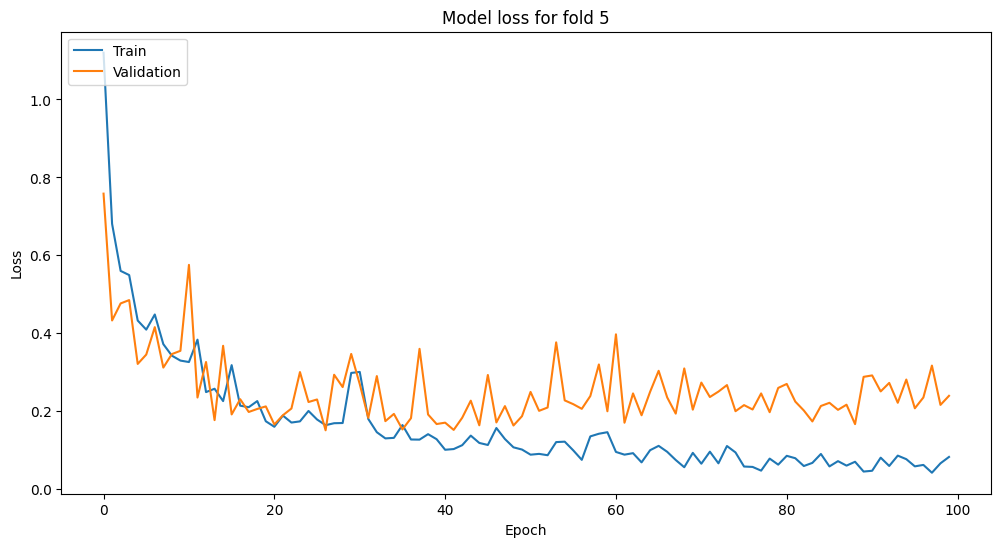

10/10 [==============================] - 0s 21ms/step - loss: 0.2140 - accuracy: 0.9402
Test accuracy for fold 5: 0.9401993155479431
Test loss for fold 5: 0.21401651203632355
10/10 [==============================] - 0s 20ms/step
Classification Report for fold 5:
              precision    recall  f1-score   support

        hail       0.86      0.98      0.92        63
   lightning       0.99      1.00      0.99        77
        rain       0.97      0.80      0.87        74
   sandstorm       0.94      0.98      0.96        87

    accuracy                           0.94       301
   macro avg       0.94      0.94      0.94       301
weighted avg       0.94      0.94      0.94       301



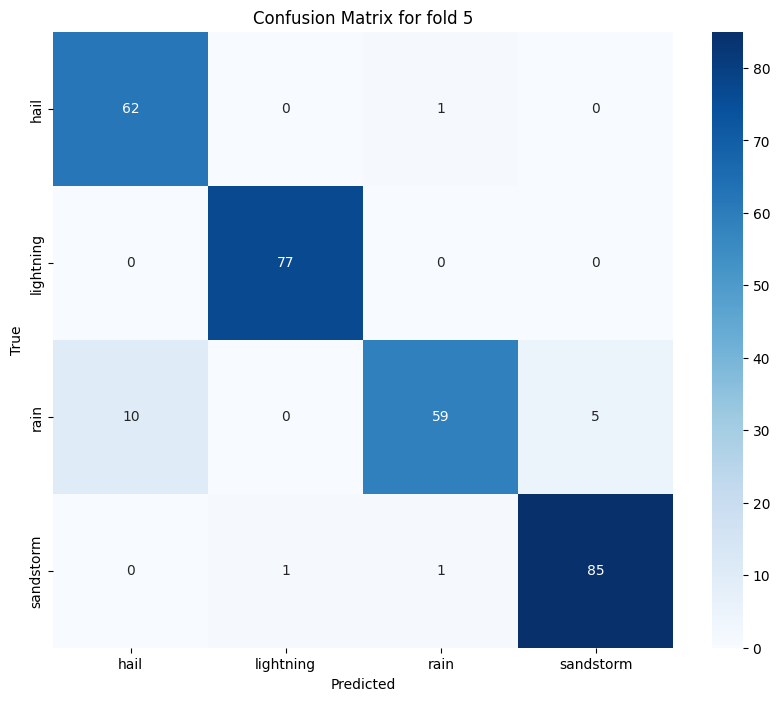

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure X and y have the same number of samples
X = all_images.reshape(-1, 256, 256, 3)
print(X.shape)
y = np.array([])


for i in range(len(cats)):
    list_of_labels = [i] * 377
    y = np.concatenate([y, list_of_labels])
print(y)
y = to_categorical(y, num_classes=len(cats))  # Convert labels to categorical format


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
fold_no = 1
for train_index, test_index in kf.split(X):
    # Re-initialize the model at the start of each fold
    model = build_three_layer_cnn_model_1()  # Define this function to build and compile your model
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Create an instance of the ImageDataGenerator with data augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Fit the data generator on the training data
    datagen.fit(X_train)
    
    # Create an augmented data generator
    augmented_data_gen = datagen.flow(X_train, y_train, batch_size=32)
    
    # Train the model
    history = model.fit(augmented_data_gen, epochs=100, validation_data=(X_val, y_val))
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy for fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss for fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test accuracy for fold {fold_no}: {test_accuracy}')
    print(f'Test loss for fold {fold_no}: {test_loss}')
    # Measure other evaluation metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Print classification report
    print(f'Classification Report for fold {fold_no}:')
    print(classification_report(y_true_classes, y_pred_classes, target_names=cats))
    
    # Print confusion matrix
    # print(f'Confusion Matrix for fold {fold_no}:')
    # print(confusion_matrix(y_true_classes, y_pred_classes))
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cats, yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for fold {fold_no}')
    plt.show()
    
        
    
    fold_no += 1
    # Clear the TensorFlow session and reset the default graph to empty VRAM
    del history
    K.clear_session()
    tf.compat.v1.reset_default_graph()
    gc.collect()
    


# Three Layer CNN 2

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_three_layer_cnn_model_2():
    model = Sequential()
    
    # First convolutional layer
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    
    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(len(cats), activation='softmax'))  # Update the output layer to match the number of categories
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

three_layer_cnn_model_2 = build_three_layer_cnn_model_2()
# Print the model summary
three_layer_cnn_model_2.summary()

del three_layer_cnn_model_2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 123, 123, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                             
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 128)     

(1508, 256, 256, 3)
[0. 0. 0. ... 3. 3. 3.]
Epoch 1/100
31/31 [==============================] - 19s 282ms/step - loss: 1.3085 - accuracy: 0.4710 - val_loss: 1.0064 - val_accuracy: 0.5207
Epoch 2/100
31/31 [==============================] - 7s 206ms/step - loss: 0.7767 - accuracy: 0.6784 - val_loss: 0.7135 - val_accuracy: 0.7025
Epoch 3/100
31/31 [==============================] - 7s 225ms/step - loss: 0.6492 - accuracy: 0.7189 - val_loss: 0.6622 - val_accuracy: 0.7025
Epoch 4/100
31/31 [==============================] - 8s 255ms/step - loss: 0.6329 - accuracy: 0.7365 - val_loss: 0.5243 - val_accuracy: 0.8140
Epoch 5/100
31/31 [==============================] - 8s 243ms/step - loss: 0.5634 - accuracy: 0.7739 - val_loss: 0.5874 - val_accuracy: 0.7479
Epoch 6/100
31/31 [==============================] - 7s 218ms/step - loss: 0.5006 - accuracy: 0.7988 - val_loss: 0.4122 - val_accuracy: 0.8554
Epoch 7/100
31/31 [==============================] - 7s 215ms/step - loss: 0.4761 - accuracy: 0.8

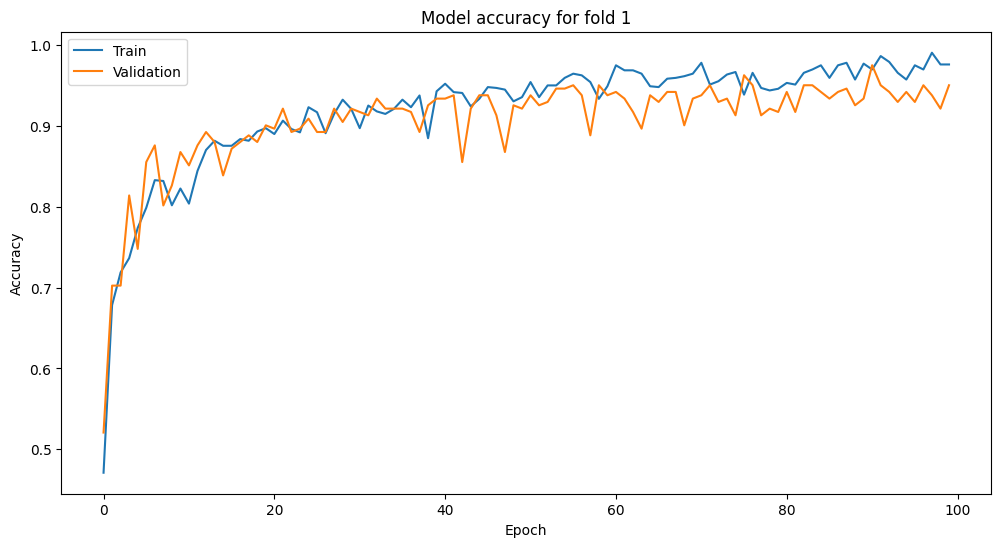

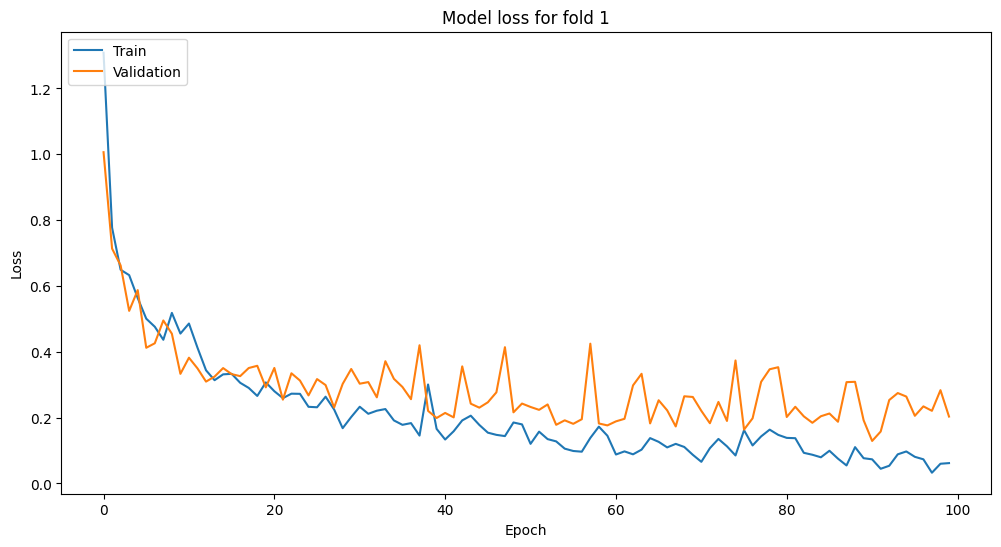

10/10 [==============================] - 2s 156ms/step - loss: 0.1890 - accuracy: 0.9636
Test accuracy for fold 1: 0.9635761380195618
Test loss for fold 1: 0.1890098750591278
10/10 [==============================] - 1s 48ms/step
Classification Report for fold 1:
              precision    recall  f1-score   support

        hail       0.95      0.96      0.95        75
   lightning       1.00      0.97      0.99        73
        rain       0.97      0.92      0.95        79
   sandstorm       0.94      1.00      0.97        75

    accuracy                           0.96       302
   macro avg       0.96      0.96      0.96       302
weighted avg       0.96      0.96      0.96       302



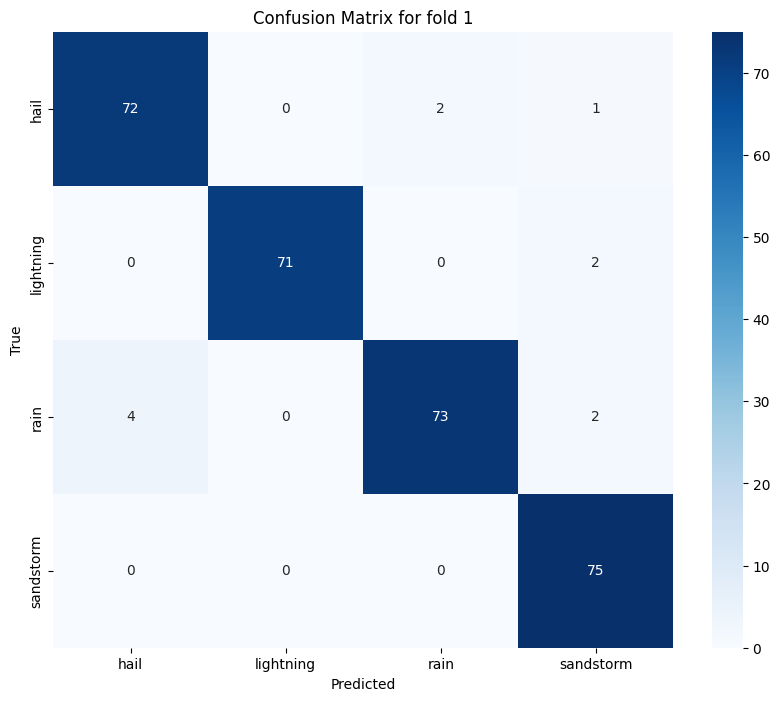

Epoch 1/100
31/31 [==============================] - 8s 227ms/step - loss: 1.2927 - accuracy: 0.5010 - val_loss: 0.7737 - val_accuracy: 0.6281
Epoch 2/100
31/31 [==============================] - 7s 228ms/step - loss: 0.7534 - accuracy: 0.6846 - val_loss: 0.8201 - val_accuracy: 0.7273
Epoch 3/100
31/31 [==============================] - 7s 227ms/step - loss: 0.6964 - accuracy: 0.7220 - val_loss: 0.5855 - val_accuracy: 0.7603
Epoch 4/100
31/31 [==============================] - 7s 228ms/step - loss: 0.6121 - accuracy: 0.7645 - val_loss: 0.6671 - val_accuracy: 0.7314
Epoch 5/100
31/31 [==============================] - 7s 227ms/step - loss: 0.5808 - accuracy: 0.7666 - val_loss: 0.5355 - val_accuracy: 0.7893
Epoch 6/100
31/31 [==============================] - 7s 229ms/step - loss: 0.5235 - accuracy: 0.7977 - val_loss: 0.5011 - val_accuracy: 0.7851
Epoch 7/100
31/31 [==============================] - 7s 226ms/step - loss: 0.4706 - accuracy: 0.8185 - val_loss: 0.5237 - val_accuracy: 0.7810

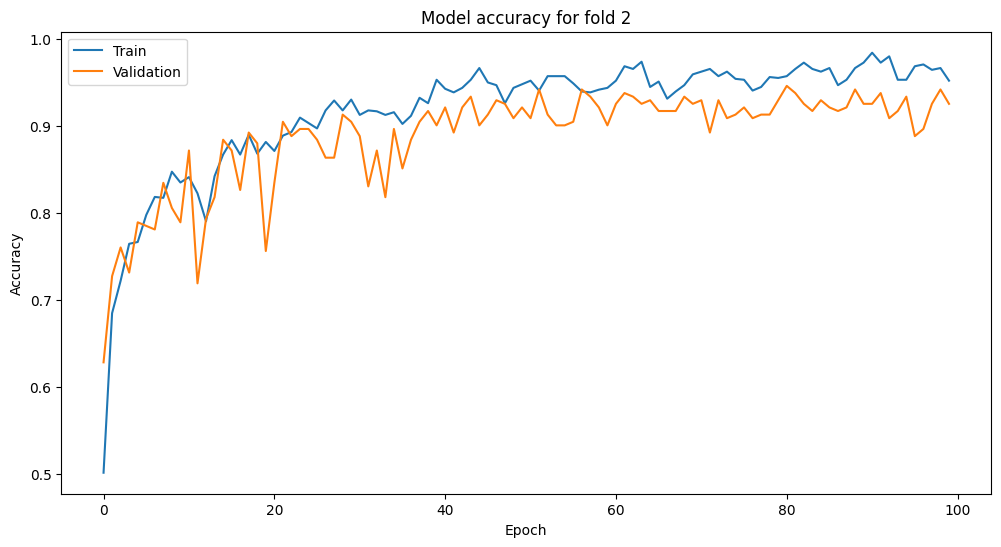

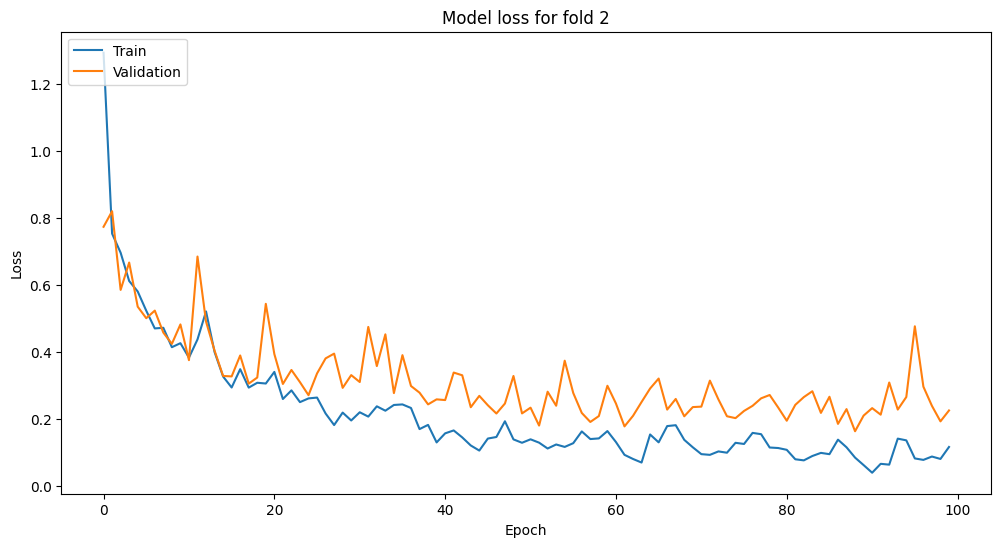

10/10 [==============================] - 1s 47ms/step - loss: 0.2319 - accuracy: 0.9238
Test accuracy for fold 2: 0.9238410592079163
Test loss for fold 2: 0.2319423109292984
10/10 [==============================] - 1s 48ms/step
Classification Report for fold 2:
              precision    recall  f1-score   support

        hail       0.94      0.85      0.89        73
   lightning       0.96      1.00      0.98        77
        rain       0.81      0.94      0.87        71
   sandstorm       1.00      0.90      0.95        81

    accuracy                           0.92       302
   macro avg       0.93      0.92      0.92       302
weighted avg       0.93      0.92      0.92       302



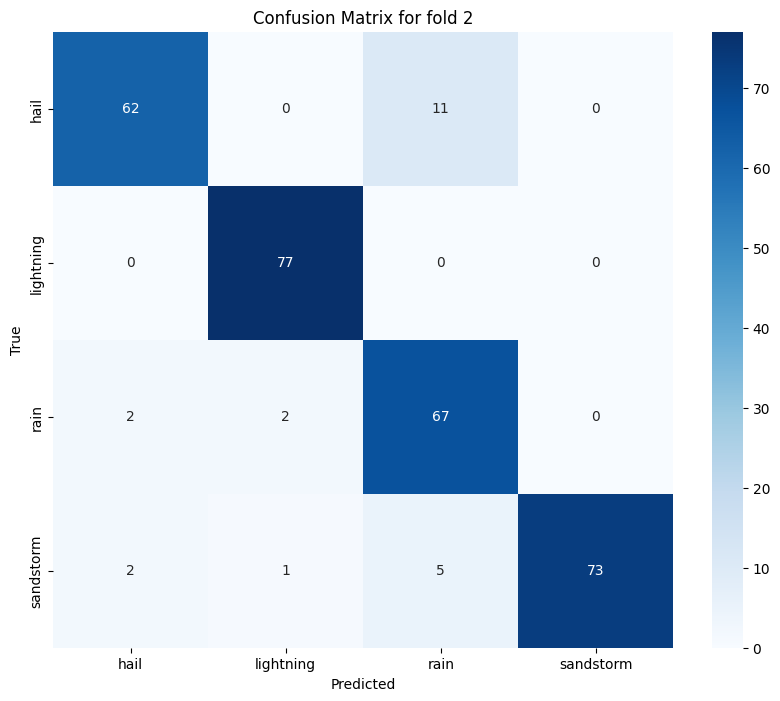

Epoch 1/100
31/31 [==============================] - 8s 233ms/step - loss: 1.3110 - accuracy: 0.4585 - val_loss: 0.7636 - val_accuracy: 0.7438
Epoch 2/100
31/31 [==============================] - 8s 240ms/step - loss: 0.7864 - accuracy: 0.6888 - val_loss: 0.5928 - val_accuracy: 0.7769
Epoch 3/100
31/31 [==============================] - 8s 240ms/step - loss: 0.7466 - accuracy: 0.6836 - val_loss: 0.8669 - val_accuracy: 0.6033
Epoch 4/100
31/31 [==============================] - 7s 235ms/step - loss: 0.7139 - accuracy: 0.7147 - val_loss: 0.5937 - val_accuracy: 0.7314
Epoch 5/100
31/31 [==============================] - 8s 240ms/step - loss: 0.5959 - accuracy: 0.7376 - val_loss: 0.4541 - val_accuracy: 0.8099
Epoch 6/100
31/31 [==============================] - 8s 239ms/step - loss: 0.4961 - accuracy: 0.7790 - val_loss: 0.4428 - val_accuracy: 0.7893
Epoch 7/100
31/31 [==============================] - 7s 235ms/step - loss: 0.4638 - accuracy: 0.8071 - val_loss: 0.4934 - val_accuracy: 0.7603

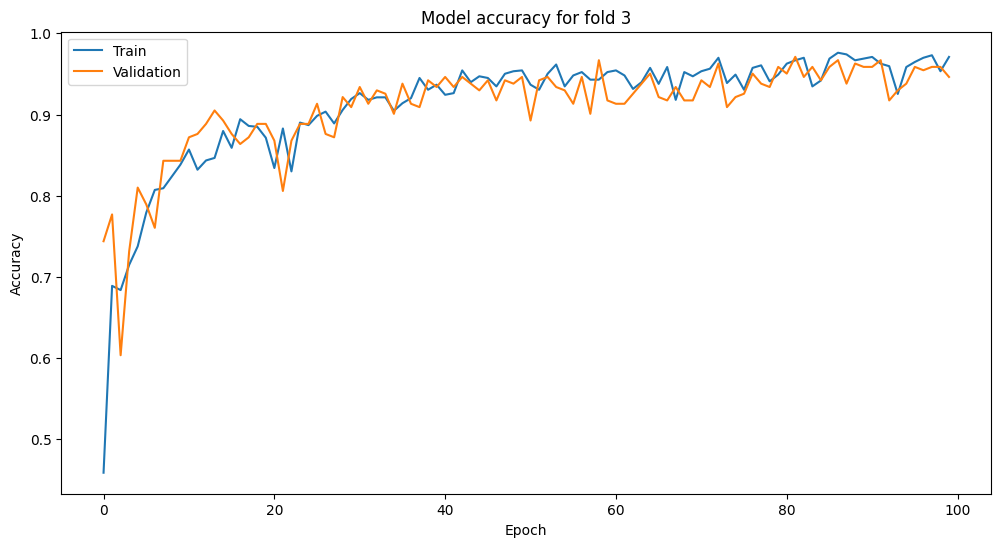

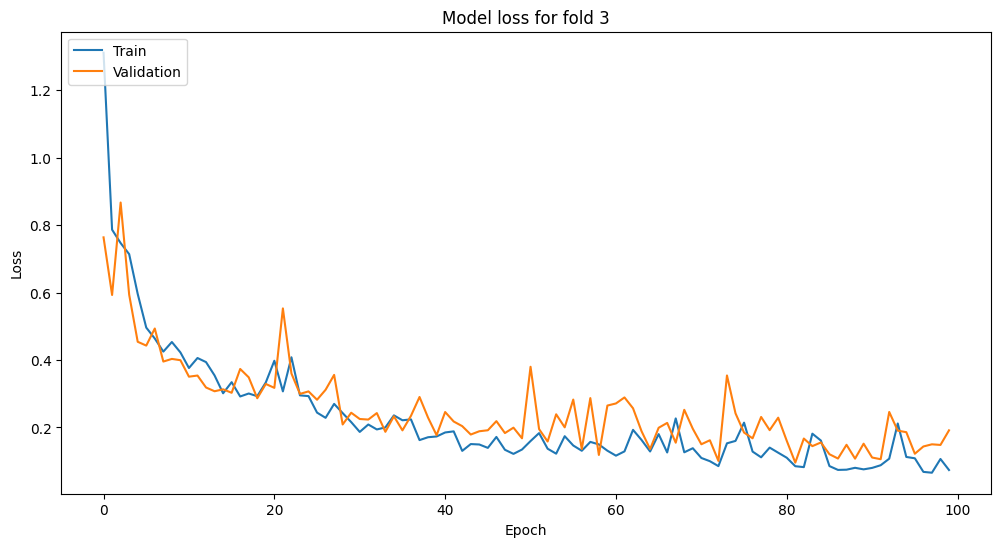

10/10 [==============================] - 0s 47ms/step - loss: 0.2639 - accuracy: 0.9470
Test accuracy for fold 3: 0.9470198750495911
Test loss for fold 3: 0.26385730504989624
10/10 [==============================] - 1s 65ms/step
Classification Report for fold 3:
              precision    recall  f1-score   support

        hail       0.93      0.92      0.92        86
   lightning       0.95      0.99      0.97        72
        rain       0.92      0.95      0.93        74
   sandstorm       1.00      0.94      0.97        70

    accuracy                           0.95       302
   macro avg       0.95      0.95      0.95       302
weighted avg       0.95      0.95      0.95       302



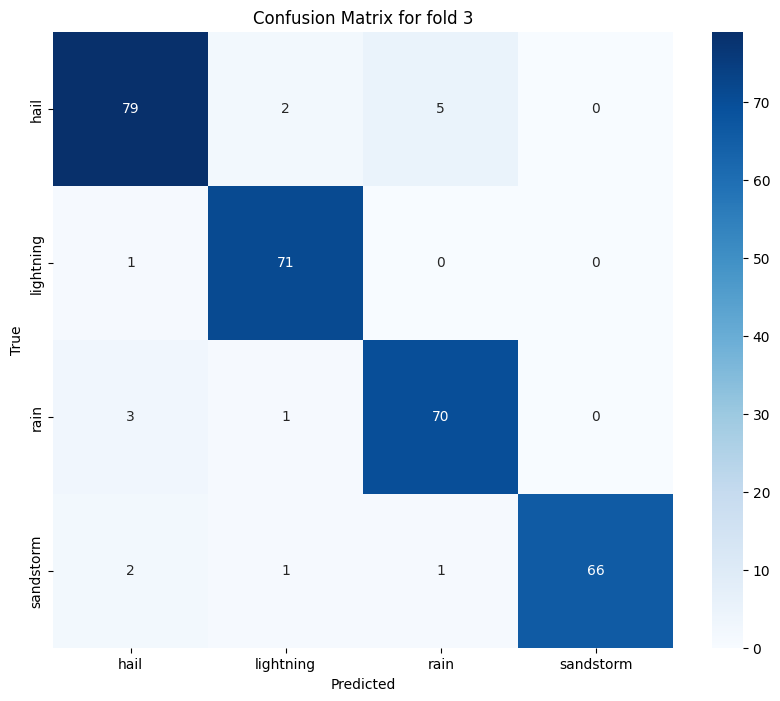

Epoch 1/100
31/31 [==============================] - 9s 280ms/step - loss: 1.2535 - accuracy: 0.4725 - val_loss: 0.9580 - val_accuracy: 0.5661
Epoch 2/100
31/31 [==============================] - 8s 243ms/step - loss: 0.8702 - accuracy: 0.6238 - val_loss: 0.8310 - val_accuracy: 0.5372
Epoch 3/100
31/31 [==============================] - 8s 243ms/step - loss: 0.6865 - accuracy: 0.7057 - val_loss: 0.6754 - val_accuracy: 0.7231
Epoch 4/100
31/31 [==============================] - 8s 240ms/step - loss: 0.5925 - accuracy: 0.7513 - val_loss: 0.5214 - val_accuracy: 0.8182
Epoch 5/100
31/31 [==============================] - 8s 244ms/step - loss: 0.5832 - accuracy: 0.7585 - val_loss: 0.7595 - val_accuracy: 0.7231
Epoch 6/100
31/31 [==============================] - 8s 241ms/step - loss: 0.5658 - accuracy: 0.7710 - val_loss: 0.5961 - val_accuracy: 0.7769
Epoch 7/100
31/31 [==============================] - 8s 240ms/step - loss: 0.5174 - accuracy: 0.7720 - val_loss: 0.5073 - val_accuracy: 0.8306

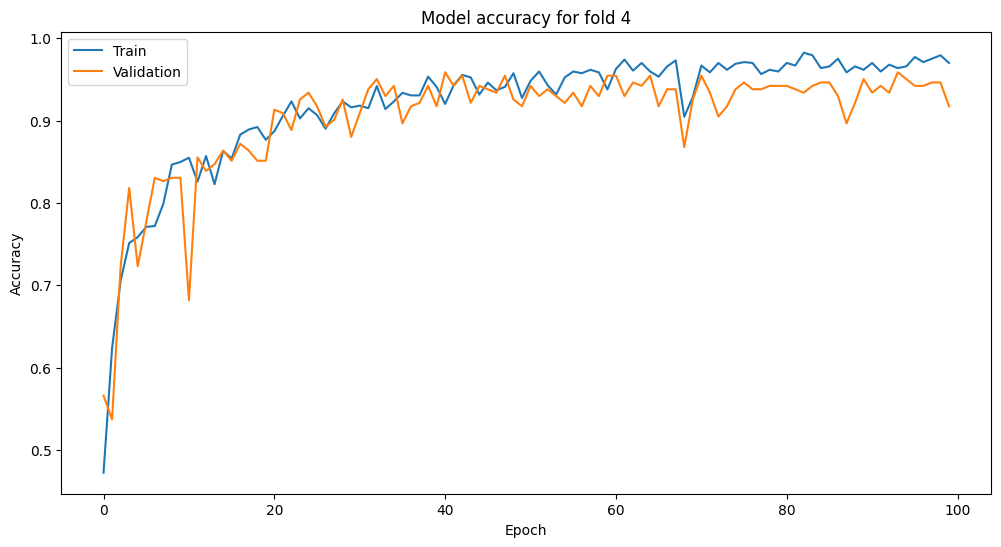

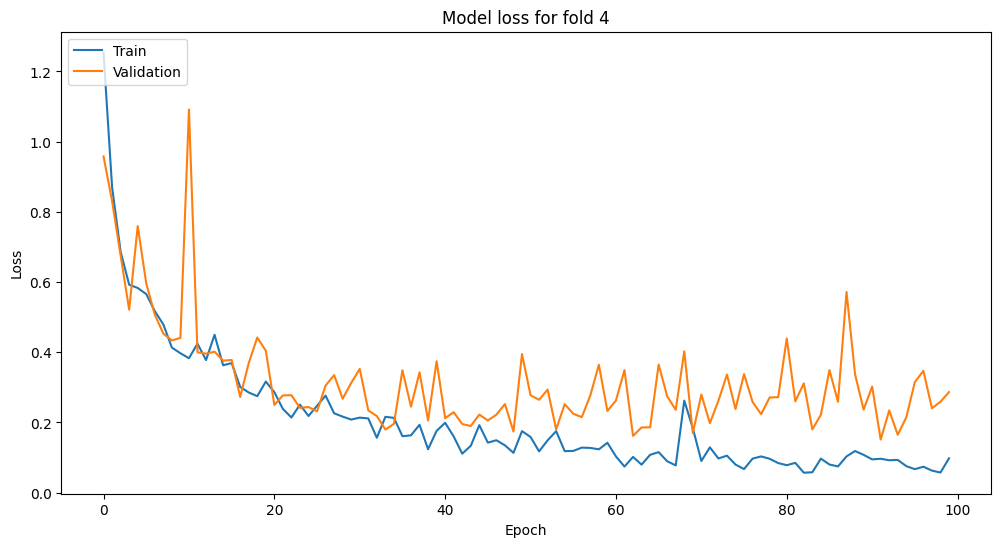

10/10 [==============================] - 2s 172ms/step - loss: 0.3150 - accuracy: 0.9336
Test accuracy for fold 4: 0.9335548281669617
Test loss for fold 4: 0.3149647116661072
10/10 [==============================] - 1s 67ms/step
Classification Report for fold 4:
              precision    recall  f1-score   support

        hail       0.97      0.91      0.94        80
   lightning       0.94      0.99      0.96        78
        rain       0.86      0.92      0.89        79
   sandstorm       0.98      0.91      0.94        64

    accuracy                           0.93       301
   macro avg       0.94      0.93      0.93       301
weighted avg       0.94      0.93      0.93       301



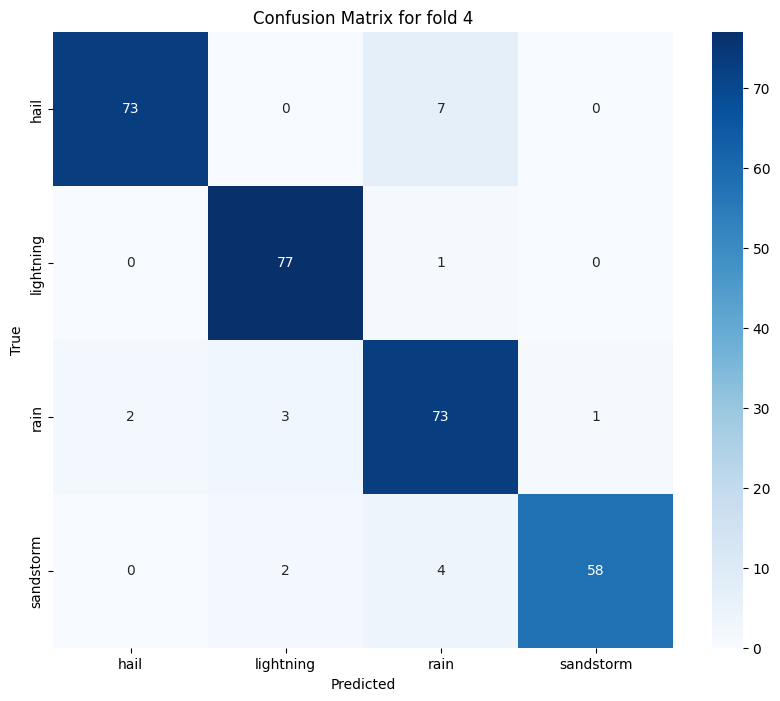

Epoch 1/100
31/31 [==============================] - 8s 241ms/step - loss: 1.2553 - accuracy: 0.4663 - val_loss: 0.9541 - val_accuracy: 0.6116
Epoch 2/100
31/31 [==============================] - 7s 235ms/step - loss: 0.8426 - accuracy: 0.6269 - val_loss: 0.8353 - val_accuracy: 0.6446
Epoch 3/100
31/31 [==============================] - 7s 234ms/step - loss: 0.6396 - accuracy: 0.7316 - val_loss: 0.6014 - val_accuracy: 0.6860
Epoch 4/100
31/31 [==============================] - 7s 234ms/step - loss: 0.5704 - accuracy: 0.7679 - val_loss: 0.3894 - val_accuracy: 0.8636
Epoch 5/100
31/31 [==============================] - 7s 232ms/step - loss: 0.4826 - accuracy: 0.8062 - val_loss: 0.4031 - val_accuracy: 0.8430
Epoch 6/100
31/31 [==============================] - 7s 234ms/step - loss: 0.4768 - accuracy: 0.8145 - val_loss: 0.3495 - val_accuracy: 0.8719
Epoch 7/100
31/31 [==============================] - 7s 234ms/step - loss: 0.4036 - accuracy: 0.8373 - val_loss: 0.3166 - val_accuracy: 0.8802

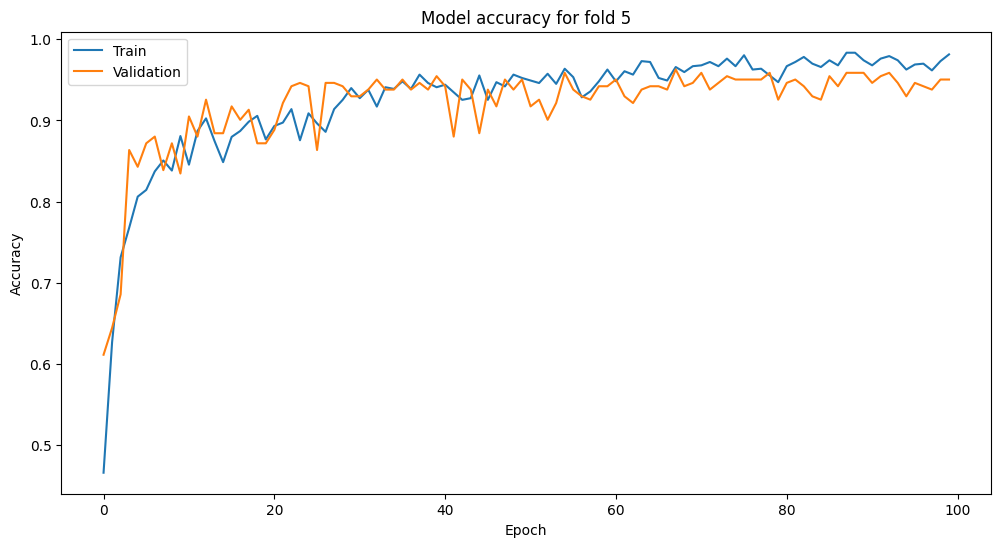

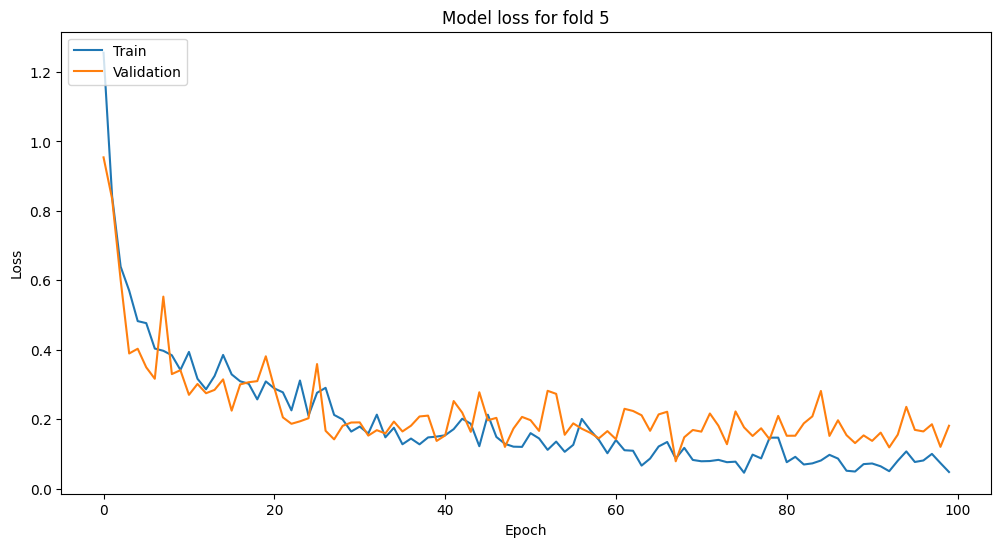

10/10 [==============================] - 0s 47ms/step - loss: 0.2594 - accuracy: 0.9336
Test accuracy for fold 5: 0.9335548281669617
Test loss for fold 5: 0.2594188153743744
10/10 [==============================] - 1s 68ms/step
Classification Report for fold 5:
              precision    recall  f1-score   support

        hail       0.86      0.97      0.91        63
   lightning       0.99      0.97      0.98        77
        rain       0.89      0.92      0.91        74
   sandstorm       0.99      0.89      0.93        87

    accuracy                           0.93       301
   macro avg       0.93      0.94      0.93       301
weighted avg       0.94      0.93      0.93       301



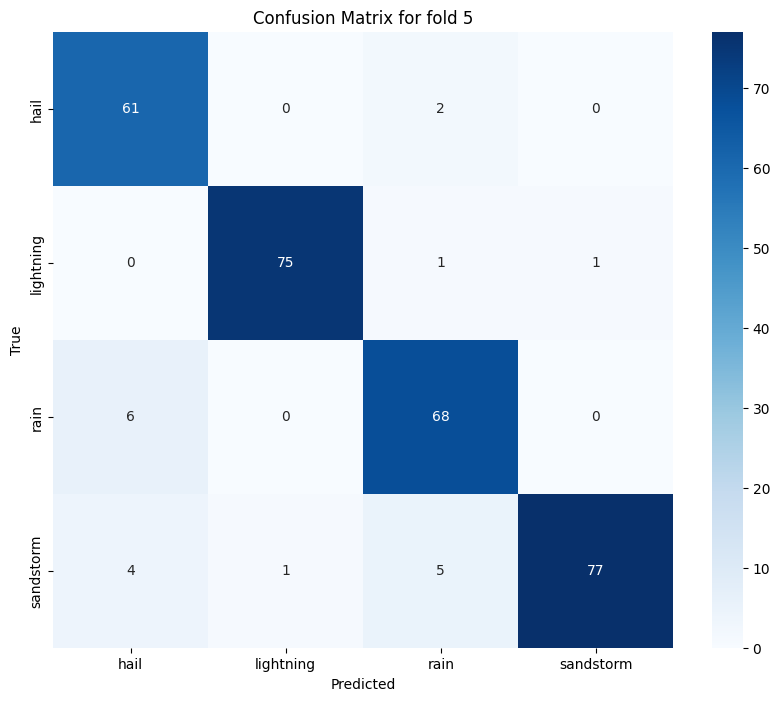

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensure X and y have the same number of samples
X = all_images.reshape(-1, 256, 256, 3)
print(X.shape)
y = np.array([])


for i in range(len(cats)):
    list_of_labels = [i] * 377
    y = np.concatenate([y, list_of_labels])
print(y)
y = to_categorical(y, num_classes=len(cats))  # Convert labels to categorical format


# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
fold_no = 1
for train_index, test_index in kf.split(X):
    # Re-initialize the model at the start of each fold
    model = build_three_layer_cnn_model_2()  # Define this function to build and compile your model
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Create an instance of the ImageDataGenerator with data augmentation parameters
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Fit the data generator on the training data
    datagen.fit(X_train)
    
    # Create an augmented data generator
    augmented_data_gen = datagen.flow(X_train, y_train, batch_size=32)
    
    # Train the model
    history = model.fit(augmented_data_gen, epochs=100, validation_data=(X_val, y_val))
    
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Model accuracy for fold {fold_no}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model loss for fold {fold_no}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test accuracy for fold {fold_no}: {test_accuracy}')
    print(f'Test loss for fold {fold_no}: {test_loss}')
    # Measure other evaluation metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Print classification report
    print(f'Classification Report for fold {fold_no}:')
    print(classification_report(y_true_classes, y_pred_classes, target_names=cats))
    
    # Print confusion matrix
    # print(f'Confusion Matrix for fold {fold_no}:')
    # print(confusion_matrix(y_true_classes, y_pred_classes))
    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cats, yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for fold {fold_no}')
    plt.show()
    
        
    
    fold_no += 1
    # Clear the TensorFlow session and reset the default graph to empty VRAM
    del history
    K.clear_session()
    tf.compat.v1.reset_default_graph()
    gc.collect()
    


In [ ]:
# Delete models to free up VRAM
# del five_layer_cnn_model_1
# del five_layer_cnn_model_2
# del four_layer_cnn_model_1
# del four_layer_cnn_model_2
# del three_layer_cnn_model_1
# del three_layer_cnn_model_2

# Clear the TensorFlow session and reset the default graph to empty VRAM
K.clear_session()
tf.compat.v1.reset_default_graph()
gc.collect()


4778

In [ ]:
# Load and preprocess your own image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img_resized = img.resize((128, 128)).convert('L')  # Resize and convert to grayscale
    img_array = img_to_array(img_resized) / 255.0  # Normalize between 0 and 1
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to your own image
your_image_path = r'C:\Users\mirzi\OneDrive\Desktop\images (1).jpg'

# Preprocess the image
your_image = preprocess_image(your_image_path)

# Make a prediction
prediction = model.predict(your_image)

# Get the predicted class
predicted_class = np.argmax(prediction, axis=1)

# Map the predicted class to the category name
predicted_category = cats[predicted_class[0]]

print(f'The model predicts that the image is: {predicted_category}')

# PCA

(1508, 256, 256, 3)
[0. 0. 0. ... 3. 3. 3.]
Shape of X_flattened (1508, 196608)
Shape of X_pca (1508, 10)
Length of X_pca: 1508
Explained variance ratio: [0.29147646 0.13271382 0.09287093 0.05465584 0.03958686 0.02875036
 0.01619692 0.01239989 0.01130897 0.01044085]


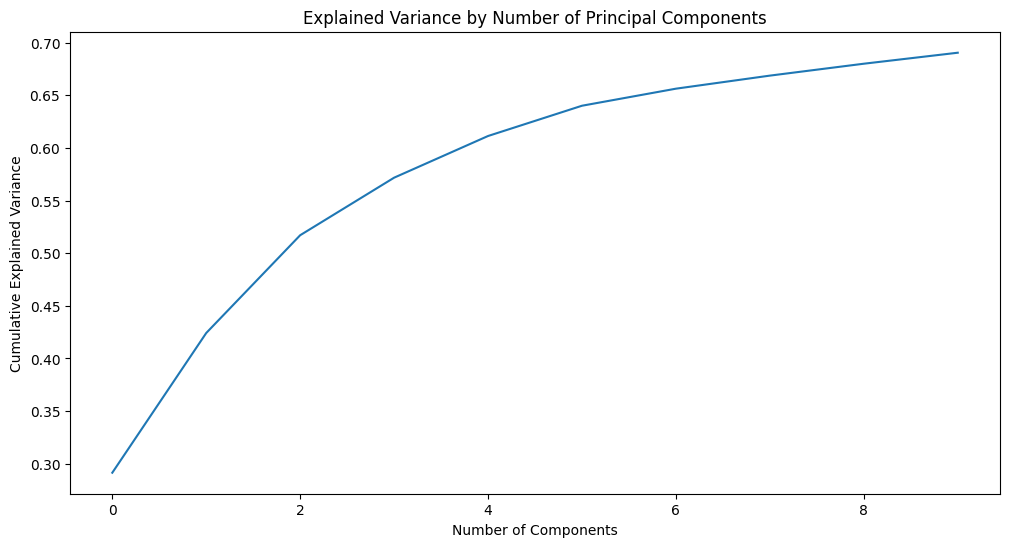

Shape of X_pca (1508, 16)
Length of X_pca: 1508
Explained variance ratio: [0.29147655 0.13271382 0.09287087 0.05465577 0.03958685 0.02875038
 0.01619692 0.01239989 0.01130898 0.01044084 0.00945646 0.00887213
 0.00800348 0.00634512 0.00576497 0.00523507]


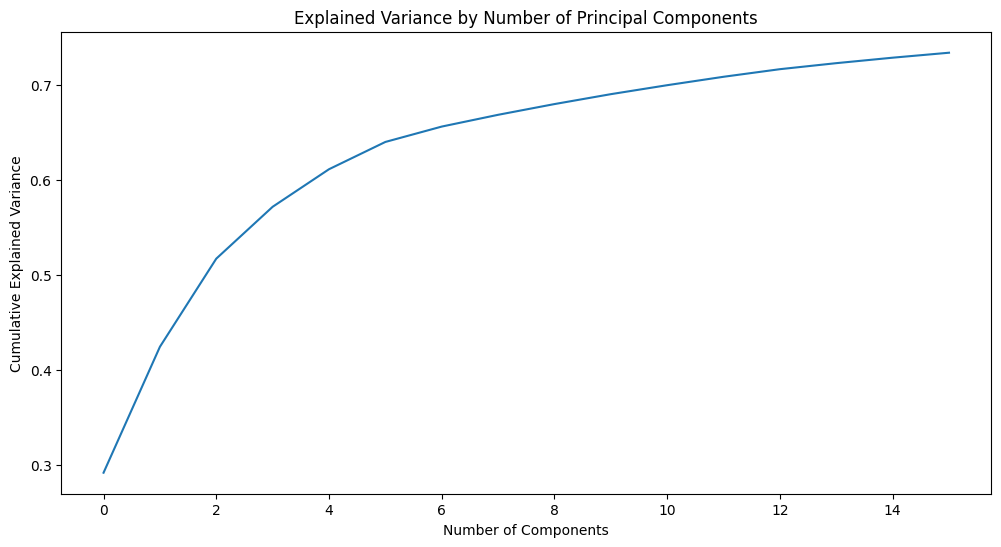

Shape of X_pca (1508, 25)
Length of X_pca: 1508
Explained variance ratio: [0.2914764  0.13271387 0.09287078 0.05465582 0.03958691 0.02875035
 0.01619692 0.01239989 0.01130898 0.01044084 0.00945646 0.00887213
 0.00800348 0.00634515 0.00576504 0.00523658 0.00505342 0.00466522
 0.00438149 0.00421471 0.00395299 0.00381367 0.0033617  0.00330011
 0.00308981]


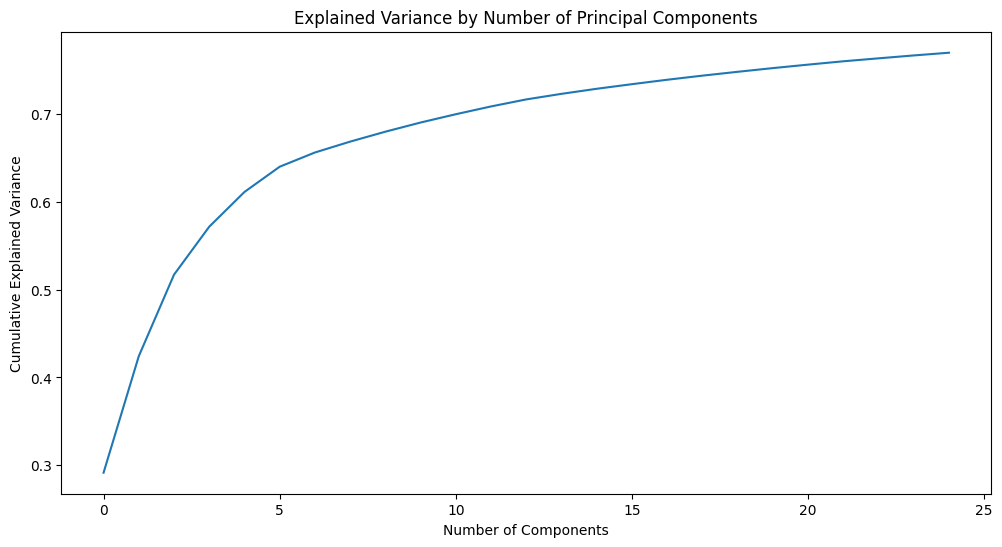

Shape of X_pca (1508, 35)
Length of X_pca: 1508
Explained variance ratio: [0.29147667 0.13271378 0.09287074 0.05465581 0.03958691 0.02875035
 0.01619694 0.0123999  0.01130897 0.01044085 0.00945646 0.00887213
 0.00800348 0.00634515 0.00576504 0.00523658 0.00505346 0.00466524
 0.00438157 0.00421489 0.00395338 0.00381437 0.00336291 0.00330093
 0.00309619 0.00288421 0.00286965 0.00275098 0.00264319 0.00258948
 0.00242357 0.0023627  0.0021979  0.00217432 0.00217391]


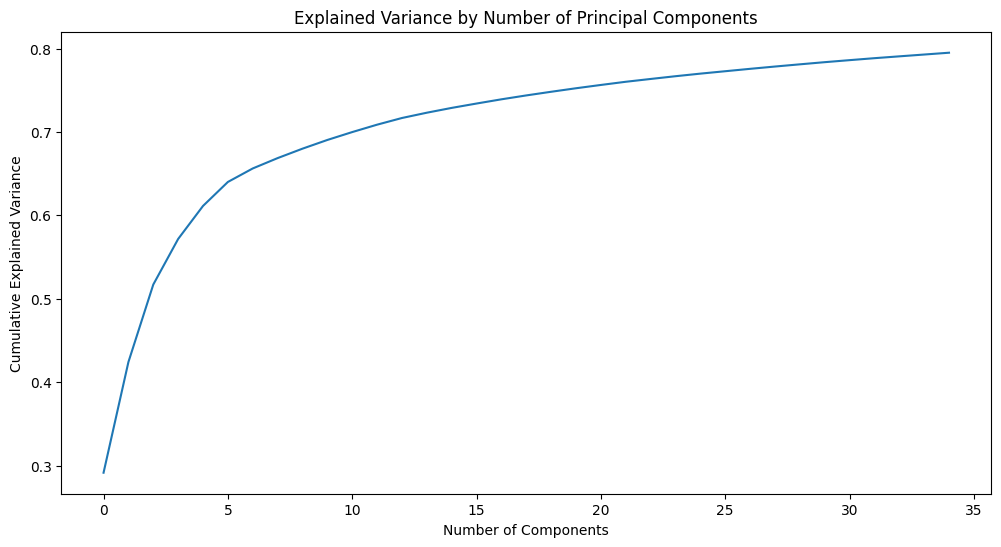

Shape of X_pca (1508, 50)
Length of X_pca: 1508
Explained variance ratio: [0.2914766  0.13271382 0.09287083 0.05465582 0.03958684 0.02875034
 0.01619692 0.01239989 0.01130897 0.01044085 0.00945646 0.00887215
 0.00800349 0.00634515 0.00576503 0.00523658 0.00505346 0.00466525
 0.00438158 0.00421489 0.00395339 0.00381438 0.00336292 0.00330096
 0.00309621 0.00288429 0.0028697  0.00275113 0.00264352 0.00258991
 0.00242423 0.00236322 0.00219823 0.00217968 0.00217559 0.00210131
 0.00192545 0.0018914  0.00178626 0.00177371 0.00171863 0.00169846
 0.00167705 0.00163333 0.00157722 0.00153907 0.00148799 0.00147161
 0.00139114 0.00133673]


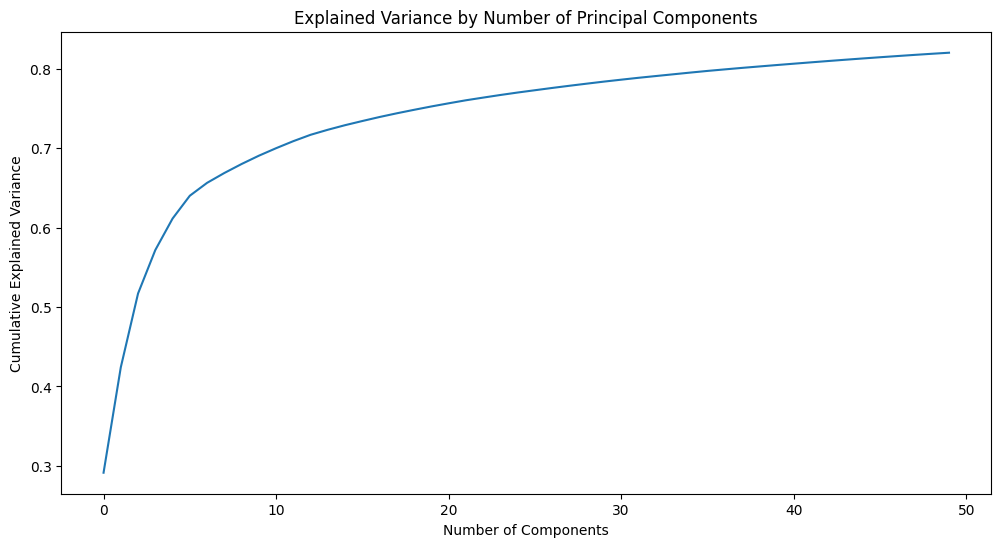

Shape of X_pca (1508, 50)
Length of X_pca: 1508
Explained variance ratio: [0.29147667 0.13271393 0.09287074 0.05465579 0.03958688 0.02875032
 0.01619693 0.0123999  0.01130898 0.01044085 0.00945646 0.00887213
 0.00800349 0.00634515 0.00576504 0.00523658 0.00505346 0.00466524
 0.00438157 0.00421489 0.00395338 0.00381438 0.00336292 0.00330096
 0.00309621 0.0028843  0.0028697  0.00275113 0.00264351 0.00258991
 0.00242423 0.00236323 0.00219824 0.00217973 0.0021756  0.00210126
 0.0019254  0.00189153 0.00178591 0.0017739  0.0017181  0.00169888
 0.00167662 0.00163316 0.00157677 0.00153858 0.00148602 0.00147121
 0.00139623 0.00133726]


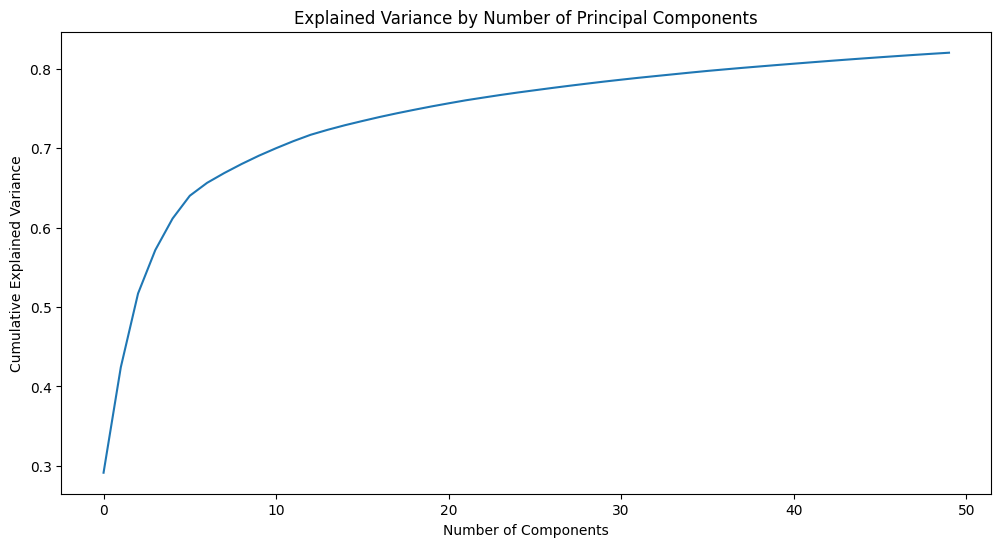

Shape of X_pca (1508, 200)
Length of X_pca: 1508
Explained variance ratio: [0.2914766  0.13271378 0.09287076 0.05465575 0.03958687 0.02875038
 0.01619694 0.01239989 0.01130897 0.01044085 0.00945646 0.00887213
 0.00800348 0.00634514 0.00576504 0.00523658 0.00505346 0.00466524
 0.00438157 0.00421489 0.00395338 0.00381437 0.00336292 0.00330096
 0.00309621 0.00288429 0.0028697  0.00275113 0.00264351 0.00258991
 0.00242423 0.00236325 0.00219827 0.00217974 0.00217562 0.00210136
 0.00192576 0.0018917  0.00178658 0.00177402 0.00171962 0.0016996
 0.00167764 0.00163529 0.00157906 0.00154054 0.00149175 0.00147532
 0.0014075  0.00135482 0.00133349 0.00131342 0.00126745 0.00124254
 0.00120795 0.0012023  0.00116848 0.00114251 0.00112962 0.00110989
 0.00109948 0.00107515 0.00106764 0.00103245 0.00100802 0.00100389
 0.00099809 0.00097325 0.00095001 0.00094624 0.00092103 0.0009123
 0.00090551 0.0008956  0.00088549 0.00087809 0.0008735  0.00085695
 0.00084152 0.00083663 0.00082962 0.00081467 0.00080778 

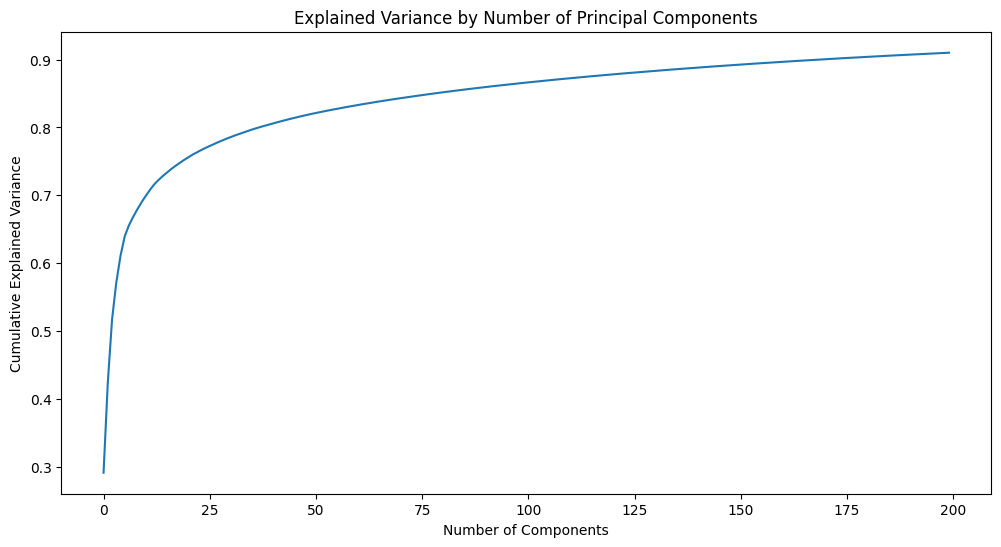

In [11]:
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical

# Ensure X and y have the same number of samples
X = all_images.reshape(-1, 256, 256, 3)
print(X.shape)
y = np.array([])


for i in range(len(cats)):
    list_of_labels = [i] * 377
    y = np.concatenate([y, list_of_labels])
print(y)
y = to_categorical(y, num_classes=len(cats))  # Convert labels to categorical format


# Flatten the images for PCA
X_flattened = X.reshape(X.shape[0], -1)
print("Shape of X_flattened", X_flattened.shape)
# Perform PCA
pca_10 = PCA(n_components=10) 
X_pca_10 = pca_10.fit_transform(X_flattened)
print("Shape of X_pca", X_pca_10.shape)
print("Length of X_pca:", len(X_pca_10))


# Print the explained variance ratio
print("Explained variance ratio:", pca_10.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_10.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

# Perform PCA
pca_16 = PCA(n_components=16) 
X_pca_16 = pca_16.fit_transform(X_flattened)
print("Shape of X_pca", X_pca_16.shape)
print("Length of X_pca:", len(X_pca_16))


# Print the explained variance ratio
print("Explained variance ratio:", pca_16.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_16.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

# Perform PCA
pca_25 = PCA(n_components=25) 
X_pca_25 = pca_25.fit_transform(X_flattened)
print("Shape of X_pca", X_pca_25.shape)
print("Length of X_pca:", len(X_pca_25))


# Print the explained variance ratio
print("Explained variance ratio:", pca_25.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_25.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

# Perform PCA
pca_35 = PCA(n_components=35) 
X_pca_35 = pca_35.fit_transform(X_flattened)
print("Shape of X_pca", X_pca_35.shape)
print("Length of X_pca:", len(X_pca_35))


# Print the explained variance ratio
print("Explained variance ratio:", pca_35.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_35.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

# Perform PCA
pca_50 = PCA(n_components=50) 
X_pca_50 = pca_50.fit_transform(X_flattened)
print("Shape of X_pca", X_pca_50.shape)
print("Length of X_pca:", len(X_pca_50))


# Print the explained variance ratio
print("Explained variance ratio:", pca_50.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_50.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()


# Perform PCA
pca_100 = PCA(n_components=50) 
X_pca_100 = pca_100.fit_transform(X_flattened)
print("Shape of X_pca", X_pca_100.shape)
print("Length of X_pca:", len(X_pca_100))


# Print the explained variance ratio
print("Explained variance ratio:", pca_100.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_100.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

# Perform PCA
pca_200 = PCA(n_components=200) 
X_pca_200 = pca_200.fit_transform(X_flattened)
print("Shape of X_pca", X_pca_200.shape)
print("Length of X_pca:", len(X_pca_200))


# Print the explained variance ratio
print("Explained variance ratio:", pca_200.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(pca_200.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()




In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

#   Decision Tree


Decision Tree Accuracy with PCA 10 components: 0.6456953642384106
Decision Tree Classification Report with PCA 10 components:
              precision    recall  f1-score   support

        hail       0.53      0.57      0.55        75
   lightning       0.78      0.73      0.75        73
        rain       0.58      0.53      0.56        79
   sandstorm       0.70      0.76      0.73        75

    accuracy                           0.65       302
   macro avg       0.65      0.65      0.65       302
weighted avg       0.65      0.65      0.65       302

Decision Tree Confusion Matrix with PCA 10 components:
[[43  8 15  9]
 [ 9 53  8  3]
 [20  5 42 12]
 [ 9  2  7 57]]
Decision Tree Accuracy with PCA 16 components: 0.652317880794702
Decision Tree Classification Report with PCA 16 components:
              precision    recall  f1-score   support

        hail       0.55      0.55      0.55        75
   lightning       0.74      0.74      0.74        73
        rain       0.53      0.58  

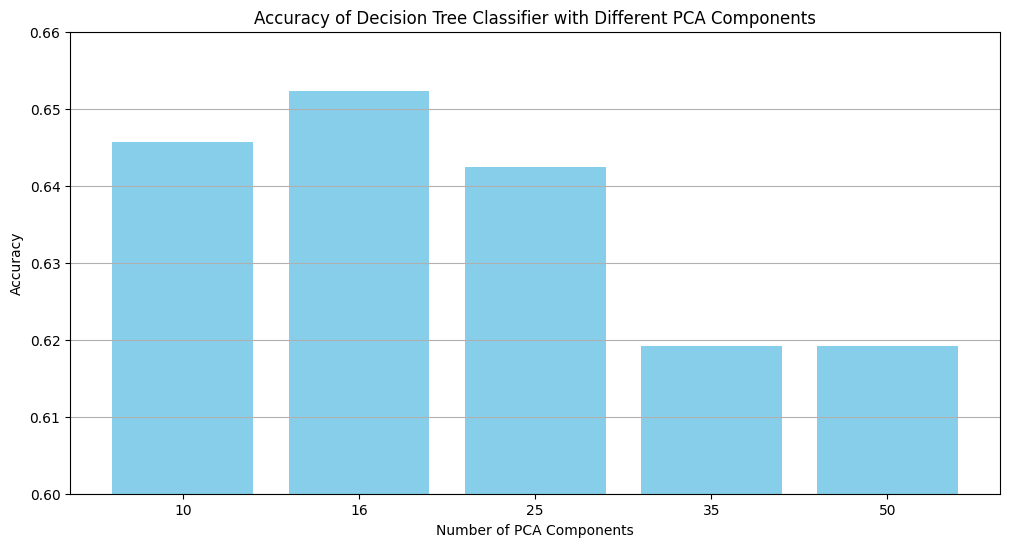

In [14]:

# For PCA with 10 components
X_train_pca_10, X_test_pca_10, y_train_pca_10, y_test_pca_10 = train_test_split(X_pca_10, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier_10 = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier_10.fit(X_train_pca_10, y_train_pca_10)

# Make predictions on the test set
y_pred_pca_10 = dt_classifier_10.predict(X_test_pca_10)

# Evaluate the classifier
accuracy_dt_10 = accuracy_score(y_test_pca_10.argmax(axis=1), y_pred_pca_10.argmax(axis=1))
report_dt_10 = classification_report(y_test_pca_10.argmax(axis=1), y_pred_pca_10.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_dt_10 = confusion_matrix(y_test_pca_10.argmax(axis=1), y_pred_pca_10.argmax(axis=1))

print(f'Decision Tree Accuracy with PCA 10 components: {accuracy_dt_10}')
print('Decision Tree Classification Report with PCA 10 components:')
print(classification_report(y_test_pca_10.argmax(axis=1), y_pred_pca_10.argmax(axis=1), target_names=cats))
print('Decision Tree Confusion Matrix with PCA 10 components:')
print(conf_matrix_dt_10)

# For PCA with 16 components
X_train_pca_16, X_test_pca_16, y_train_pca_16, y_test_pca_16 = train_test_split(X_pca_16, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier_16 = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier_16.fit(X_train_pca_16, y_train_pca_16)

# Make predictions on the test set
y_pred_pca_16 = dt_classifier_16.predict(X_test_pca_16)

# Evaluate the classifier
accuracy_dt_16 = accuracy_score(y_test_pca_16.argmax(axis=1), y_pred_pca_16.argmax(axis=1))
report_dt_16 = classification_report(y_test_pca_16.argmax(axis=1), y_pred_pca_16.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_dt_16 = confusion_matrix(y_test_pca_16.argmax(axis=1), y_pred_pca_16.argmax(axis=1))

print(f'Decision Tree Accuracy with PCA 16 components: {accuracy_dt_16}')
print('Decision Tree Classification Report with PCA 16 components:')
print(classification_report(y_test_pca_16.argmax(axis=1), y_pred_pca_16.argmax(axis=1), target_names=cats))
print('Decision Tree Confusion Matrix with PCA 16 components:')
print(conf_matrix_dt_16)

# For PCA with 25 components
X_train_pca_25, X_test_pca_25, y_train_pca_25, y_test_pca_25 = train_test_split(X_pca_25, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier_25 = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier_25.fit(X_train_pca_25, y_train_pca_25)

# Make predictions on the test set
y_pred_pca_25 = dt_classifier_25.predict(X_test_pca_25)

# Evaluate the classifier
accuracy_dt_25 = accuracy_score(y_test_pca_25.argmax(axis=1), y_pred_pca_25.argmax(axis=1))
report_dt_25 = classification_report(y_test_pca_25.argmax(axis=1), y_pred_pca_25.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_dt_25 = confusion_matrix(y_test_pca_25.argmax(axis=1), y_pred_pca_25.argmax(axis=1))

print(f'Decision Tree Accuracy with PCA 25 components: {accuracy_dt_25}')
print('Decision Tree Classification Report with PCA 25 components:')
print(classification_report(y_test_pca_25.argmax(axis=1), y_pred_pca_25.argmax(axis=1), target_names=cats))
print('Decision Tree Confusion Matrix with PCA 25 components:')
print(conf_matrix_dt_25)

# For PCA with 35 components
X_train_pca_35, X_test_pca_35, y_train_pca_35, y_test_pca_35 = train_test_split(X_pca_35, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier_35 = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier_35.fit(X_train_pca_35, y_train_pca_35)

# Make predictions on the test set
y_pred_pca_35 = dt_classifier_35.predict(X_test_pca_35)

# Evaluate the classifier
accuracy_dt_35 = accuracy_score(y_test_pca_35.argmax(axis=1), y_pred_pca_35.argmax(axis=1))
report_dt_35 = classification_report(y_test_pca_35.argmax(axis=1), y_pred_pca_35.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_dt_35 = confusion_matrix(y_test_pca_35.argmax(axis=1), y_pred_pca_35.argmax(axis=1))

print(f'Decision Tree Accuracy with PCA 35 components: {accuracy_dt_35}')
print('Decision Tree Classification Report with PCA 35 components:')
print(classification_report(y_test_pca_35.argmax(axis=1), y_pred_pca_35.argmax(axis=1), target_names=cats))
print('Decision Tree Confusion Matrix with PCA 35 components:')
print(conf_matrix_dt_35)

# For PCA with 50 components
X_train_pca_50, X_test_pca_50, y_train_pca_50, y_test_pca_50 = train_test_split(X_pca_50, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier_50 = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier_50.fit(X_train_pca_50, y_train_pca_50)

# Make predictions on the test set
y_pred_pca_50 = dt_classifier_50.predict(X_test_pca_50)

# Evaluate the classifier
accuracy_dt_50 = accuracy_score(y_test_pca_50.argmax(axis=1), y_pred_pca_50.argmax(axis=1))
report_dt_50 = classification_report(y_test_pca_50.argmax(axis=1), y_pred_pca_50.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_dt_50 = confusion_matrix(y_test_pca_50.argmax(axis=1), y_pred_pca_50.argmax(axis=1))

print(f'Decision Tree Accuracy with PCA 50 components: {accuracy_dt_50}')
print('Decision Tree Classification Report with PCA 50 components:')
print(classification_report(y_test_pca_50.argmax(axis=1), y_pred_pca_50.argmax(axis=1), target_names=cats))
print('Decision Tree Confusion Matrix with PCA 50 components:')
print(conf_matrix_dt_50)

# Compare the results of the five models
results = [
    {'PCA Components': "10", 'Accuracy': accuracy_dt_10, 'Classification Report': report_dt_10, 'Confusion Matrix': conf_matrix_dt_10},
    {'PCA Components': "16", 'Accuracy': accuracy_dt_16, 'Classification Report': report_dt_16, 'Confusion Matrix': conf_matrix_dt_16},
    {'PCA Components': "25", 'Accuracy': accuracy_dt_25, 'Classification Report': report_dt_25, 'Confusion Matrix': conf_matrix_dt_25},
    {'PCA Components': "35", 'Accuracy': accuracy_dt_35, 'Classification Report': report_dt_35, 'Confusion Matrix': conf_matrix_dt_35},
    {'PCA Components': "50", 'Accuracy': accuracy_dt_50, 'Classification Report': report_dt_50, 'Confusion Matrix': conf_matrix_dt_50}
]

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plot the accuracy of the models using a bar graph 
plt.figure(figsize=(12, 6))
plt.bar(results_df['PCA Components'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree Classifier with Different PCA Components')
plt.xticks(results_df['PCA Components'])
plt.ylim(0.6, 0.66)
plt.grid(axis='y')
plt.show()

# Random Forest

Random Forest Accuracy with PCA 10 components: 0.7284768211920529
Random Forest Classification Report with PCA 10 components:
              precision    recall  f1-score   support

        hail       0.49      0.87      0.63        75
   lightning       0.97      0.81      0.88        73
        rain       0.81      0.56      0.66        79
   sandstorm       0.95      0.69      0.80        75

    accuracy                           0.73       302
   macro avg       0.80      0.73      0.74       302
weighted avg       0.80      0.73      0.74       302

Random Forest Confusion Matrix with PCA 10 components:
[[65  1  7  2]
 [12 59  2  0]
 [33  1 44  1]
 [22  0  1 52]]
Random Forest Accuracy with PCA 16 components: 0.7483443708609272
Random Forest Classification Report with PCA 16 components:
              precision    recall  f1-score   support

        hail       0.51      0.93      0.66        75
   lightning       0.98      0.81      0.89        73
        rain       0.85      0.57 

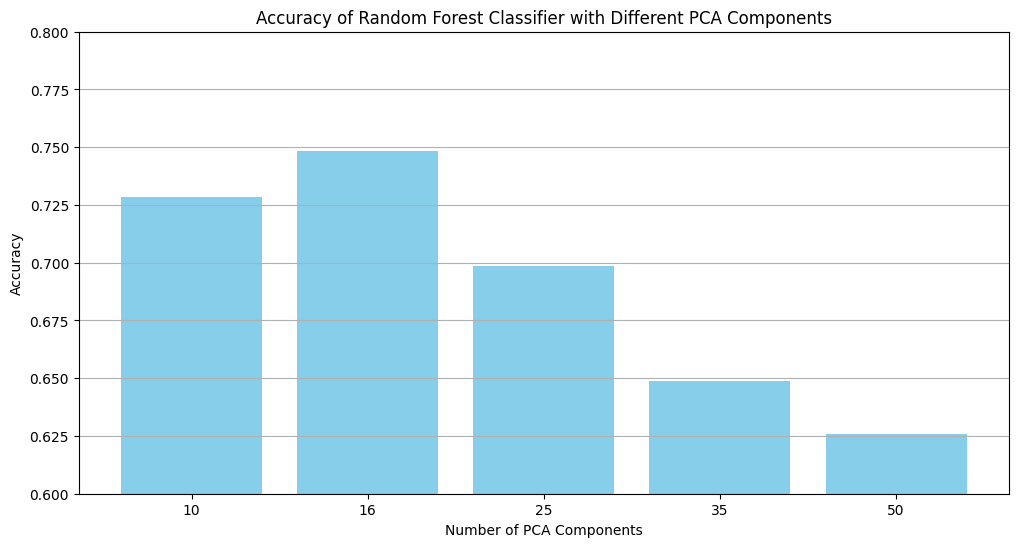

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For PCA with 10 components
X_train_pca_10, X_test_pca_10, y_train_pca_10, y_test_pca_10 = train_test_split(X_pca_10, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier_10 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_10.fit(X_train_pca_10, y_train_pca_10)

# Make predictions on the test set
y_pred_rf_10 = rf_classifier_10.predict(X_test_pca_10)

# Evaluate the classifier
accuracy_rf_10 = accuracy_score(y_test_pca_10.argmax(axis=1), y_pred_rf_10.argmax(axis=1))
report_rf_10 = classification_report(y_test_pca_10.argmax(axis=1), y_pred_rf_10.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_rf_10 = confusion_matrix(y_test_pca_10.argmax(axis=1), y_pred_rf_10.argmax(axis=1))

print(f'Random Forest Accuracy with PCA 10 components: {accuracy_rf_10}')
print('Random Forest Classification Report with PCA 10 components:')
print(classification_report(y_test_pca_10.argmax(axis=1), y_pred_rf_10.argmax(axis=1), target_names=cats))
print('Random Forest Confusion Matrix with PCA 10 components:')
print(conf_matrix_rf_10)

# For PCA with 16 components
X_train_pca_16, X_test_pca_16, y_train_pca_16, y_test_pca_16 = train_test_split(X_pca_16, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier_16 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_16.fit(X_train_pca_16, y_train_pca_16)

# Make predictions on the test set
y_pred_rf_16 = rf_classifier_16.predict(X_test_pca_16)

# Evaluate the classifier
accuracy_rf_16 = accuracy_score(y_test_pca_16.argmax(axis=1), y_pred_rf_16.argmax(axis=1))
report_rf_16 = classification_report(y_test_pca_16.argmax(axis=1), y_pred_rf_16.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_rf_16 = confusion_matrix(y_test_pca_16.argmax(axis=1), y_pred_rf_16.argmax(axis=1))

print(f'Random Forest Accuracy with PCA 16 components: {accuracy_rf_16}')
print('Random Forest Classification Report with PCA 16 components:')
print(classification_report(y_test_pca_16.argmax(axis=1), y_pred_rf_16.argmax(axis=1), target_names=cats))
print('Random Forest Confusion Matrix with PCA 16 components:')
print(conf_matrix_rf_16)

# For PCA with 25 components
X_train_pca_25, X_test_pca_25, y_train_pca_25, y_test_pca_25 = train_test_split(X_pca_25, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier_25 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_25.fit(X_train_pca_25, y_train_pca_25)

# Make predictions on the test set
y_pred_rf_25 = rf_classifier_25.predict(X_test_pca_25)

# Evaluate the classifier
accuracy_rf_25 = accuracy_score(y_test_pca_25.argmax(axis=1), y_pred_rf_25.argmax(axis=1))
report_rf_25 = classification_report(y_test_pca_25.argmax(axis=1), y_pred_rf_25.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_rf_25 = confusion_matrix(y_test_pca_25.argmax(axis=1), y_pred_rf_25.argmax(axis=1))

print(f'Random Forest Accuracy with PCA 25 components: {accuracy_rf_25}')
print('Random Forest Classification Report with PCA 25 components:')
print(classification_report(y_test_pca_25.argmax(axis=1), y_pred_rf_25.argmax(axis=1), target_names=cats))
print('Random Forest Confusion Matrix with PCA 25 components:')
print(conf_matrix_rf_25)

# For PCA with 35 components
X_train_pca_35, X_test_pca_35, y_train_pca_35, y_test_pca_35 = train_test_split(X_pca_35, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier_35 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_35.fit(X_train_pca_35, y_train_pca_35)

# Make predictions on the test set
y_pred_rf_35 = rf_classifier_35.predict(X_test_pca_35)

# Evaluate the classifier
accuracy_rf_35 = accuracy_score(y_test_pca_35.argmax(axis=1), y_pred_rf_35.argmax(axis=1))
report_rf_35 = classification_report(y_test_pca_35.argmax(axis=1), y_pred_rf_35.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_rf_35 = confusion_matrix(y_test_pca_35.argmax(axis=1), y_pred_rf_35.argmax(axis=1))

print(f'Random Forest Accuracy with PCA 35 components: {accuracy_rf_35}')
print('Random Forest Classification Report with PCA 35 components:')
print(classification_report(y_test_pca_35.argmax(axis=1), y_pred_rf_35.argmax(axis=1), target_names=cats))
print('Random Forest Confusion Matrix with PCA 35 components:')
print(conf_matrix_rf_35)

# For PCA with 35 components
X_train_pca_50, X_test_pca_50, y_train_pca_50, y_test_pca_50 = train_test_split(X_pca_50, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier_50 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_50.fit(X_train_pca_50, y_train_pca_50)

# Make predictions on the test set
y_pred_rf_50 = rf_classifier_50.predict(X_test_pca_50)

# Evaluate the classifier
accuracy_rf_50 = accuracy_score(y_test_pca_50.argmax(axis=1), y_pred_rf_50.argmax(axis=1))
report_rf_50 = classification_report(y_test_pca_50.argmax(axis=1), y_pred_rf_50.argmax(axis=1), target_names=cats, output_dict=True)
conf_matrix_rf_50 = confusion_matrix(y_test_pca_50.argmax(axis=1), y_pred_rf_50.argmax(axis=1))

print(f'Random Forest Accuracy with PCA 50 components: {accuracy_rf_50}')
print('Random Forest Classification Report with PCA 50 components:')
print(classification_report(y_test_pca_50.argmax(axis=1), y_pred_rf_50.argmax(axis=1), target_names=cats))
print('Random Forest Confusion Matrix with PCA 50 components:')
print(conf_matrix_rf_50)

# Compare the results of the three models
results_rf = [
    {'PCA Components': "10", 'Accuracy': accuracy_rf_10, 'Classification Report': report_rf_10, 'Confusion Matrix': conf_matrix_rf_10},
    {'PCA Components': "16", 'Accuracy': accuracy_rf_16, 'Classification Report': report_rf_16, 'Confusion Matrix': conf_matrix_rf_16},
    {'PCA Components': "25", 'Accuracy': accuracy_rf_25, 'Classification Report': report_rf_25, 'Confusion Matrix': conf_matrix_rf_25},
    {'PCA Components': "35", 'Accuracy': accuracy_rf_35, 'Classification Report': report_rf_35, 'Confusion Matrix': conf_matrix_rf_35},
    {'PCA Components': "50", 'Accuracy': accuracy_rf_50, 'Classification Report': report_rf_50, 'Confusion Matrix': conf_matrix_rf_50}
]

# Convert results to a DataFrame for better visualization
results_rf_df = pd.DataFrame(results_rf)
# print(results_rf_df)

# Plot the accuracy of the models using a bar graph 
plt.figure(figsize=(12, 6))
plt.bar(results_rf_df['PCA Components'], results_rf_df['Accuracy'], color='skyblue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest Classifier with Different PCA Components')
plt.xticks(results_rf_df['PCA Components'])
plt.ylim(0.6, 0.8)
plt.grid(axis='y')
plt.show()

# Kmeans

PCA with 10 components:
Silhouette Score: 0.19156725704669952
Adjusted Rand Index: 0.2235590945334989

PCA with 16 components:
Silhouette Score: 0.17740081250667572
Adjusted Rand Index: 0.22774605575464174

PCA with 25 components:
Silhouette Score: 0.1669856160879135
Adjusted Rand Index: 0.22483647301096185

PCA with 35 components:
Silhouette Score: 0.16154129803180695
Adjusted Rand Index: 0.2279357082123882

PCA with 50 components:
Silhouette Score: 0.15554256737232208
Adjusted Rand Index: 0.22658961411116785

PCA with 100 components:
Silhouette Score: 0.15553607046604156
Adjusted Rand Index: 0.22658961411116785



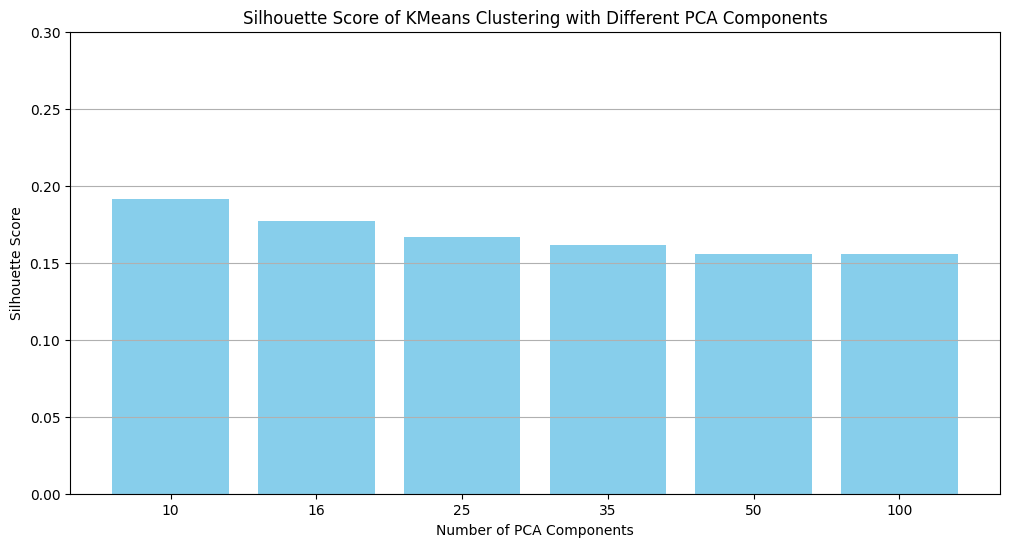

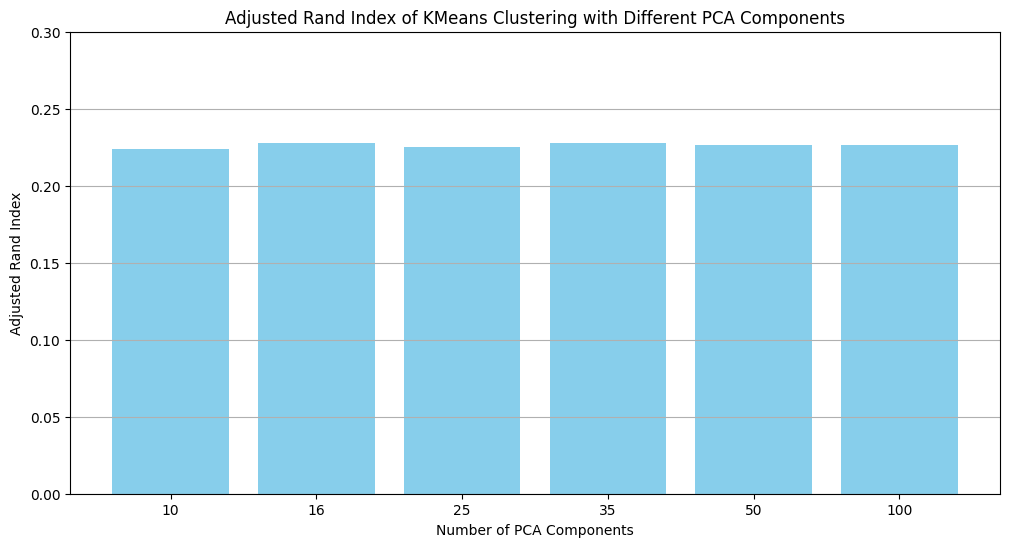

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Perform K-means clustering for PCA with 10 components
kmeans_10 = KMeans(n_clusters=len(cats), random_state=42)
kmeans_10.fit(X_pca_10)
cluster_labels_10 = kmeans_10.labels_

# Perform K-means clustering for PCA with 16 components
kmeans_16 = KMeans(n_clusters=len(cats), random_state=42)
kmeans_16.fit(X_pca_16)
cluster_labels_16 = kmeans_16.labels_

# Perform K-means clustering for PCA with 25 components
kmeans_25 = KMeans(n_clusters=len(cats), random_state=42)
kmeans_25.fit(X_pca_25)
cluster_labels_25 = kmeans_25.labels_

# Perform K-means clustering for PCA with 35 components
kmeans_35 = KMeans(n_clusters=len(cats), random_state=42)
kmeans_35.fit(X_pca_35)
cluster_labels_35 = kmeans_35.labels_

# Perform K-means clustering for PCA with 50 components
kmeans_50 = KMeans(n_clusters=len(cats), random_state=42)
kmeans_50.fit(X_pca_50)
cluster_labels_50 = kmeans_50.labels_

# Perform K-means clustering for PCA with 100 components
kmeans_100 = KMeans(n_clusters=len(cats), random_state=42)
kmeans_100.fit(X_pca_100)
cluster_labels_100 = kmeans_100.labels_

# Evaluate the clustering results using silhouette score and adjusted Rand index
silhouette_scores = [
    silhouette_score(X_pca_10, cluster_labels_10),
    silhouette_score(X_pca_16, cluster_labels_16),
    silhouette_score(X_pca_25, cluster_labels_25),
    silhouette_score(X_pca_35, cluster_labels_35),
    silhouette_score(X_pca_50, cluster_labels_50),
    silhouette_score(X_pca_100, cluster_labels_100)
]

adjusted_rand_scores = [
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_10),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_16),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_25),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_35),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_50),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_100)
]

# Print the evaluation results
for i, n_components in enumerate([10, 16, 25, 35, 50, 100]):
    print(f'PCA with {n_components} components:')
    print(f'Silhouette Score: {silhouette_scores[i]}')
    print(f'Adjusted Rand Index: {adjusted_rand_scores[i]}')
    print()

# Compare the results of the KMeans models
results_kmeans = [
    {'PCA Components': "10", 'Silhouette Score': silhouette_scores[0], 'Adjusted Rand Index': adjusted_rand_scores[0]},
    {'PCA Components': "16", 'Silhouette Score': silhouette_scores[1], 'Adjusted Rand Index': adjusted_rand_scores[1]},
    {'PCA Components': "25", 'Silhouette Score': silhouette_scores[2], 'Adjusted Rand Index': adjusted_rand_scores[2]},
    {'PCA Components': "35", 'Silhouette Score': silhouette_scores[3], 'Adjusted Rand Index': adjusted_rand_scores[3]},
    {'PCA Components': "50", 'Silhouette Score': silhouette_scores[4], 'Adjusted Rand Index': adjusted_rand_scores[4]},
    {'PCA Components': "100", 'Silhouette Score': silhouette_scores[5], 'Adjusted Rand Index': adjusted_rand_scores[5]}
]

# Convert results to a DataFrame for better visualization
results_kmeans_df = pd.DataFrame(results_kmeans)

# Plot the silhouette scores of the KMeans clustering using a bar graph
plt.figure(figsize=(12, 6))
plt.bar(results_kmeans_df['PCA Components'], results_kmeans_df['Silhouette Score'], color='skyblue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score of KMeans Clustering with Different PCA Components')
plt.xticks(results_kmeans_df['PCA Components'])
plt.ylim(0, 0.3)
plt.grid(axis='y')
plt.show()

# Plot the adjusted Rand index of the KMeans clustering using a bar graph
plt.figure(figsize=(12, 6))
plt.bar(results_kmeans_df['PCA Components'], results_kmeans_df['Adjusted Rand Index'], color='skyblue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index of KMeans Clustering with Different PCA Components')
plt.xticks(results_kmeans_df['PCA Components'])
plt.ylim(0, 0.3)
plt.grid(axis='y')
plt.show()

PCA with 10 components:
Silhouette Score: 0.019159378483891487
Adjusted Rand Index: 0.2882378768110394

PCA with 16 components:
Silhouette Score: 0.007992546074092388
Adjusted Rand Index: 0.24516472975446182

PCA with 25 components:
Silhouette Score: 0.007525846362113953
Adjusted Rand Index: 0.24755295125296403

PCA with 35 components:
Silhouette Score: 0.010406095534563065
Adjusted Rand Index: 0.2832539425375621

PCA with 50 components:
Silhouette Score: 0.02612241357564926
Adjusted Rand Index: 0.32840388199501386

PCA with 100 components:
Silhouette Score: 0.026965580880641937
Adjusted Rand Index: 0.33039136758491155



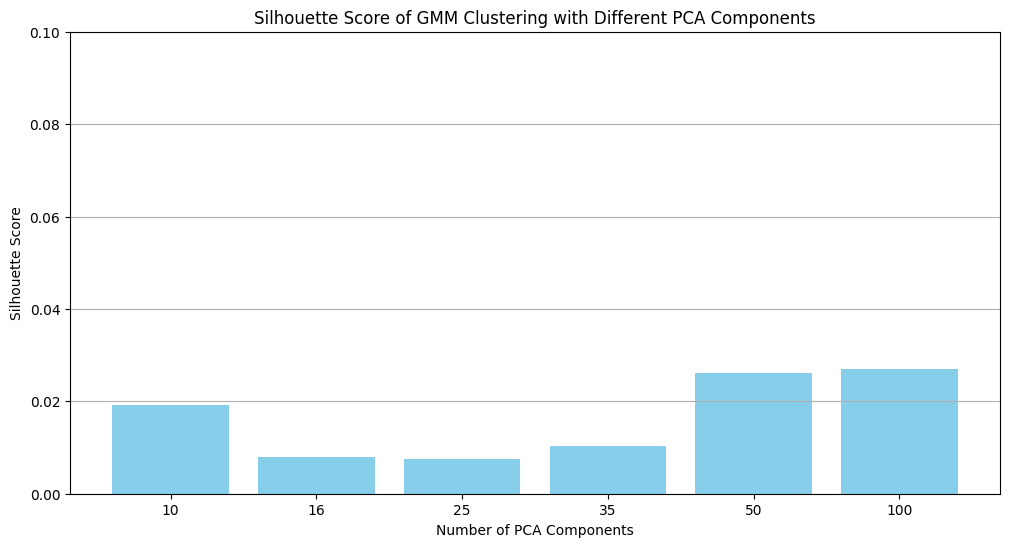

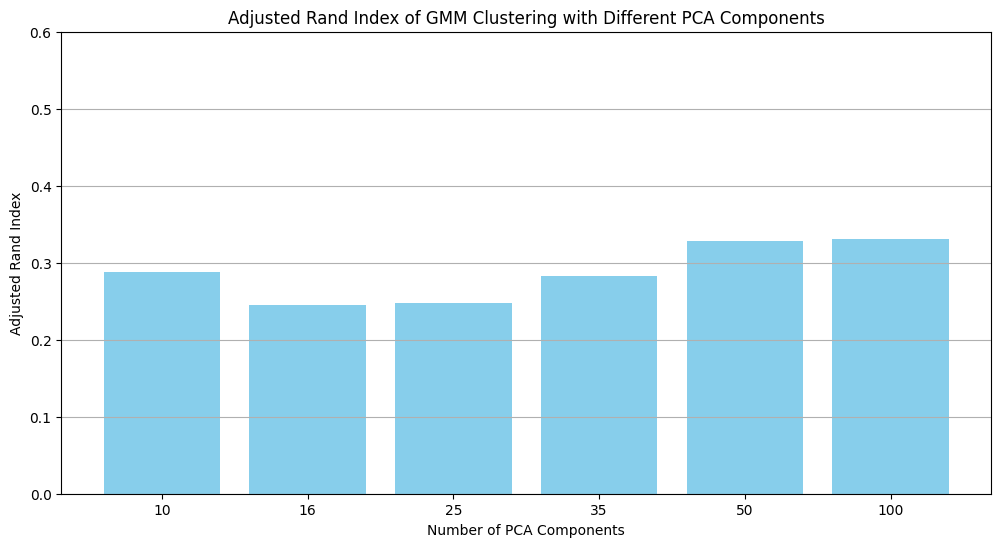

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Perform GMM clustering for PCA with 10 components
gmm_10 = GaussianMixture(n_components=len(cats), random_state=42)
gmm_10.fit(X_pca_10)
cluster_labels_gmm_10 = gmm_10.predict(X_pca_10)

# Perform GMM clustering for PCA with 16 components
gmm_16 = GaussianMixture(n_components=len(cats), random_state=42)
gmm_16.fit(X_pca_16)
cluster_labels_gmm_16 = gmm_16.predict(X_pca_16)

# Perform GMM clustering for PCA with 25 components
gmm_25 = GaussianMixture(n_components=len(cats), random_state=42)
gmm_25.fit(X_pca_25)
cluster_labels_gmm_25 = gmm_25.predict(X_pca_25)

# Perform GMM clustering for PCA with 35 components
gmm_35 = GaussianMixture(n_components=len(cats), random_state=42)
gmm_35.fit(X_pca_35)
cluster_labels_gmm_35 = gmm_35.predict(X_pca_35)

# Perform GMM clustering for PCA with 50 components
gmm_50 = GaussianMixture(n_components=len(cats), random_state=42)
gmm_50.fit(X_pca_50)
cluster_labels_gmm_50 = gmm_50.predict(X_pca_50)

# Perform GMM clustering for PCA with 100 components
gmm_100 = GaussianMixture(n_components=len(cats), random_state=42)
gmm_100.fit(X_pca_100)
cluster_labels_gmm_100 = gmm_100.predict(X_pca_100)

# Evaluate the clustering results using silhouette score and adjusted Rand index
silhouette_scores_gmm = [
    silhouette_score(X_pca_10, cluster_labels_gmm_10),
    silhouette_score(X_pca_16, cluster_labels_gmm_16),
    silhouette_score(X_pca_25, cluster_labels_gmm_25),
    silhouette_score(X_pca_35, cluster_labels_gmm_35),
    silhouette_score(X_pca_50, cluster_labels_gmm_50),
    silhouette_score(X_pca_100, cluster_labels_gmm_100)
]

adjusted_rand_scores_gmm = [
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_gmm_10),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_gmm_16),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_gmm_25),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_gmm_35),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_gmm_50),
    adjusted_rand_score(y.argmax(axis=1), cluster_labels_gmm_100)
]

# Print the evaluation results
for i, n_components in enumerate([10, 16, 25, 35, 50, 100]):
    print(f'PCA with {n_components} components:')
    print(f'Silhouette Score: {silhouette_scores_gmm[i]}')
    print(f'Adjusted Rand Index: {adjusted_rand_scores_gmm[i]}')
    print()

# Compare the results of the GMM models
results_gmm = [
    {'PCA Components': "10", 'Silhouette Score': silhouette_scores_gmm[0], 'Adjusted Rand Index': adjusted_rand_scores_gmm[0]},
    {'PCA Components': "16", 'Silhouette Score': silhouette_scores_gmm[1], 'Adjusted Rand Index': adjusted_rand_scores_gmm[1]},
    {'PCA Components': "25", 'Silhouette Score': silhouette_scores_gmm[2], 'Adjusted Rand Index': adjusted_rand_scores_gmm[2]},
    {'PCA Components': "35", 'Silhouette Score': silhouette_scores_gmm[3], 'Adjusted Rand Index': adjusted_rand_scores_gmm[3]},
    {'PCA Components': "50", 'Silhouette Score': silhouette_scores_gmm[4], 'Adjusted Rand Index': adjusted_rand_scores_gmm[4]},
    {'PCA Components': "100", 'Silhouette Score': silhouette_scores_gmm[5], 'Adjusted Rand Index': adjusted_rand_scores_gmm[5]}
]

# Convert results to a DataFrame for better visualization
results_gmm_df = pd.DataFrame(results_gmm)

# Plot the silhouette scores of the GMM clustering using a bar graph
plt.figure(figsize=(12, 6))
plt.bar(results_gmm_df['PCA Components'], results_gmm_df['Silhouette Score'], color='skyblue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score of GMM Clustering with Different PCA Components')
plt.xticks(results_gmm_df['PCA Components'])
plt.ylim(0, 0.1)
plt.grid(axis='y')
plt.show()

# Plot the adjusted Rand index of the GMM clustering using a bar graph
plt.figure(figsize=(12, 6))
plt.bar(results_gmm_df['PCA Components'], results_gmm_df['Adjusted Rand Index'], color='skyblue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index of GMM Clustering with Different PCA Components')
plt.xticks(results_gmm_df['PCA Components'])
plt.ylim(0, 0.6)
plt.grid(axis='y')
plt.show()

# Naive bayes

Naive Bayes Accuracy with PCA 10 components: 0.7450331125827815
Naive Bayes Classification Report with PCA 10 components:
              precision    recall  f1-score   support

        hail       0.64      0.61      0.63        75
   lightning       0.94      0.79      0.86        73
        rain       0.63      0.73      0.68        79
   sandstorm       0.83      0.84      0.83        75

    accuracy                           0.75       302
   macro avg       0.76      0.75      0.75       302
weighted avg       0.76      0.75      0.75       302

Naive Bayes Confusion Matrix with PCA 10 components:
[[46  1 22  6]
 [ 6 58  6  3]
 [15  2 58  4]
 [ 5  1  6 63]]
Naive Bayes Accuracy with PCA 16 components: 0.7251655629139073
Naive Bayes Classification Report with PCA 16 components:
              precision    recall  f1-score   support

        hail       0.68      0.61      0.64        75
   lightning       0.83      0.75      0.79        73
        rain       0.68      0.70      0.69 

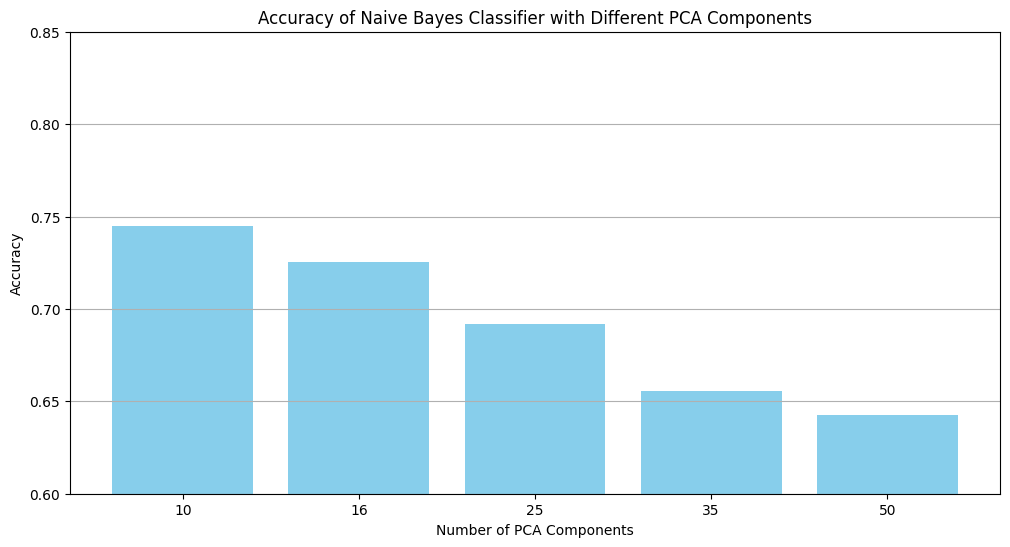

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# For PCA with 10 components
X_train_pca_10, X_test_pca_10, y_train_pca_10, y_test_pca_10 = train_test_split(X_pca_10, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier
nb_classifier_10 = GaussianNB()

# Handle the ValueError by reshaping y_train_pca_10
if y_train_pca_10.ndim > 1:
    y_train_pca_10 = y_train_pca_10.argmax(axis=1)

# Train the classifier
nb_classifier_10.fit(X_train_pca_10, y_train_pca_10)

# Make predictions on the test set
y_pred_nb_10 = nb_classifier_10.predict(X_test_pca_10)

# Evaluate the classifier
accuracy_nb_10 = accuracy_score(y_test_pca_10.argmax(axis=1), y_pred_nb_10)
print(f'Naive Bayes Accuracy with PCA 10 components: {accuracy_nb_10}')

# Print classification report
print('Naive Bayes Classification Report with PCA 10 components:')
print(classification_report(y_test_pca_10.argmax(axis=1), y_pred_nb_10, target_names=cats))

# Print confusion matrix
print('Naive Bayes Confusion Matrix with PCA 10 components:')
print(confusion_matrix(y_test_pca_10.argmax(axis=1), y_pred_nb_10))

# For PCA with 16 components
X_train_pca_16, X_test_pca_16, y_train_pca_16, y_test_pca_16 = train_test_split(X_pca_16, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier
nb_classifier_16 = GaussianNB()

# Handle the ValueError by reshaping y_train_pca_16
if y_train_pca_16.ndim > 1:
    y_train_pca_16 = y_train_pca_16.argmax(axis=1)

# Train the classifier
nb_classifier_16.fit(X_train_pca_16, y_train_pca_16)

# Make predictions on the test set
y_pred_nb_16 = nb_classifier_16.predict(X_test_pca_16)

# Evaluate the classifier
accuracy_nb_16 = accuracy_score(y_test_pca_16.argmax(axis=1), y_pred_nb_16)
print(f'Naive Bayes Accuracy with PCA 16 components: {accuracy_nb_16}')

# Print classification report
print('Naive Bayes Classification Report with PCA 16 components:')
print(classification_report(y_test_pca_16.argmax(axis=1), y_pred_nb_16, target_names=cats))

# Print confusion matrix
print('Naive Bayes Confusion Matrix with PCA 16 components:')
print(confusion_matrix(y_test_pca_16.argmax(axis=1), y_pred_nb_16))

# For PCA with 25 components
X_train_pca_25, X_test_pca_25, y_train_pca_25, y_test_pca_25 = train_test_split(X_pca_25, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier
nb_classifier_25 = GaussianNB()

# Handle the ValueError by reshaping y_train_pca_25
if y_train_pca_25.ndim > 1:
    y_train_pca_25 = y_train_pca_25.argmax(axis=1)

# Train the classifier
nb_classifier_25.fit(X_train_pca_25, y_train_pca_25)

# Make predictions on the test set
y_pred_nb_25 = nb_classifier_25.predict(X_test_pca_25)

# Evaluate the classifier
accuracy_nb_25 = accuracy_score(y_test_pca_25.argmax(axis=1), y_pred_nb_25)
print(f'Naive Bayes Accuracy with PCA 25 components: {accuracy_nb_25}')

# Print classification report
print('Naive Bayes Classification Report with PCA 25 components:')
print(classification_report(y_test_pca_25.argmax(axis=1), y_pred_nb_25, target_names=cats))

# Print confusion matrix
print('Naive Bayes Confusion Matrix with PCA 25 components:')
print(confusion_matrix(y_test_pca_25.argmax(axis=1), y_pred_nb_25))

# For PCA with 35 components
X_train_pca_35, X_test_pca_35, y_train_pca_35, y_test_pca_35 = train_test_split(X_pca_35, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier
nb_classifier_35 = GaussianNB()

# Handle the ValueError by reshaping y_train_pca_35
if y_train_pca_35.ndim > 1:
    y_train_pca_35 = y_train_pca_35.argmax(axis=1)

# Train the classifier
nb_classifier_35.fit(X_train_pca_35, y_train_pca_35)

# Make predictions on the test set
y_pred_nb_35 = nb_classifier_35.predict(X_test_pca_35)

# Evaluate the classifier
accuracy_nb_35 = accuracy_score(y_test_pca_35.argmax(axis=1), y_pred_nb_35)
print(f'Naive Bayes Accuracy with PCA 35 components: {accuracy_nb_35}')

# Print classification report
print('Naive Bayes Classification Report with PCA 35 components:')
print(classification_report(y_test_pca_35.argmax(axis=1), y_pred_nb_35, target_names=cats))

# Print confusion matrix
print('Naive Bayes Confusion Matrix with PCA 35 components:')
print(confusion_matrix(y_test_pca_35.argmax(axis=1), y_pred_nb_35))

# For PCA with 50 components
X_train_pca_50, X_test_pca_50, y_train_pca_50, y_test_pca_50 = train_test_split(X_pca_50, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier
nb_classifier_50 = GaussianNB()

# Handle the ValueError by reshaping y_train_pca_50
if y_train_pca_50.ndim > 1:
    y_train_pca_50 = y_train_pca_50.argmax(axis=1)

# Train the classifier
nb_classifier_50.fit(X_train_pca_50, y_train_pca_50)

# Make predictions on the test set
y_pred_nb_50 = nb_classifier_50.predict(X_test_pca_50)

# Evaluate the classifier
accuracy_nb_50 = accuracy_score(y_test_pca_50.argmax(axis=1), y_pred_nb_50)
print(f'Naive Bayes Accuracy with PCA 50 components: {accuracy_nb_50}')

# Print classification report
print('Naive Bayes Classification Report with PCA 50 components:')
print(classification_report(y_test_pca_50.argmax(axis=1), y_pred_nb_50, target_names=cats))

# Print confusion matrix
print('Naive Bayes Confusion Matrix with PCA 50 components:')
print(confusion_matrix(y_test_pca_50.argmax(axis=1), y_pred_nb_50))

# Compare the results of the models
results_nb = [
    {'PCA Components': "10", 'Accuracy': accuracy_nb_10, 'Classification Report': classification_report(y_test_pca_10.argmax(axis=1), y_pred_nb_10, target_names=cats, output_dict=True), 'Confusion Matrix': confusion_matrix(y_test_pca_10.argmax(axis=1), y_pred_nb_10)},
    {'PCA Components': "16", 'Accuracy': accuracy_nb_16, 'Classification Report': classification_report(y_test_pca_16.argmax(axis=1), y_pred_nb_16, target_names=cats, output_dict=True), 'Confusion Matrix': confusion_matrix(y_test_pca_16.argmax(axis=1), y_pred_nb_16)},
    {'PCA Components': "25", 'Accuracy': accuracy_nb_25, 'Classification Report': classification_report(y_test_pca_25.argmax(axis=1), y_pred_nb_25, target_names=cats, output_dict=True), 'Confusion Matrix': confusion_matrix(y_test_pca_25.argmax(axis=1), y_pred_nb_25)},
    {'PCA Components': "35", 'Accuracy': accuracy_nb_35, 'Classification Report': classification_report(y_test_pca_35.argmax(axis=1), y_pred_nb_35, target_names=cats, output_dict=True), 'Confusion Matrix': confusion_matrix(y_test_pca_35.argmax(axis=1), y_pred_nb_35)},
    {'PCA Components': "50", 'Accuracy': accuracy_nb_50, 'Classification Report': classification_report(y_test_pca_50.argmax(axis=1), y_pred_nb_50, target_names=cats, output_dict=True), 'Confusion Matrix': confusion_matrix(y_test_pca_50.argmax(axis=1), y_pred_nb_50)}
]

# Convert results to a DataFrame for better visualization
results_nb_df = pd.DataFrame(results_nb)

# Plot the accuracy of the models using a bar graph 
plt.figure(figsize=(12, 6))
plt.bar(results_nb_df['PCA Components'], results_nb_df['Accuracy'], color='skyblue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy of Naive Bayes Classifier with Different PCA Components')
plt.xticks(results_nb_df['PCA Components'])
plt.ylim(0.6, 0.85)
plt.grid(axis='y')
plt.show()


# xgboost

c:\Users\mirzi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with PCA 10 components: 0.7549668874172185
XGBoost Classification Report with PCA 10 components:
              precision    recall  f1-score   support

        hail       0.66      0.59      0.62        75
   lightning       0.88      0.86      0.87        73
        rain       0.65      0.76      0.70        79
   sandstorm       0.86      0.81      0.84        75

    accuracy                           0.75       302
   macro avg       0.76      0.76      0.76       302
weighted avg       0.76      0.75      0.76       302

XGBoost Confusion Matrix with PCA 10 components:
[[44  5 22  4]
 [ 4 63  6  0]
 [11  2 60  6]
 [ 8  2  4 61]]


c:\Users\mirzi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with PCA 16 components: 0.7781456953642384
XGBoost Classification Report with PCA 16 components:
              precision    recall  f1-score   support

        hail       0.65      0.68      0.66        75
   lightning       0.91      0.85      0.88        73
        rain       0.71      0.76      0.73        79
   sandstorm       0.89      0.83      0.86        75

    accuracy                           0.78       302
   macro avg       0.79      0.78      0.78       302
weighted avg       0.79      0.78      0.78       302

XGBoost Confusion Matrix with PCA 16 components:
[[51  4 16  4]
 [ 5 62  6  0]
 [14  1 60  4]
 [ 9  1  3 62]]


c:\Users\mirzi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with PCA 25 components: 0.7814569536423841
XGBoost Classification Report with PCA 25 components:
              precision    recall  f1-score   support

        hail       0.69      0.72      0.71        75
   lightning       0.90      0.88      0.89        73
        rain       0.70      0.67      0.68        79
   sandstorm       0.84      0.87      0.86        75

    accuracy                           0.78       302
   macro avg       0.78      0.78      0.78       302
weighted avg       0.78      0.78      0.78       302

XGBoost Confusion Matrix with PCA 25 components:
[[54  2 15  4]
 [ 3 64  5  1]
 [16  3 53  7]
 [ 5  2  3 65]]


c:\Users\mirzi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with PCA 35 components: 0.804635761589404
XGBoost Classification Report with PCA 35 components:
              precision    recall  f1-score   support

        hail       0.76      0.73      0.75        75
   lightning       0.88      0.88      0.88        73
        rain       0.72      0.72      0.72        79
   sandstorm       0.86      0.89      0.88        75

    accuracy                           0.80       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.80      0.80      0.80       302

XGBoost Confusion Matrix with PCA 35 components:
[[55  3 13  4]
 [ 3 64  6  0]
 [10  5 57  7]
 [ 4  1  3 67]]


c:\Users\mirzi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with PCA 50 components: 0.7947019867549668
XGBoost Classification Report with PCA 50 components:
              precision    recall  f1-score   support

        hail       0.71      0.73      0.72        75
   lightning       0.90      0.86      0.88        73
        rain       0.71      0.70      0.70        79
   sandstorm       0.87      0.89      0.88        75

    accuracy                           0.79       302
   macro avg       0.80      0.80      0.80       302
weighted avg       0.80      0.79      0.79       302

XGBoost Confusion Matrix with PCA 50 components:
[[55  3 16  1]
 [ 4 63  5  1]
 [13  3 55  8]
 [ 5  1  2 67]]


c:\Users\mirzi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with PCA 100 components: 0.804635761589404
XGBoost Classification Report with PCA 100 components:
              precision    recall  f1-score   support

        hail       0.75      0.77      0.76        75
   lightning       0.90      0.86      0.88        73
        rain       0.70      0.70      0.70        79
   sandstorm       0.88      0.89      0.89        75

    accuracy                           0.80       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.81      0.80      0.81       302

XGBoost Confusion Matrix with PCA 100 components:
[[58  2 14  1]
 [ 4 63  6  0]
 [12  4 55  8]
 [ 3  1  4 67]]


c:\Users\mirzi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [17:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy with PCA 200 components: 0.7748344370860927
XGBoost Classification Report with PCA 200 components:
              precision    recall  f1-score   support

        hail       0.71      0.68      0.69        75
   lightning       0.85      0.86      0.86        73
        rain       0.66      0.66      0.66        79
   sandstorm       0.88      0.91      0.89        75

    accuracy                           0.77       302
   macro avg       0.78      0.78      0.78       302
weighted avg       0.77      0.77      0.77       302

XGBoost Confusion Matrix with PCA 200 components:
[[51  5 19  0]
 [ 1 63  5  4]
 [18  4 52  5]
 [ 2  2  3 68]]


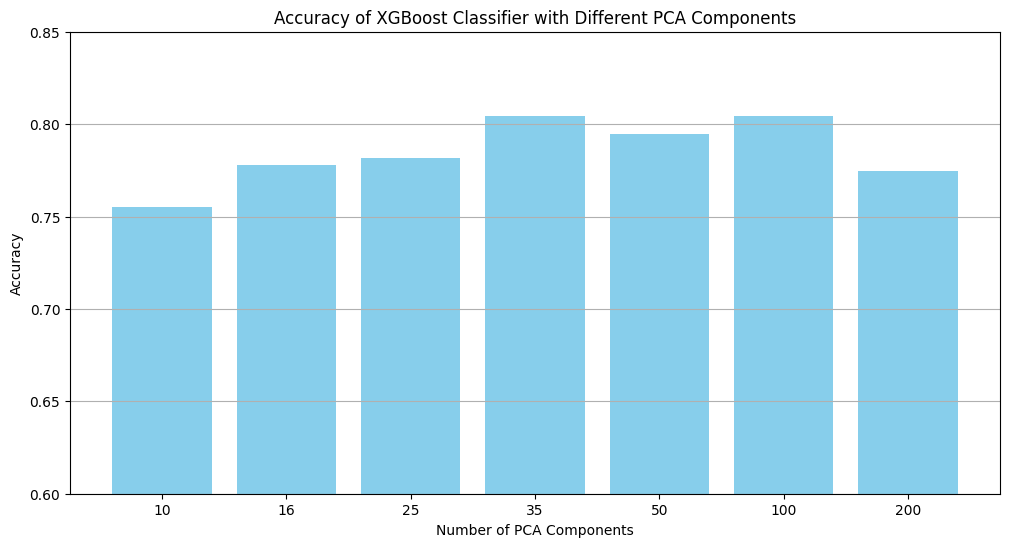

In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure that y is in integer label format (not one-hot encoded)
# If y is one-hot encoded, convert it back to integer labels
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

# For PCA with 10 components
X_train_pca_10, X_test_pca_10, y_train_pca_10, y_test_pca_10 = train_test_split(
    X_pca_10, y, test_size=0.2, random_state=42
)

# Initialize the XGBoost Classifier
xgb_classifier_10 = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

# Train the classifier
xgb_classifier_10.fit(X_train_pca_10, y_train_pca_10)

# Make predictions on the test set
y_pred_xgb_10 = xgb_classifier_10.predict(X_test_pca_10)

# Evaluate the classifier
accuracy_xgb_10 = accuracy_score(y_test_pca_10, y_pred_xgb_10)
print(f'XGBoost Accuracy with PCA 10 components: {accuracy_xgb_10}')

# Print classification report
print('XGBoost Classification Report with PCA 10 components:')
print(classification_report(y_test_pca_10, y_pred_xgb_10, target_names=cats))

# Print confusion matrix
print('XGBoost Confusion Matrix with PCA 10 components:')
print(confusion_matrix(y_test_pca_10, y_pred_xgb_10))

# Repeat the process for PCA with 16 components
X_train_pca_16, X_test_pca_16, y_train_pca_16, y_test_pca_16 = train_test_split(
    X_pca_16, y, test_size=0.2, random_state=42
)

xgb_classifier_16 = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

xgb_classifier_16.fit(X_train_pca_16, y_train_pca_16)
y_pred_xgb_16 = xgb_classifier_16.predict(X_test_pca_16)

accuracy_xgb_16 = accuracy_score(y_test_pca_16, y_pred_xgb_16)
print(f'XGBoost Accuracy with PCA 16 components: {accuracy_xgb_16}')

print('XGBoost Classification Report with PCA 16 components:')
print(classification_report(y_test_pca_16, y_pred_xgb_16, target_names=cats))

print('XGBoost Confusion Matrix with PCA 16 components:')
print(confusion_matrix(y_test_pca_16, y_pred_xgb_16))

# Repeat the process for PCA with 25 components
X_train_pca_25, X_test_pca_25, y_train_pca_25, y_test_pca_25 = train_test_split(
    X_pca_25, y, test_size=0.2, random_state=42
)

xgb_classifier_25 = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

xgb_classifier_25.fit(X_train_pca_25, y_train_pca_25)
y_pred_xgb_25 = xgb_classifier_25.predict(X_test_pca_25)

accuracy_xgb_25 = accuracy_score(y_test_pca_25, y_pred_xgb_25)
print(f'XGBoost Accuracy with PCA 25 components: {accuracy_xgb_25}')

print('XGBoost Classification Report with PCA 25 components:')
print(classification_report(y_test_pca_25, y_pred_xgb_25, target_names=cats))

print('XGBoost Confusion Matrix with PCA 25 components:')
print(confusion_matrix(y_test_pca_25, y_pred_xgb_25))

# Repeat the process for PCA with 35 components
X_train_pca_35, X_test_pca_35, y_train_pca_35, y_test_pca_35 = train_test_split(
    X_pca_35, y, test_size=0.2, random_state=42
)

xgb_classifier_35 = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

xgb_classifier_35.fit(X_train_pca_35, y_train_pca_35)
y_pred_xgb_35 = xgb_classifier_35.predict(X_test_pca_35)

accuracy_xgb_35 = accuracy_score(y_test_pca_35, y_pred_xgb_35)
print(f'XGBoost Accuracy with PCA 35 components: {accuracy_xgb_35}')

print('XGBoost Classification Report with PCA 35 components:')
print(classification_report(y_test_pca_35, y_pred_xgb_35, target_names=cats))

print('XGBoost Confusion Matrix with PCA 35 components:')
print(confusion_matrix(y_test_pca_35, y_pred_xgb_35))

# Repeat the process for PCA with 50 components
X_train_pca_50, X_test_pca_50, y_train_pca_50, y_test_pca_50 = train_test_split(
    X_pca_50, y, test_size=0.2, random_state=42
)

xgb_classifier_50 = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

xgb_classifier_50.fit(X_train_pca_50, y_train_pca_50)
y_pred_xgb_50 = xgb_classifier_50.predict(X_test_pca_50)

accuracy_xgb_50 = accuracy_score(y_test_pca_50, y_pred_xgb_50)
print(f'XGBoost Accuracy with PCA 50 components: {accuracy_xgb_50}')

print('XGBoost Classification Report with PCA 50 components:')
print(classification_report(y_test_pca_50, y_pred_xgb_50, target_names=cats))

print('XGBoost Confusion Matrix with PCA 50 components:')
print(confusion_matrix(y_test_pca_50, y_pred_xgb_50))


# Repeat the process for PCA with 100 components
X_train_pca_100, X_test_pca_100, y_train_pca_100, y_test_pca_100 = train_test_split(
    X_pca_100, y, test_size=0.2, random_state=42
)

xgb_classifier_100 = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

xgb_classifier_100.fit(X_train_pca_100, y_train_pca_100)
y_pred_xgb_100 = xgb_classifier_100.predict(X_test_pca_100)

accuracy_xgb_100 = accuracy_score(y_test_pca_100, y_pred_xgb_100)
print(f'XGBoost Accuracy with PCA 100 components: {accuracy_xgb_100}')

print('XGBoost Classification Report with PCA 100 components:')
print(classification_report(y_test_pca_100, y_pred_xgb_100, target_names=cats))

print('XGBoost Confusion Matrix with PCA 100 components:')
print(confusion_matrix(y_test_pca_100, y_pred_xgb_100))


# Repeat the process for PCA with 200 components
X_train_pca_200, X_test_pca_200, y_train_pca_200, y_test_pca_200 = train_test_split(
    X_pca_200, y, test_size=0.2, random_state=42
)

xgb_classifier_200 = xgb.XGBClassifier(
    random_state=42, use_label_encoder=False, eval_metric='mlogloss'
)

xgb_classifier_200.fit(X_train_pca_200, y_train_pca_200)
y_pred_xgb_200 = xgb_classifier_200.predict(X_test_pca_200)

accuracy_xgb_200 = accuracy_score(y_test_pca_200, y_pred_xgb_200)
print(f'XGBoost Accuracy with PCA 200 components: {accuracy_xgb_200}')

print('XGBoost Classification Report with PCA 200 components:')
print(classification_report(y_test_pca_200, y_pred_xgb_200, target_names=cats))

print('XGBoost Confusion Matrix with PCA 200 components:')
print(confusion_matrix(y_test_pca_200, y_pred_xgb_200))


# Compare the results of the five models
results_xgb = [
    {'PCA Components': "10", 'Accuracy': accuracy_xgb_10},
    {'PCA Components': "16", 'Accuracy': accuracy_xgb_16},
    {'PCA Components': "25", 'Accuracy': accuracy_xgb_25},
    {'PCA Components': "35", 'Accuracy': accuracy_xgb_35},
    {'PCA Components': "50", 'Accuracy': accuracy_xgb_50},
    {'PCA Components': "100", 'Accuracy': accuracy_xgb_100},
    {'PCA Components': "200", 'Accuracy': accuracy_xgb_200}
]

# Convert results to a DataFrame for better visualization
results_xgb_df = pd.DataFrame(results_xgb)

# Plot the accuracy of the models using a bar graph
plt.figure(figsize=(12, 6))
plt.bar(results_xgb_df['PCA Components'], results_xgb_df['Accuracy'], color='skyblue')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy of XGBoost Classifier with Different PCA Components')
plt.xticks(results_xgb_df['PCA Components'])
plt.ylim(0.6, 0.85)
plt.grid(axis='y')
plt.show()